In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
df=pd.read_csv('F:\Data_Science\Covid-19\covid_19_data.csv')

In [215]:
df

SNo ObservationDate     Province/State  Country/Region  \
0          1      01/22/2020              Anhui  Mainland China   
1          2      01/22/2020            Beijing  Mainland China   
2          3      01/22/2020          Chongqing  Mainland China   
3          4      01/22/2020             Fujian  Mainland China   
4          5      01/22/2020              Gansu  Mainland China   
...      ...             ...                ...             ...   
95279  95280      08/25/2020  Zaporizhia Oblast         Ukraine   
95280  95281      08/25/2020            Zeeland     Netherlands   
95281  95282      08/25/2020           Zhejiang  Mainland China   
95282  95283      08/25/2020    Zhytomyr Oblast         Ukraine   
95283  95284      08/25/2020       Zuid-Holland     Netherlands   

               Last Update  Confirmed  Deaths  Recovered  
0          1/22/2020 17:00        1.0     0.0        0.0  
1          1/22/2020 17:00       14.0     0.0        0.0  
2          1/22/2020 17:00        6.0     0.0        0.0  
3          1/22/2020 17:00        1.0     0.0        0.0  
4          1/22/2020 17:00        0.0     0.0        0.0  
...                    ...        ...     ...        ...  
95279  2020-08-26 04:28:11     1407.0    24.0      767.0  
95280  2020-08-26 04:28:11     1024.0    70.0        0.0  
95281  2020-08-26 04:28:11     1277.0     1.0     1268.0  
95282  2020-08-26 04:28:11     2923.0    60.0     1753.0  
95283  2020-08-26 04:28:11    18118.0  1339.0        0.0  

[95284 rows x 8 columns]

In [216]:
df.shape

(95284, 8)

In [217]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [218]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [219]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     30481
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [220]:
df.drop(['Province/State','SNo','Last Update'],axis=1,inplace=True)

In [221]:
df

ObservationDate  Country/Region  Confirmed  Deaths  Recovered
0          01/22/2020  Mainland China        1.0     0.0        0.0
1          01/22/2020  Mainland China       14.0     0.0        0.0
2          01/22/2020  Mainland China        6.0     0.0        0.0
3          01/22/2020  Mainland China        1.0     0.0        0.0
4          01/22/2020  Mainland China        0.0     0.0        0.0
...               ...             ...        ...     ...        ...
95279      08/25/2020         Ukraine     1407.0    24.0      767.0
95280      08/25/2020     Netherlands     1024.0    70.0        0.0
95281      08/25/2020  Mainland China     1277.0     1.0     1268.0
95282      08/25/2020         Ukraine     2923.0    60.0     1753.0
95283      08/25/2020     Netherlands    18118.0  1339.0        0.0

[95284 rows x 5 columns]

In [222]:
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'},inplace=True)

In [223]:
df

Date         Country  Confirmed  Deaths  Recovered
0      01/22/2020  Mainland China        1.0     0.0        0.0
1      01/22/2020  Mainland China       14.0     0.0        0.0
2      01/22/2020  Mainland China        6.0     0.0        0.0
3      01/22/2020  Mainland China        1.0     0.0        0.0
4      01/22/2020  Mainland China        0.0     0.0        0.0
...           ...             ...        ...     ...        ...
95279  08/25/2020         Ukraine     1407.0    24.0      767.0
95280  08/25/2020     Netherlands     1024.0    70.0        0.0
95281  08/25/2020  Mainland China     1277.0     1.0     1268.0
95282  08/25/2020         Ukraine     2923.0    60.0     1753.0
95283  08/25/2020     Netherlands    18118.0  1339.0        0.0

[95284 rows x 5 columns]

In [224]:
df['Date']=pd.to_datetime(df['Date'])

In [225]:
df

Date         Country  Confirmed  Deaths  Recovered
0     2020-01-22  Mainland China        1.0     0.0        0.0
1     2020-01-22  Mainland China       14.0     0.0        0.0
2     2020-01-22  Mainland China        6.0     0.0        0.0
3     2020-01-22  Mainland China        1.0     0.0        0.0
4     2020-01-22  Mainland China        0.0     0.0        0.0
...          ...             ...        ...     ...        ...
95279 2020-08-25         Ukraine     1407.0    24.0      767.0
95280 2020-08-25     Netherlands     1024.0    70.0        0.0
95281 2020-08-25  Mainland China     1277.0     1.0     1268.0
95282 2020-08-25         Ukraine     2923.0    60.0     1753.0
95283 2020-08-25     Netherlands    18118.0  1339.0        0.0

[95284 rows x 5 columns]

In [226]:
df['Active']=df['Confirmed']-df['Deaths']-df['Recovered']

In [227]:
df

Date         Country  Confirmed  Deaths  Recovered   Active
0     2020-01-22  Mainland China        1.0     0.0        0.0      1.0
1     2020-01-22  Mainland China       14.0     0.0        0.0     14.0
2     2020-01-22  Mainland China        6.0     0.0        0.0      6.0
3     2020-01-22  Mainland China        1.0     0.0        0.0      1.0
4     2020-01-22  Mainland China        0.0     0.0        0.0      0.0
...          ...             ...        ...     ...        ...      ...
95279 2020-08-25         Ukraine     1407.0    24.0      767.0    616.0
95280 2020-08-25     Netherlands     1024.0    70.0        0.0    954.0
95281 2020-08-25  Mainland China     1277.0     1.0     1268.0      8.0
95282 2020-08-25         Ukraine     2923.0    60.0     1753.0   1110.0
95283 2020-08-25     Netherlands    18118.0  1339.0        0.0  16779.0

[95284 rows x 6 columns]

In [229]:
df1=df.groupby(['Country','Date'])[['Date','Country','Confirmed','Deaths','Recovered','Active']].sum().reset_index()

In [230]:
df1

Country       Date  Confirmed  Deaths  \
0                          Azerbaijan 2020-02-28        1.0     0.0   
1                     ('St. Martin',) 2020-03-10        2.0     0.0   
2                         Afghanistan 2020-02-24        1.0     0.0   
3                         Afghanistan 2020-02-25        1.0     0.0   
4                         Afghanistan 2020-02-26        1.0     0.0   
...                               ...        ...        ...     ...   
33316  occupied Palestinian territory 2020-03-12        0.0     0.0   
33317  occupied Palestinian territory 2020-03-14        0.0     0.0   
33318  occupied Palestinian territory 2020-03-15        0.0     0.0   
33319  occupied Palestinian territory 2020-03-16        0.0     0.0   
33320  occupied Palestinian territory 2020-03-17        0.0     0.0   

       Recovered  Active  
0            0.0     1.0  
1            0.0     2.0  
2            0.0     1.0  
3            0.0     1.0  
4            0.0     1.0  
...          ...     ...  
33316        0.0     0.0  
33317        0.0     0.0  
33318        0.0     0.0  
33319        0.0     0.0  
33320        0.0     0.0  

[33321 rows x 6 columns]

In [231]:
df2=df1[df1['Date']=='2020-08-25'].reset_index()

In [232]:
df2

index             Country       Date  Confirmed  Deaths  Recovered  \
0      185         Afghanistan 2020-08-25    38070.0  1397.0    28440.0   
1      355             Albania 2020-08-25     8759.0   259.0     4530.0   
2      538             Algeria 2020-08-25    42228.0  1456.0    29587.0   
3      715             Andorra 2020-08-25     1060.0    53.0      877.0   
4      874              Angola 2020-08-25     2283.0   102.0      977.0   
..     ...                 ...        ...        ...     ...        ...   
185  32712  West Bank and Gaza 2020-08-25    19678.0   133.0    13162.0   
186  32855      Western Sahara 2020-08-25       10.0     1.0        8.0   
187  32993               Yemen 2020-08-25     1924.0   557.0     1091.0   
188  33154              Zambia 2020-08-25    11285.0   282.0    10400.0   
189  33313            Zimbabwe 2020-08-25     6196.0   166.0     4961.0   

      Active  
0     8233.0  
1     3970.0  
2    11185.0  
3      130.0  
4     1204.0  
..       ...  
185   6383.0  
186      1.0  
187    276.0  
188    603.0  
189   1069.0  

[190 rows x 7 columns]

In [237]:
df3=df2[df2['Active']>100000].sort_values('Active',ascending=False)
df3

index     Country       Date  Confirmed    Deaths  Recovered     Active
177  31301          US 2020-08-25  5777710.0  178486.0  2053699.0  3545525.0
78   13765       India 2020-08-25  3224547.0   59357.0  2458339.0   706851.0
23    4204      Brazil 2020-08-25  3669995.0  116580.0  3032551.0   520864.0
176  31084          UK 2020-08-25   329821.0   41535.0     1551.0   286735.0
160  28220       Spain 2020-08-25   412553.0   28924.0   150376.0   233253.0
60   10563      France 2020-08-25   285902.0   30549.0    85757.0   169596.0
141  24934      Russia 2020-08-25   963655.0   16524.0   777960.0   169171.0
135  23779        Peru 2020-08-25   600438.0   27813.0   414577.0   158048.0
36    6450    Colombia 2020-08-25   562113.0   17889.0   395463.0   148761.0
13    2492  Bangladesh 2020-08-25   299628.0    4028.0   186756.0   108844.0

Text(0.5, 1.0, 'World-Covid-19 Death Analysis: Upto 2020-08-25\nCountries with Active Cases more than 100000')

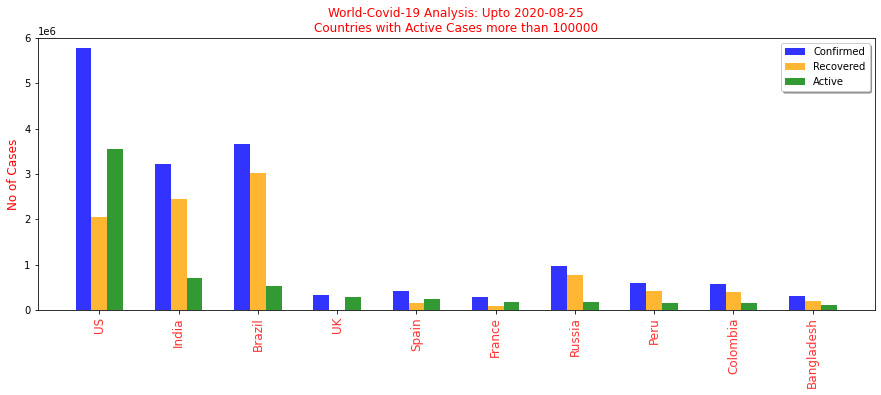

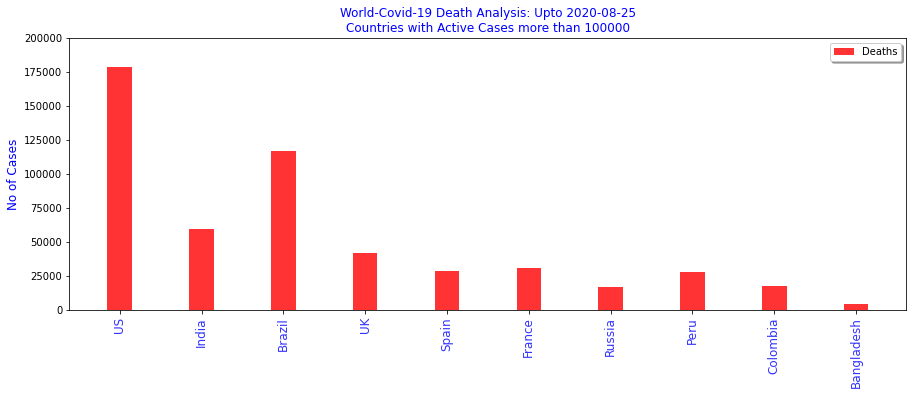

In [305]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
countries=df3['Country'].unique()
C=len(countries)
Country=df3['Country']
Confirmed=df3['Confirmed']
Recovered=df3['Recovered']
Active=df3['Active']

xpos=np.arange(0,C)
plt.xticks(xpos,Country, color='red', rotation=90,fontsize='large',alpha=0.8)
plt.ylabel('No of Cases',color='red',fontsize='large')
plt.bar(xpos-0.2,Confirmed,label='Confirmed',width=0.2,alpha=0.8,color='blue')
plt.bar(xpos,Recovered,label='Recovered',alpha=0.8,width=0.2,color='orange')
plt.bar(xpos+0.2,Active,label='Active',alpha=0.8,width=0.2,color='green')
plt.legend(shadow=True)
plt.ylim(0,6000000)
plt.title('World-Covid-19 Analysis: Upto 2020-08-25\nCountries with Active Cases more than 100000',color='red',fontsize='large')

fig,ax=plt.subplots(1,1,figsize=(15,5))
countries=df3['Country'].unique()
C=len(countries)
State=df3['Country']
Deaths=df3['Deaths']

xpos=np.arange(0,C)
plt.xticks(xpos,State, color='blue', rotation=90,fontsize='large',alpha=0.8)
plt.ylabel('No of Cases',color='blue',fontsize='large')
plt.bar(xpos,Deaths,label='Deaths',alpha=0.8,width=0.3,color='red')
plt.legend(shadow=True)
plt.ylim(0,200000)
plt.title('World-Covid-19 Death Analysis: Upto 2020-08-25\nCountries with Active Cases more than 100000',color='blue',fontsize='large')

Text(0.5, 1.0, 'World: Analysis of Covid-19 Active Cases, Upto: 2020-08-25\nCountries with Active Cases more than 100000')

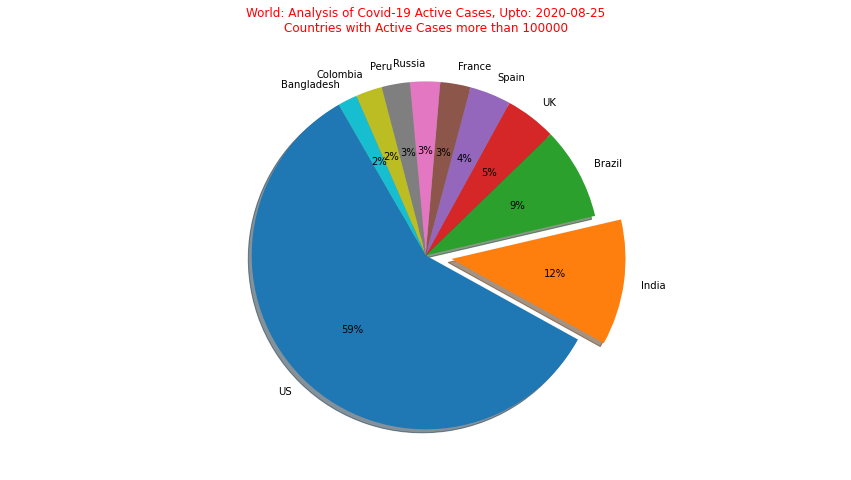

In [297]:
fig=plt.subplots(1,1,figsize=(15,8))

Country=df3['Country']
Active=df3['Active']
Explode=[0,0.15,0,0,0,0,0,0,0,0]
plt.axis('equal')

plt.pie(Active,labels=Country,autopct='%.f%%',shadow=True,startangle=120,explode=Explode)
plt.title('World: Analysis of Covid-19 Active Cases, Upto: 2020-08-25\nCountries with Active Cases more than 100000',color='red',fontsize='large')

In [299]:
df4=df.groupby(['Date'])[['Date','Recovered','Deaths','Confirmed','Active']].sum().reset_index()

In [300]:
df4

Date   Recovered    Deaths   Confirmed     Active
0   2020-01-22        28.0      17.0       555.0      510.0
1   2020-01-23        30.0      18.0       653.0      605.0
2   2020-01-24        36.0      26.0       941.0      879.0
3   2020-01-25        39.0      42.0      1438.0     1357.0
4   2020-01-26        52.0      56.0      2118.0     2010.0
..         ...         ...       ...         ...        ...
212 2020-08-21  14712252.0  799252.0  22949234.0  7437730.0
213 2020-08-22  14911319.0  804416.0  23203532.0  7487797.0
214 2020-08-23  15137203.0  808676.0  23420418.0  7474539.0
215 2020-08-24  15337252.0  813022.0  23647377.0  7497103.0
216 2020-08-25  15570191.0  819414.0  23889150.0  7499545.0

[217 rows x 5 columns]

In [307]:
C=df4

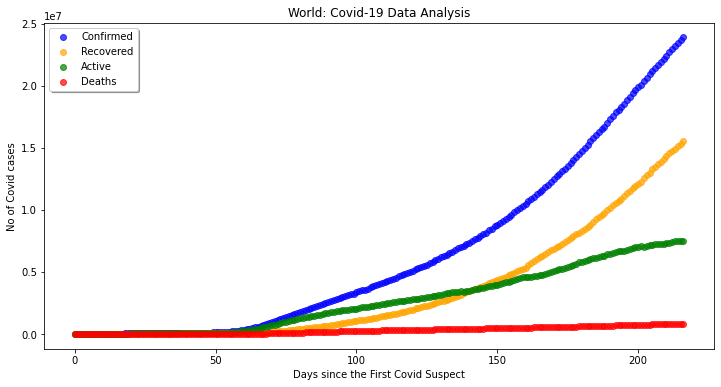

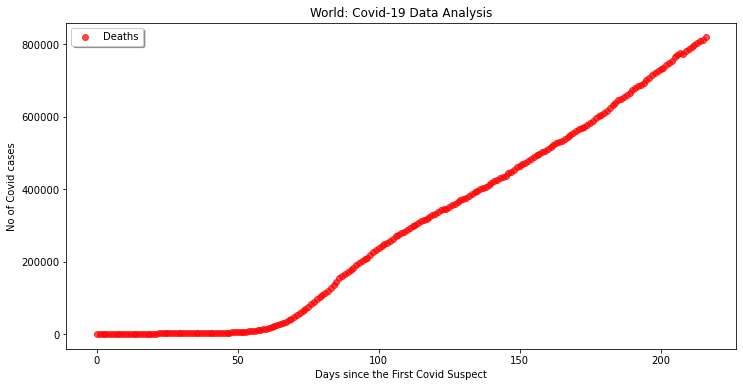

In [316]:
fig=plt.subplots(1,1,figsize=(12,6))
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed',alpha=0.7)
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='orange',label='Recovered',alpha=0.7)
plt.scatter(np.arange(0,len(C)),C['Active'],color='green',label='Active',alpha=0.7)
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths',alpha=0.7)
plt.xlabel('Days since the First Covid Suspect')
plt.ylabel('No of Covid cases')
plt.title('World: Covid-19 Data Analysis')
plt.legend(shadow=True)
plt.show()

fig=plt.subplots(1,1,figsize=(12,6))
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths',alpha=0.7,marker='o')
plt.xlabel('Days since the First Covid Suspect')
plt.ylabel('No of Covid cases')
plt.title('World: Covid-19 Data Analysis')
plt.legend(shadow=True)
plt.show()

In [322]:
df5=df1[df1['Country']=='India'].reset_index()
C1=df5

In [323]:
df5

index Country       Date  Confirmed   Deaths  Recovered    Active
0    13557   India 2020-01-30        1.0      0.0        0.0       1.0
1    13558   India 2020-01-31        1.0      0.0        0.0       1.0
2    13559   India 2020-02-01        1.0      0.0        0.0       1.0
3    13560   India 2020-02-02        2.0      0.0        0.0       2.0
4    13561   India 2020-02-03        3.0      0.0        0.0       3.0
..     ...     ...        ...        ...      ...        ...       ...
204  13761   India 2020-08-21  2975701.0  55794.0  2222577.0  697330.0
205  13762   India 2020-08-22  3044940.0  56706.0  2280566.0  707668.0
206  13763   India 2020-08-23  3106348.0  57542.0  2338035.0  710771.0
207  13764   India 2020-08-24  3167323.0  58390.0  2404585.0  704348.0
208  13765   India 2020-08-25  3224547.0  59357.0  2458339.0  706851.0

[209 rows x 7 columns]

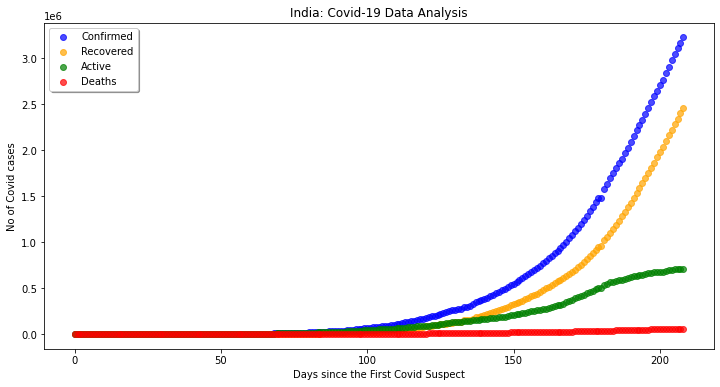

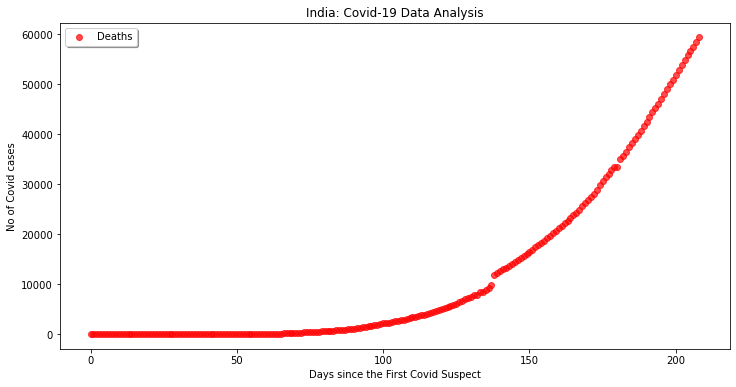

In [324]:
fig=plt.subplots(1,1,figsize=(12,6))
plt.scatter(np.arange(0,len(C1)),C1['Confirmed'],color='blue',label='Confirmed',alpha=0.7)
plt.scatter(np.arange(0,len(C1)),C1['Recovered'],color='orange',label='Recovered',alpha=0.7)
plt.scatter(np.arange(0,len(C1)),C1['Active'],color='green',label='Active',alpha=0.7)
plt.scatter(np.arange(0,len(C1)),C1['Deaths'],color='red',label='Deaths',alpha=0.7)
plt.xlabel('Days since the First Covid Suspect')
plt.ylabel('No of Covid cases')
plt.title('India: Covid-19 Data Analysis')
plt.legend(shadow=True)
plt.show()

fig=plt.subplots(1,1,figsize=(12,6))
plt.scatter(np.arange(0,len(C1)),C1['Deaths'],color='red',label='Deaths',alpha=0.7,marker='o')
plt.xlabel('Days since the First Covid Suspect')
plt.ylabel('No of Covid cases')
plt.title('India: Covid-19 Data Analysis')
plt.legend(shadow=True)
plt.show()

In [326]:
Countries=df1['Country'].unique()
len(Countries)

223

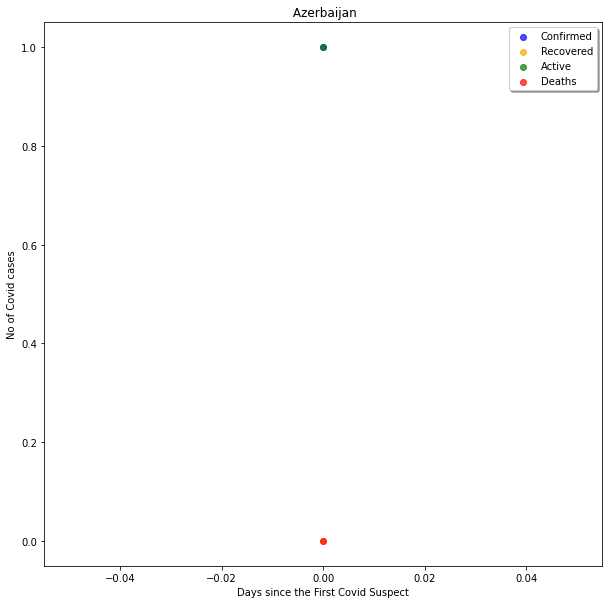

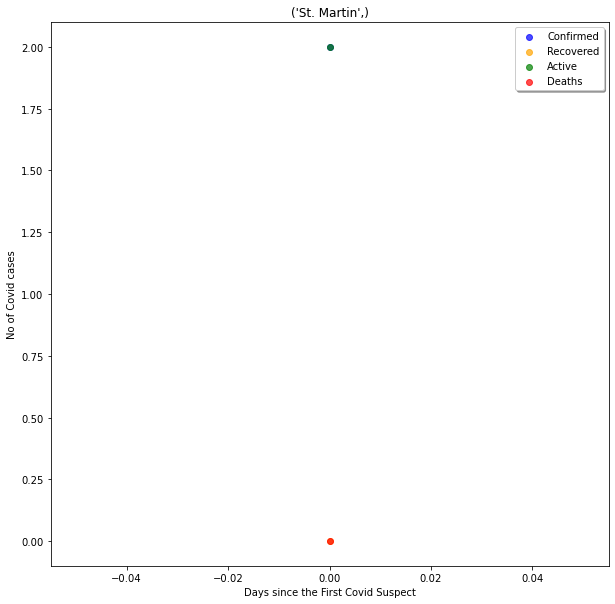

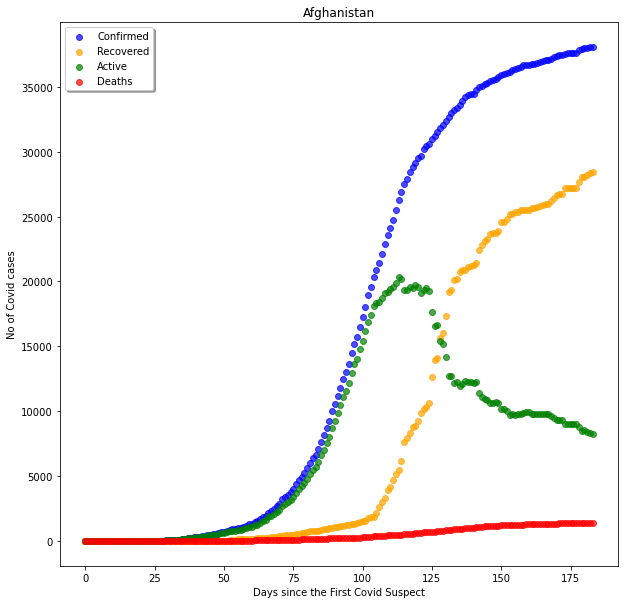

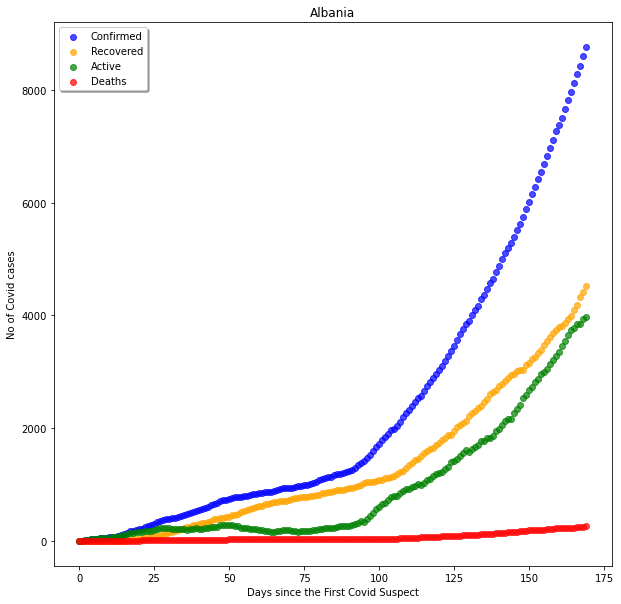

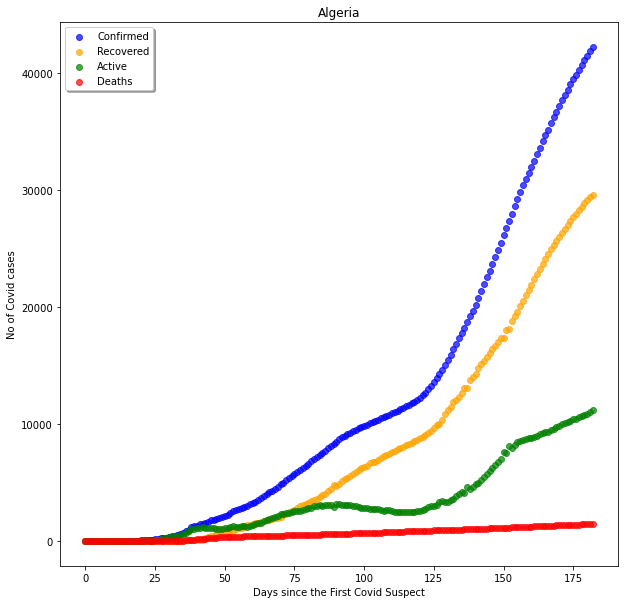

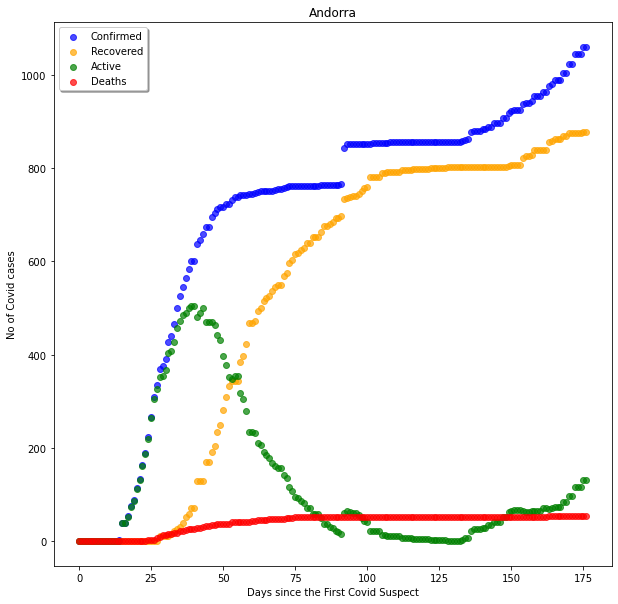

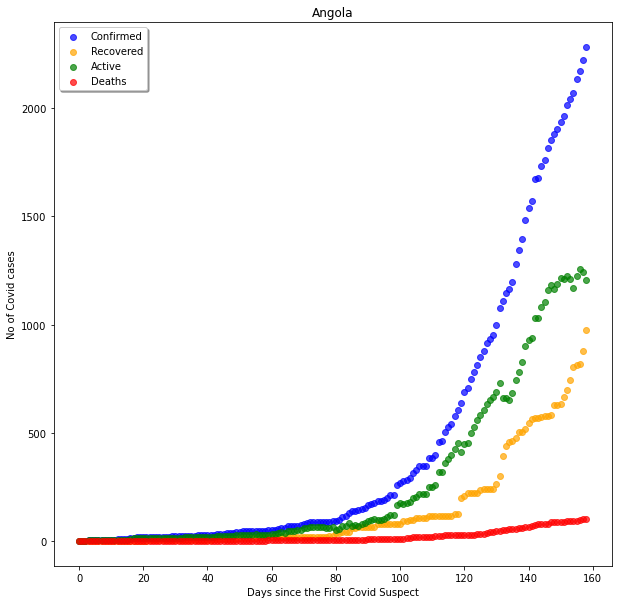

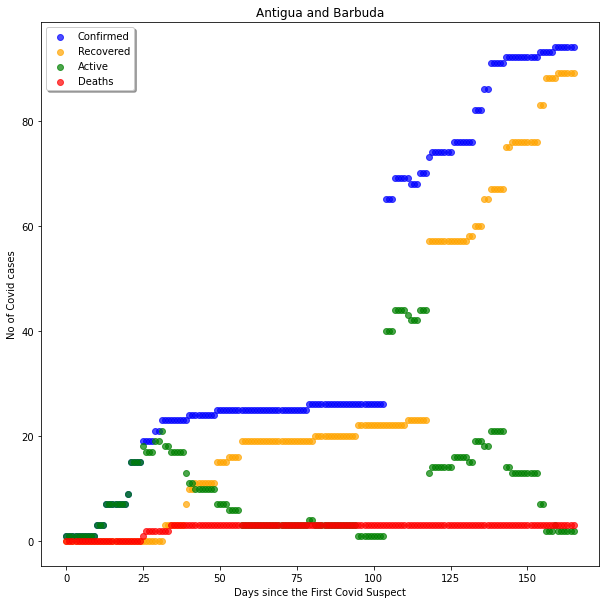

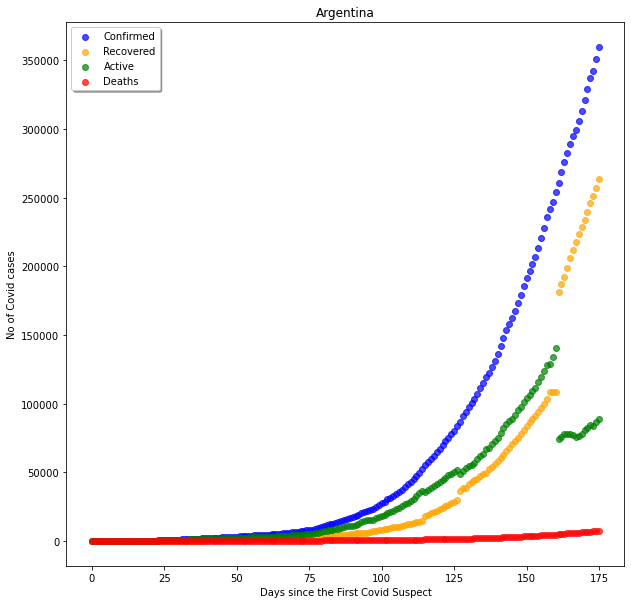

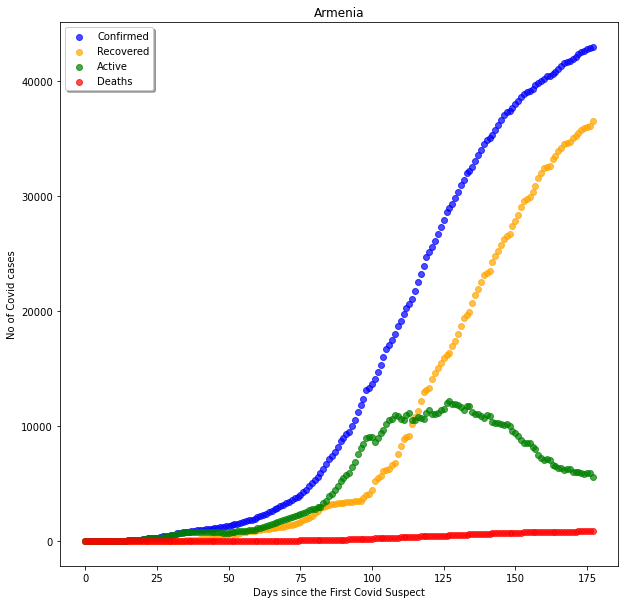

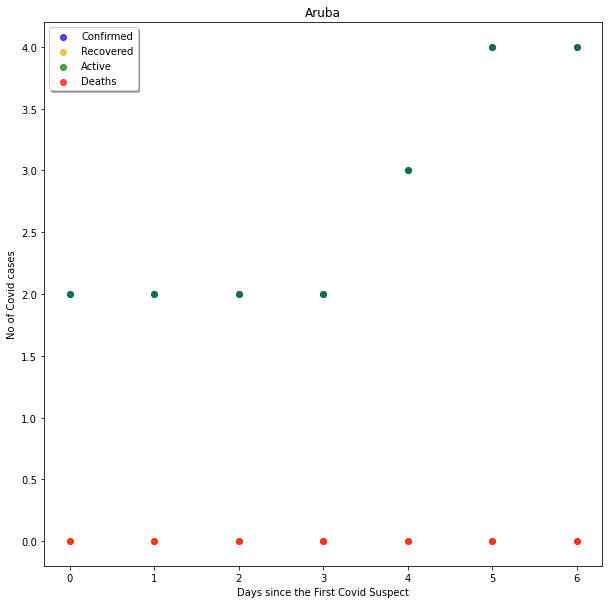

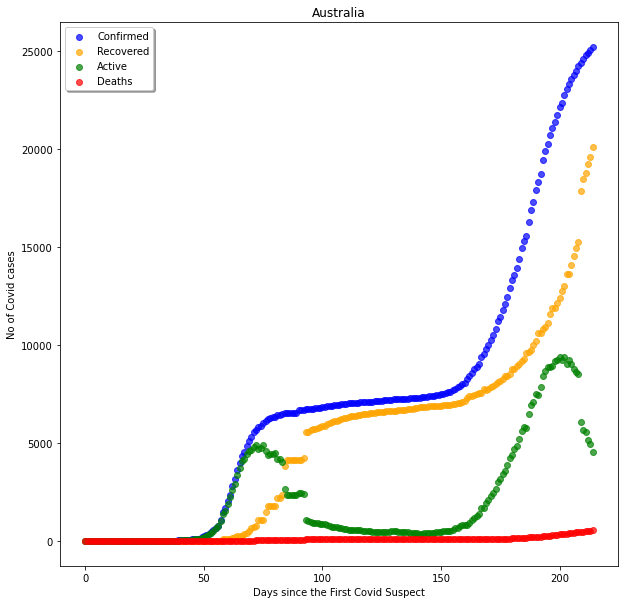

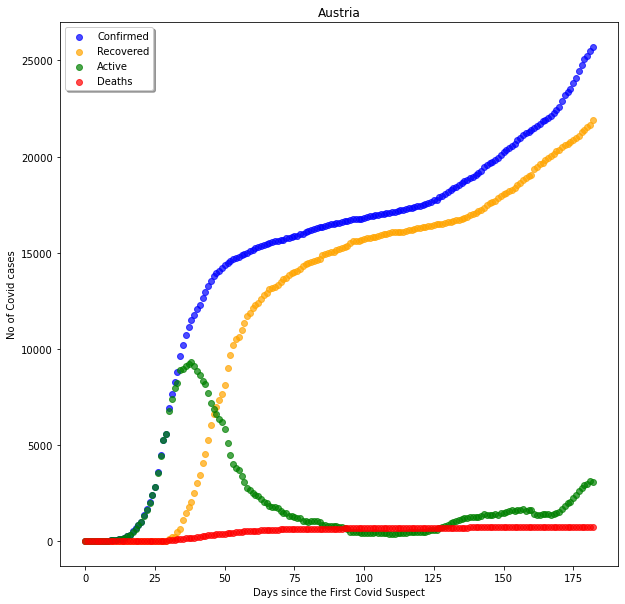

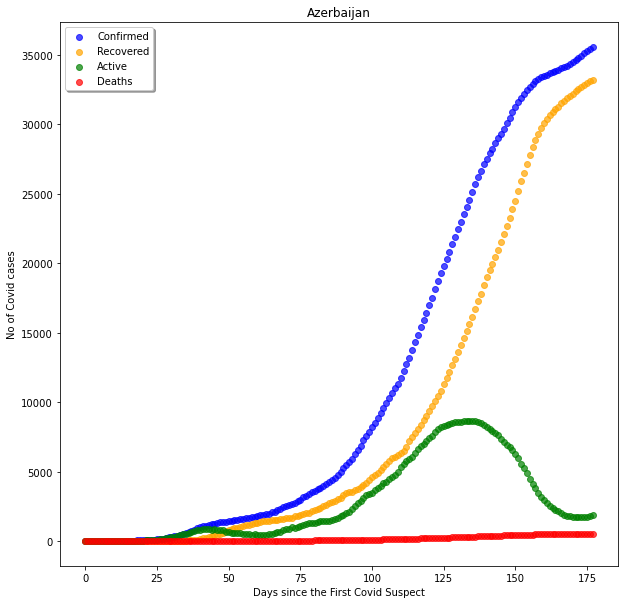

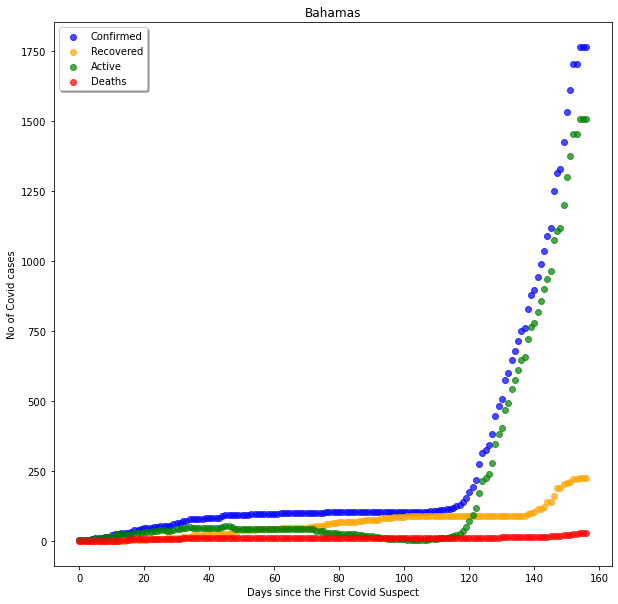

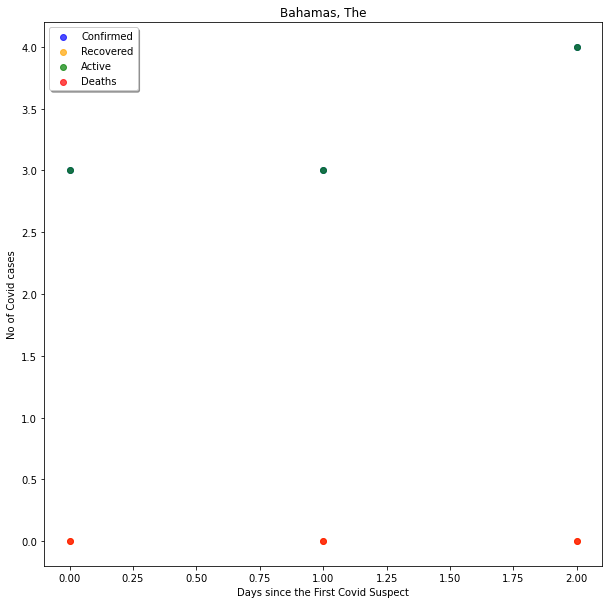

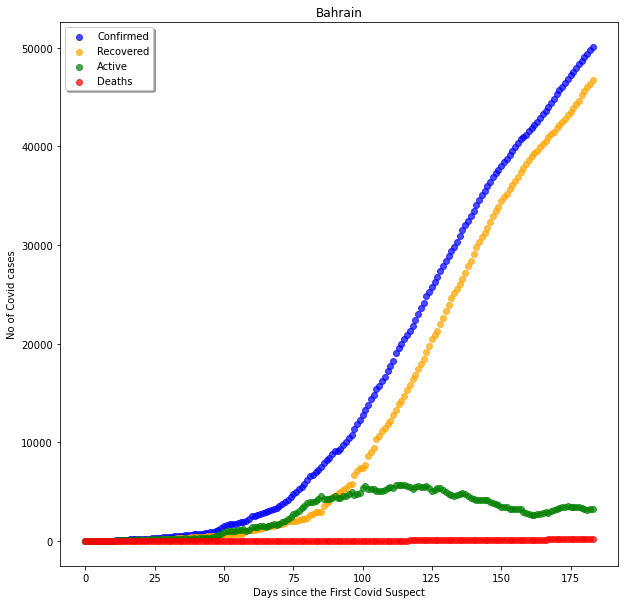

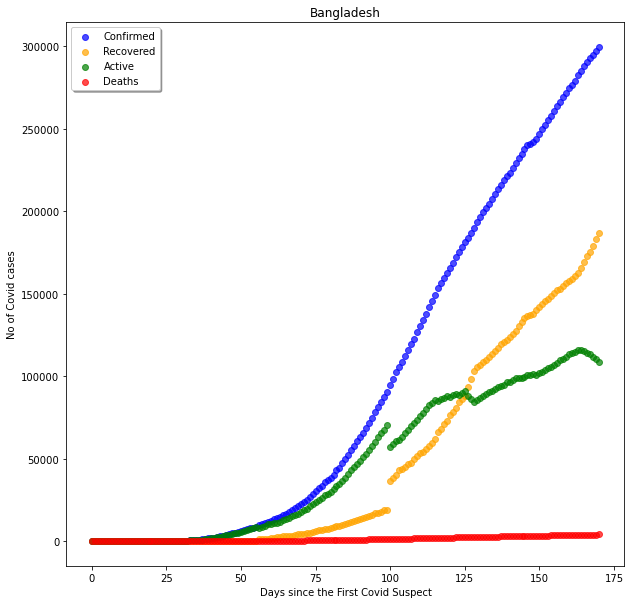

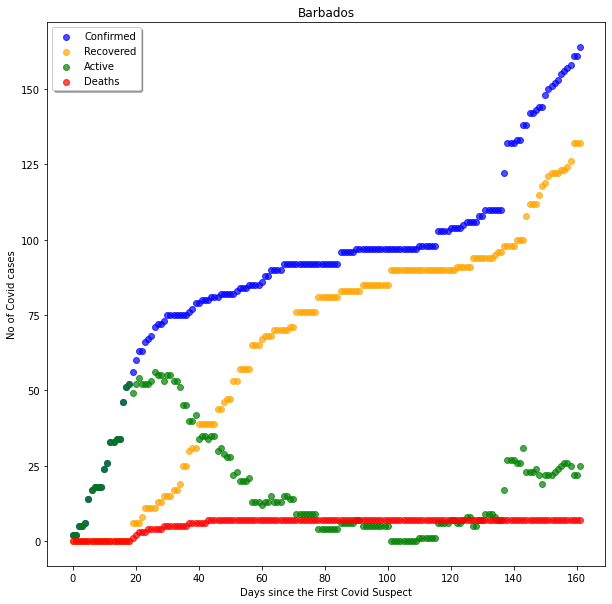

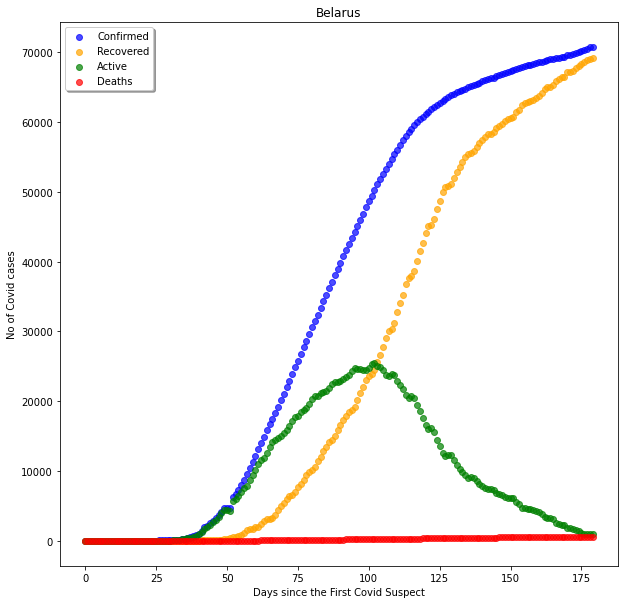

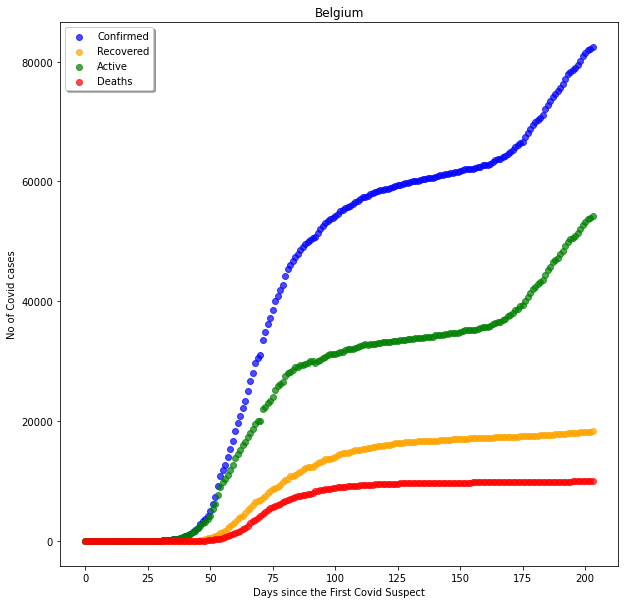

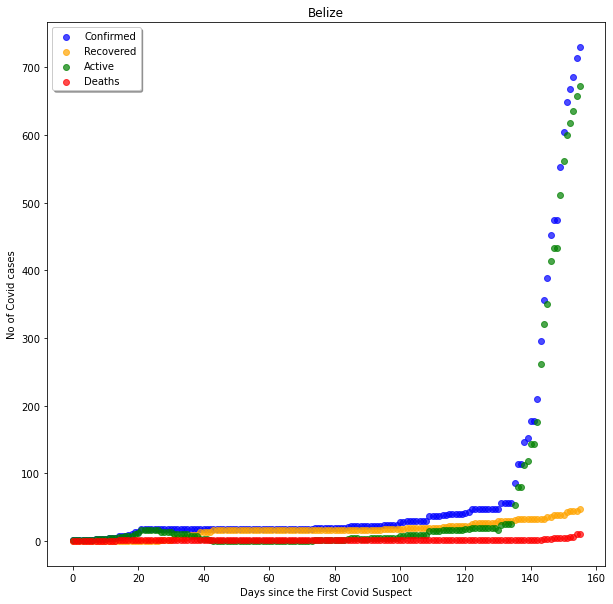

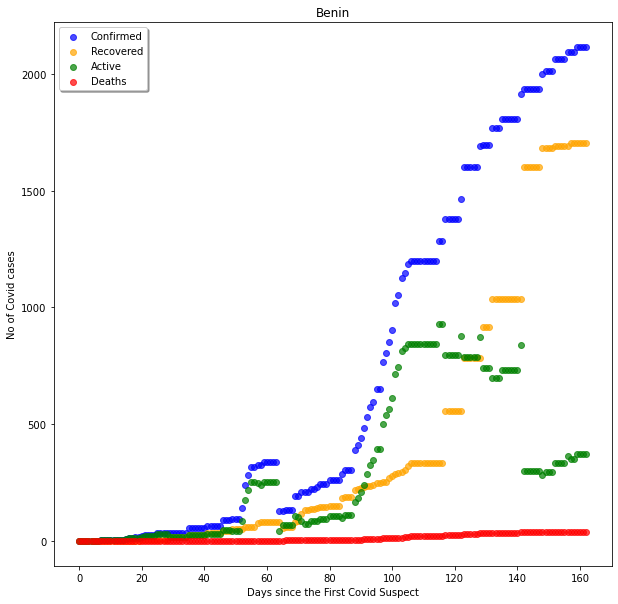

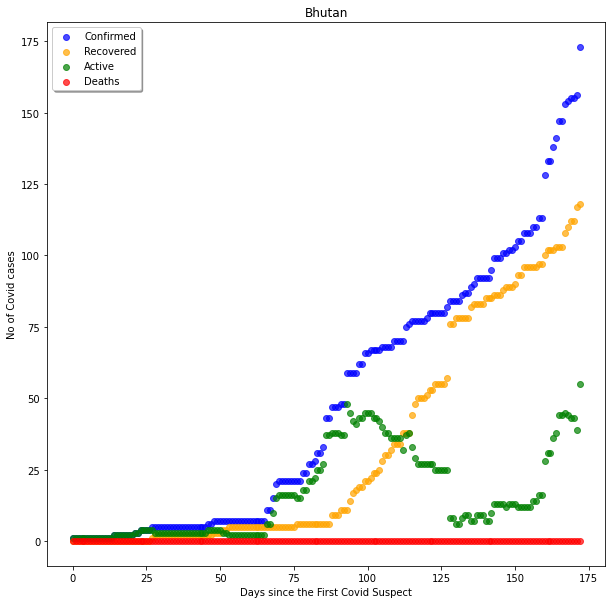

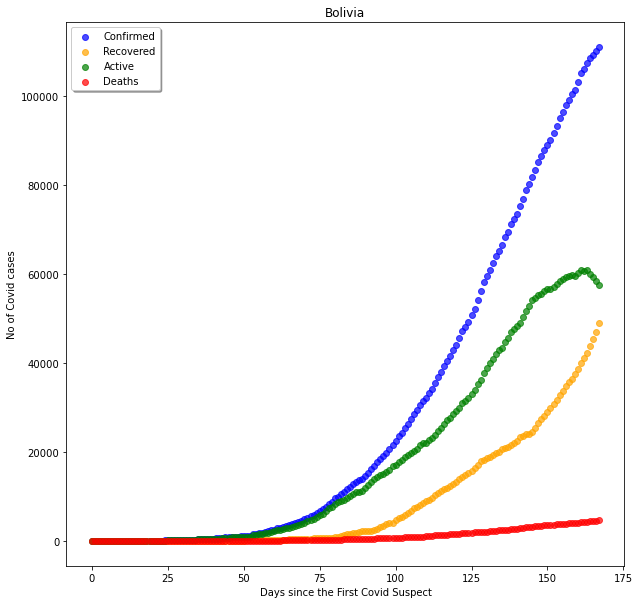

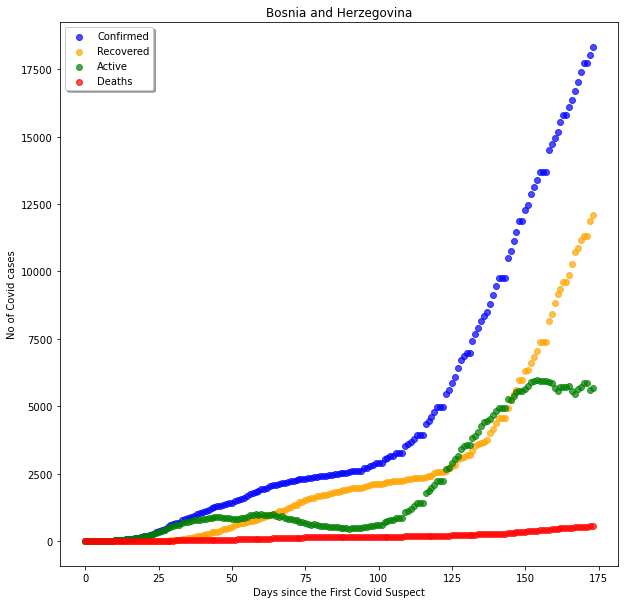

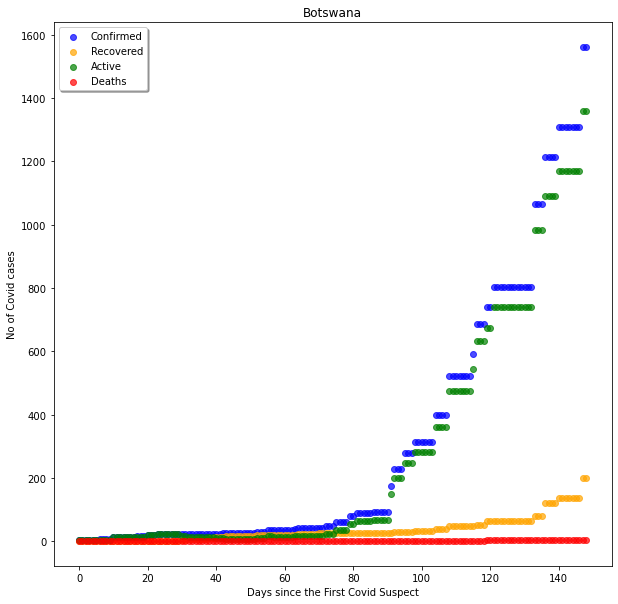

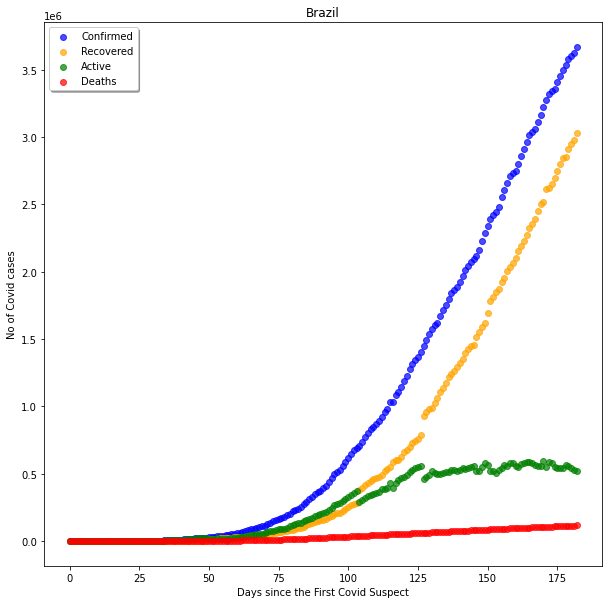

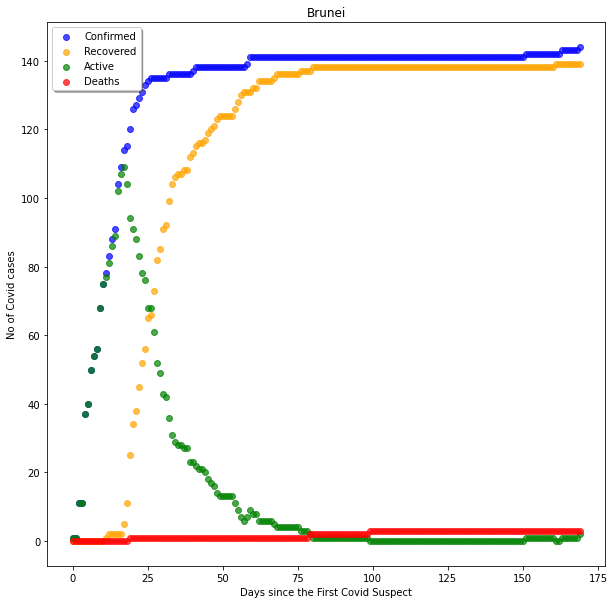

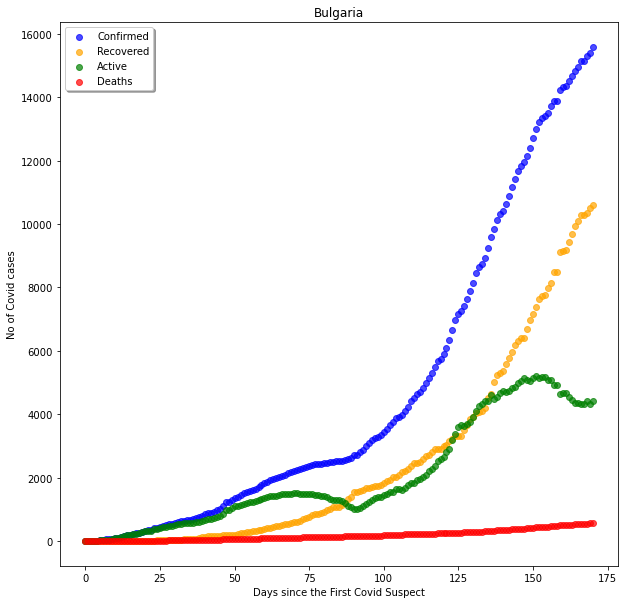

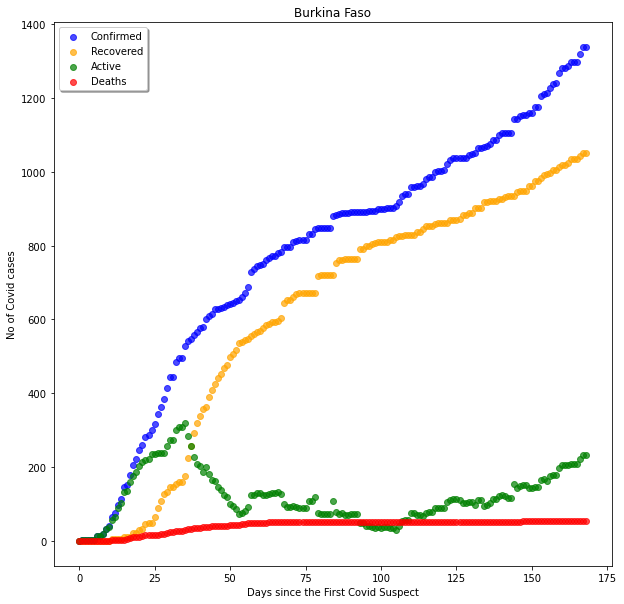

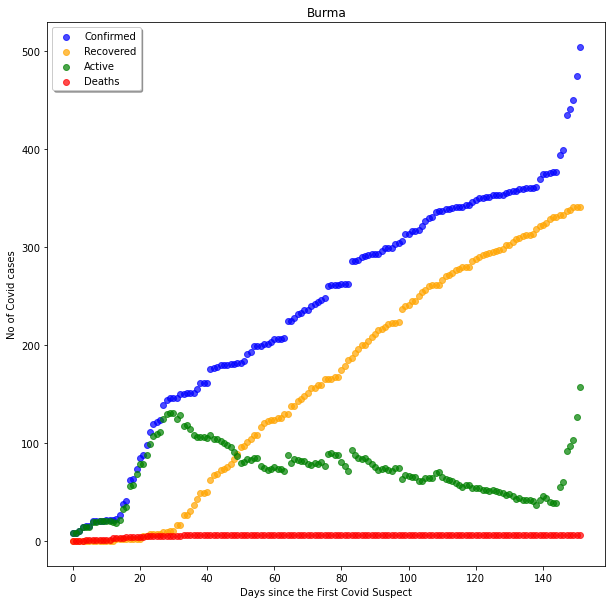

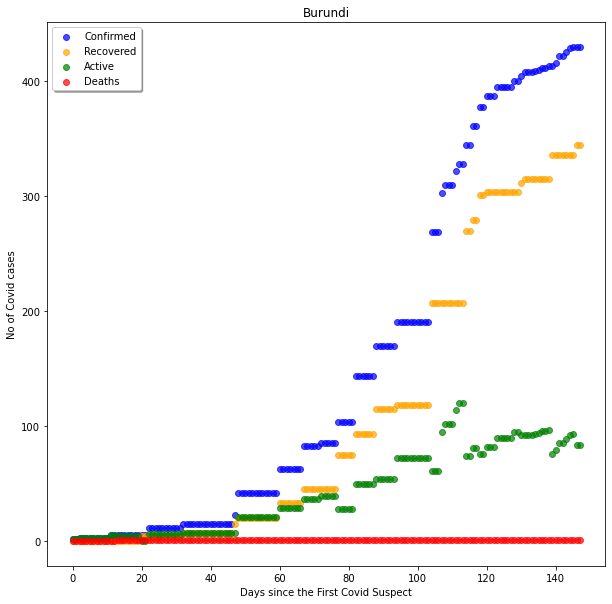

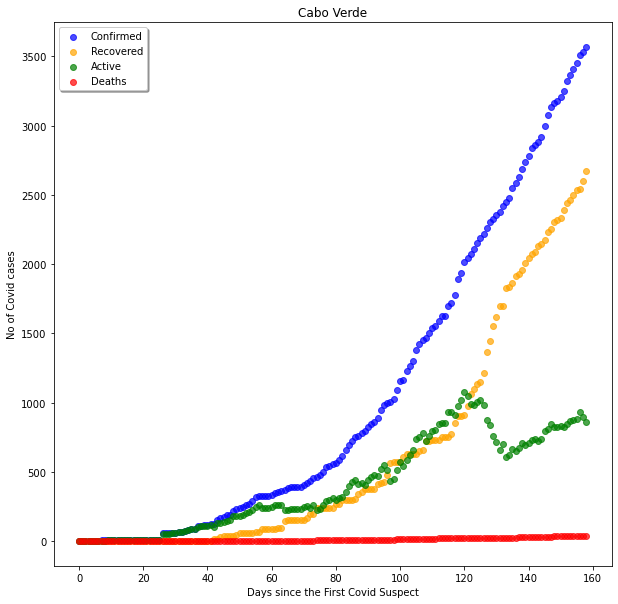

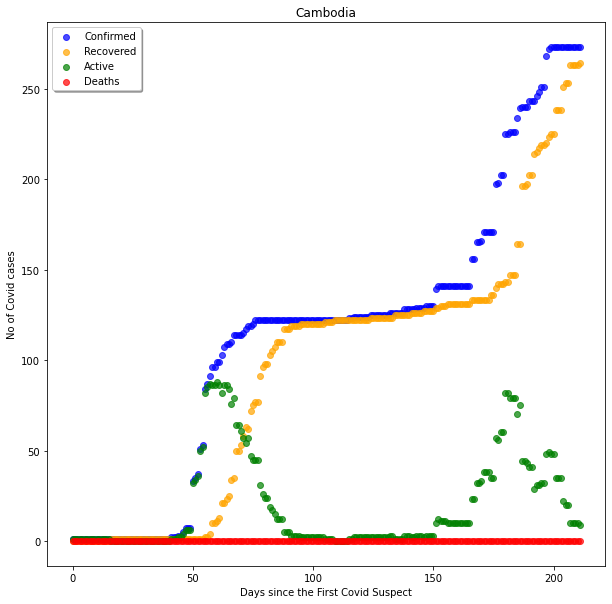

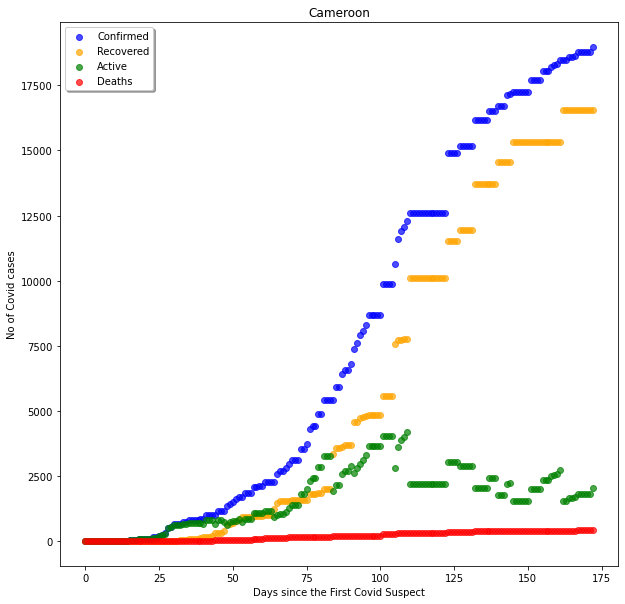

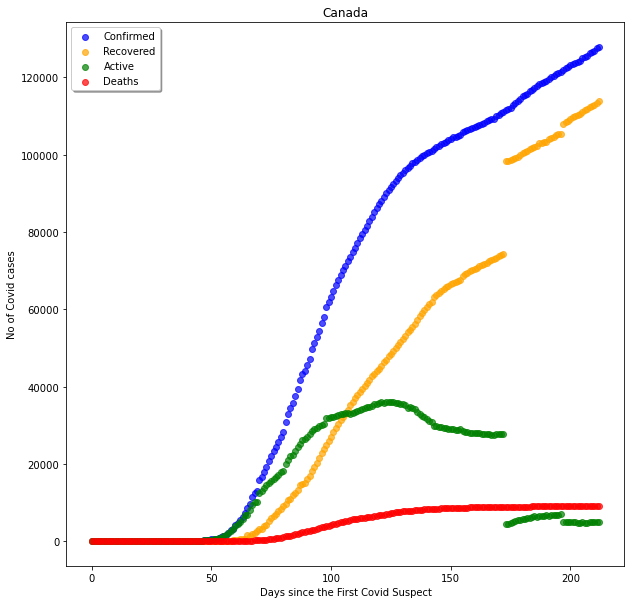

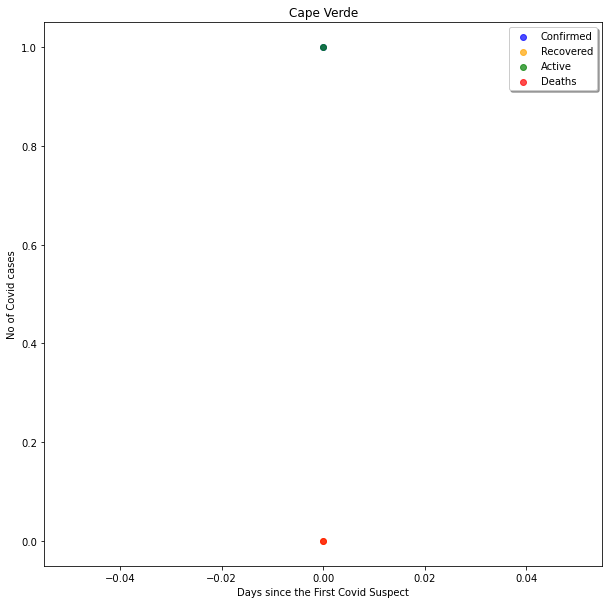

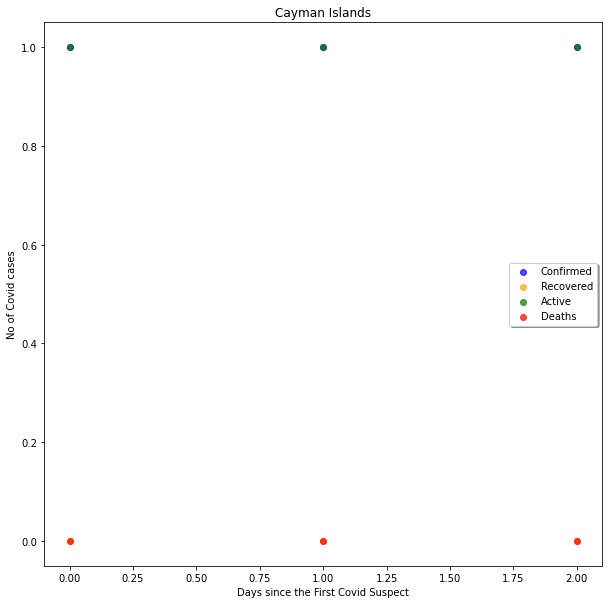

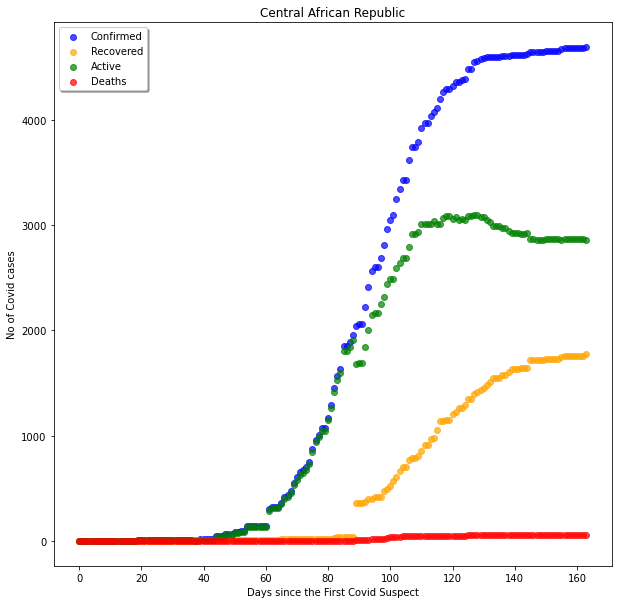

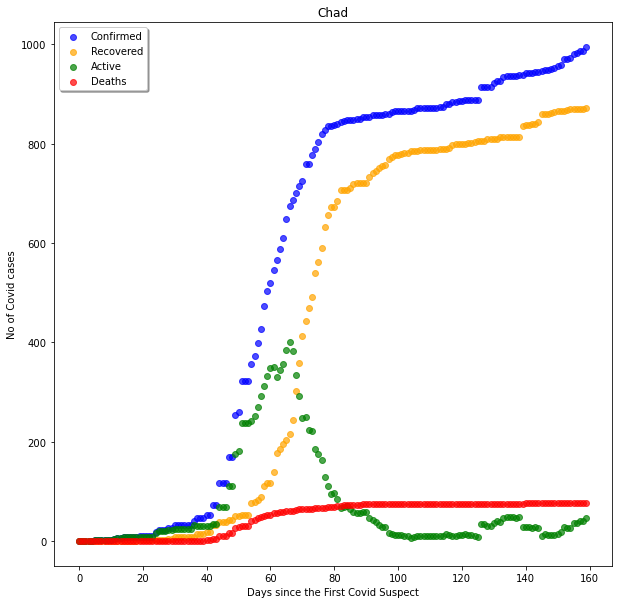

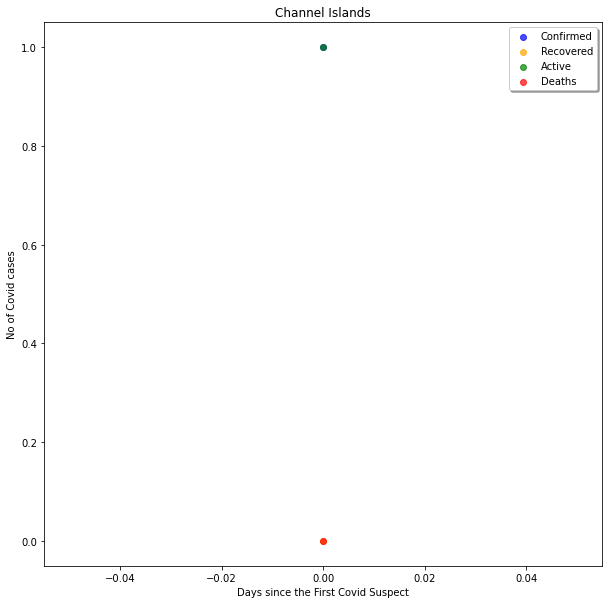

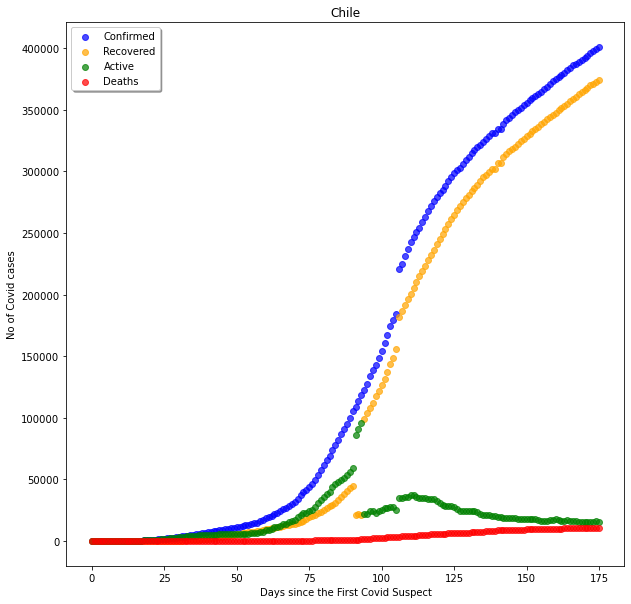

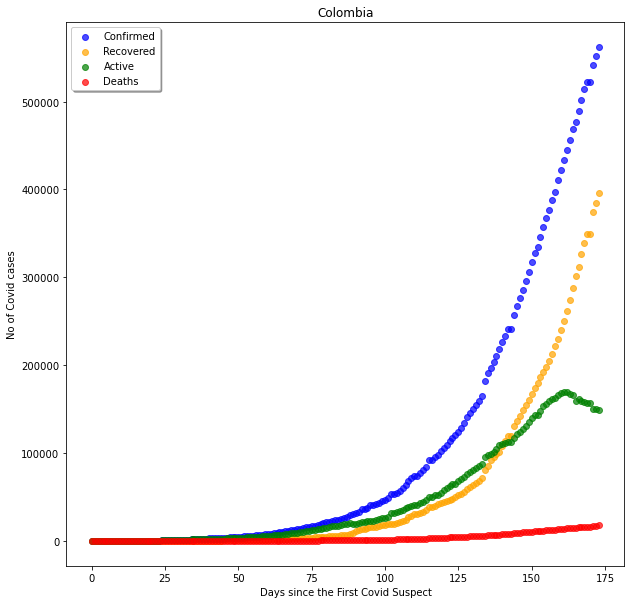

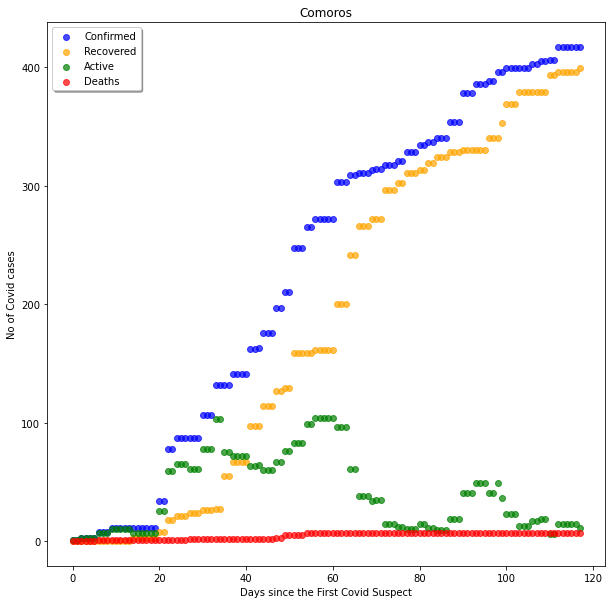

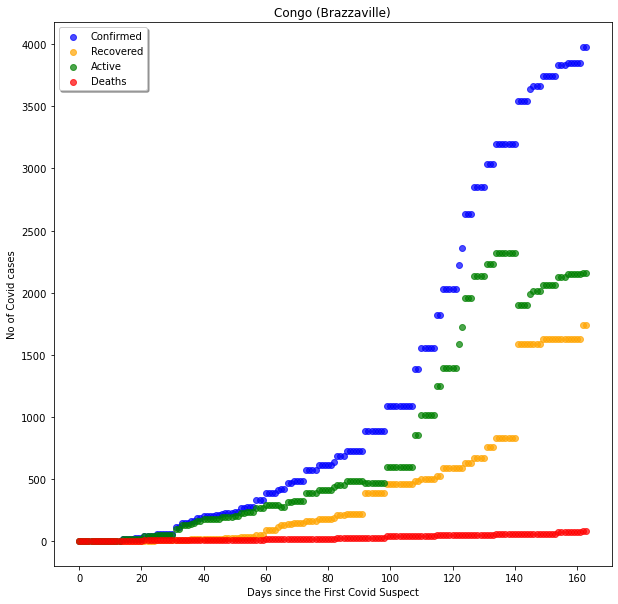

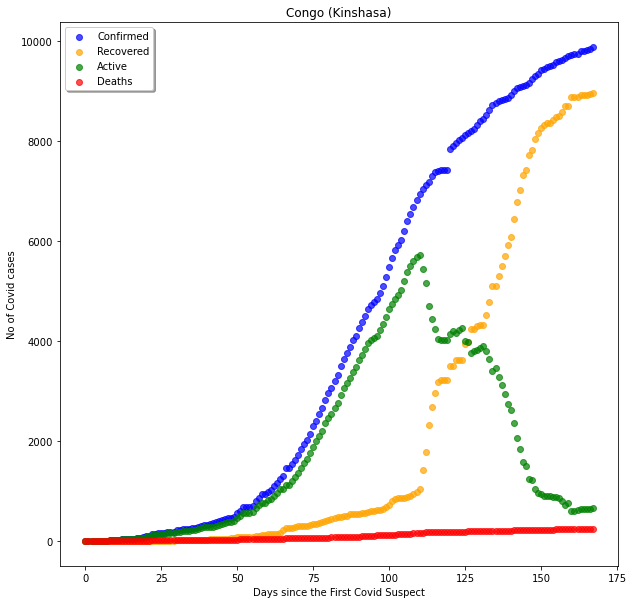

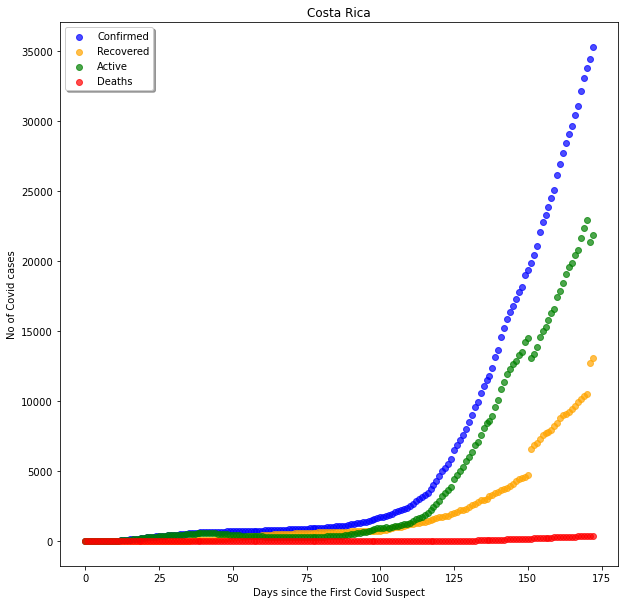

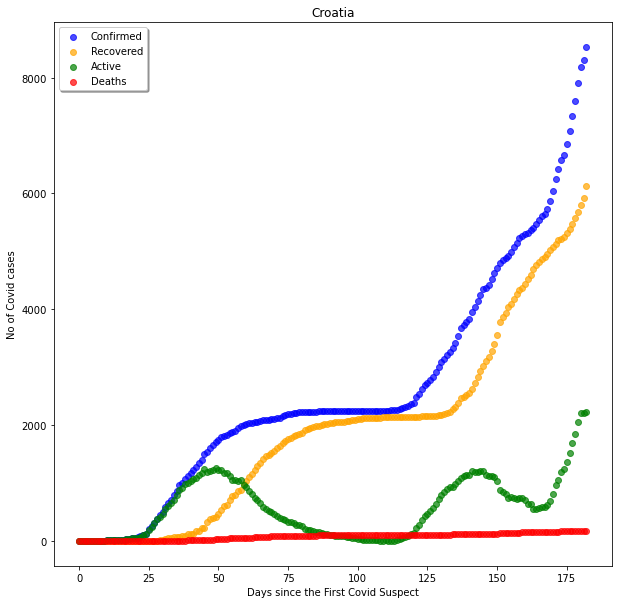

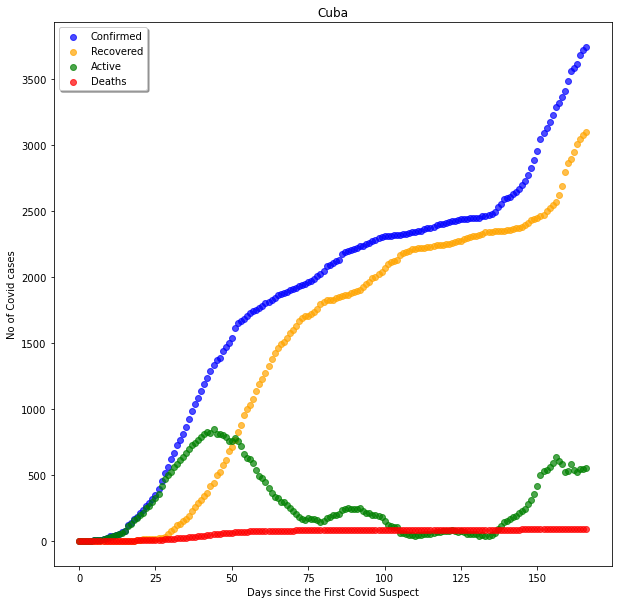

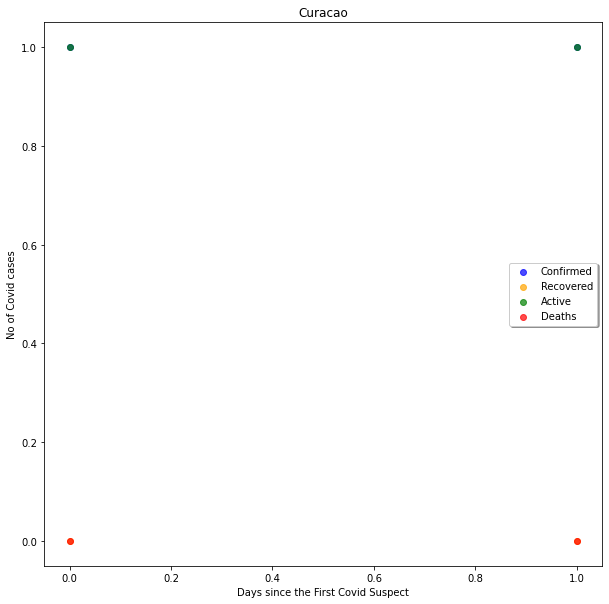

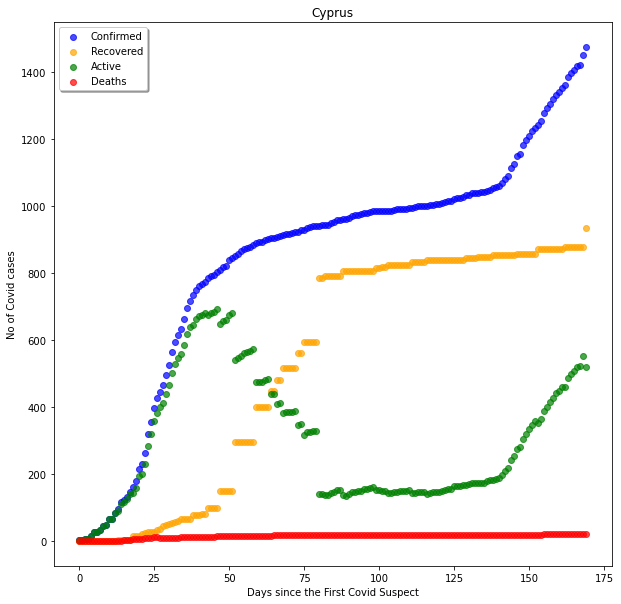

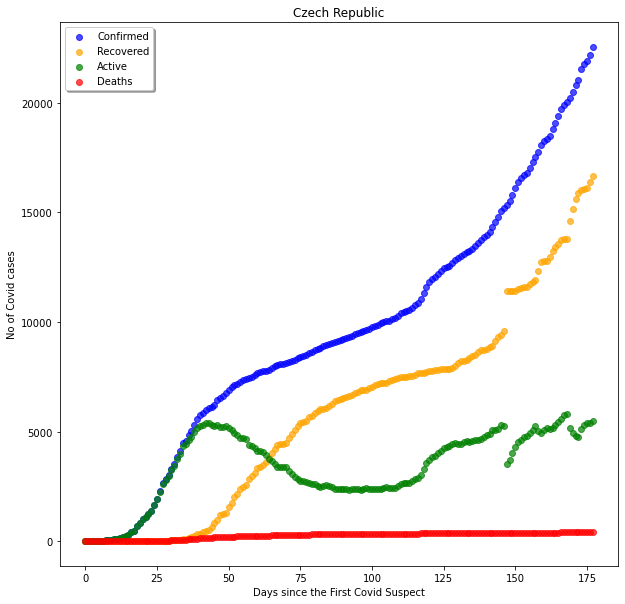

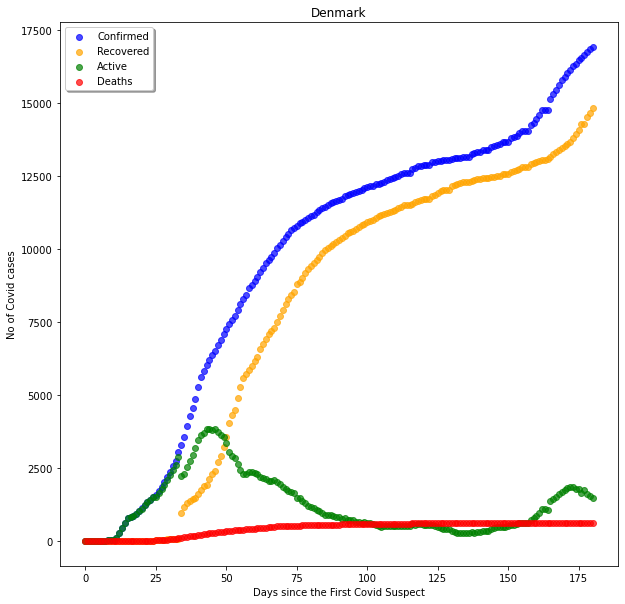

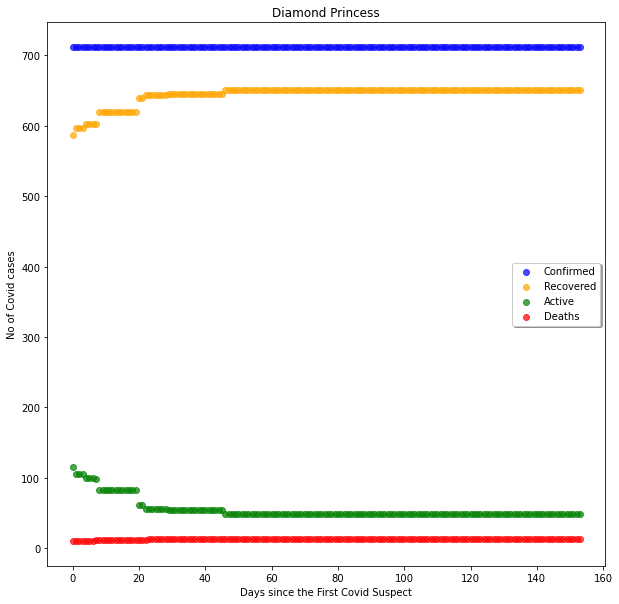

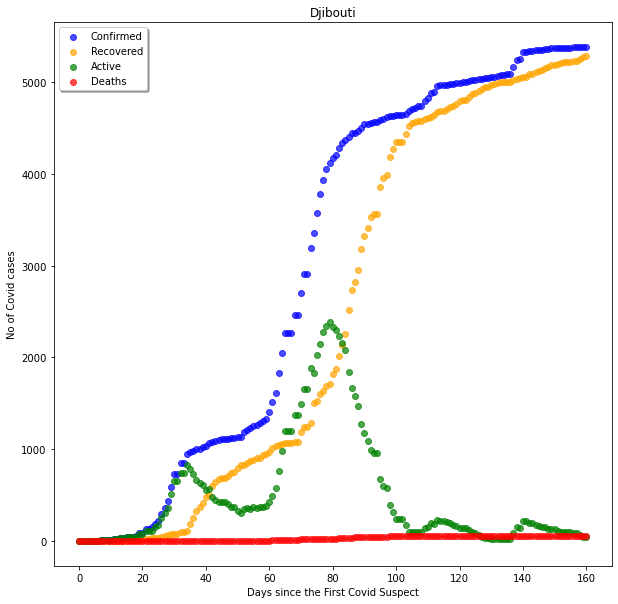

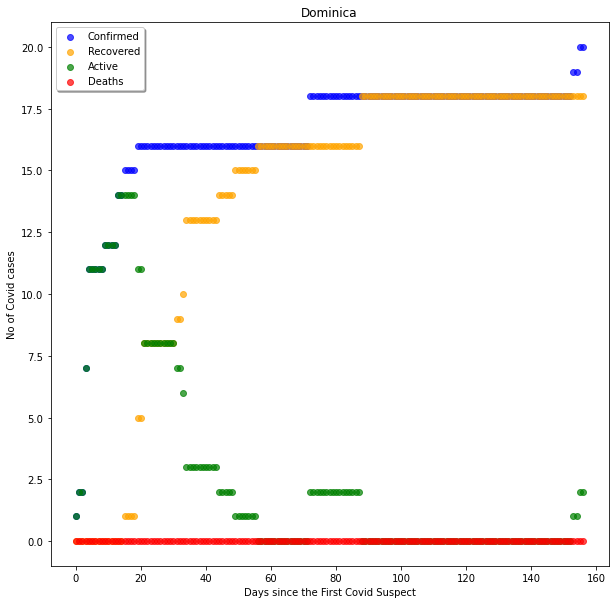

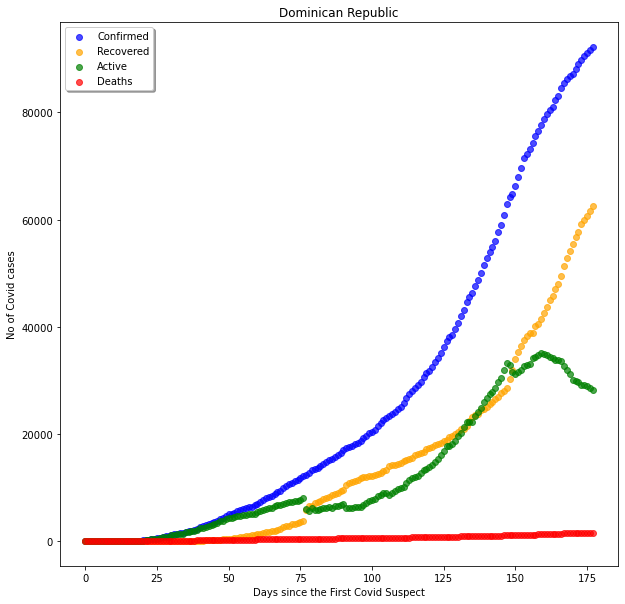

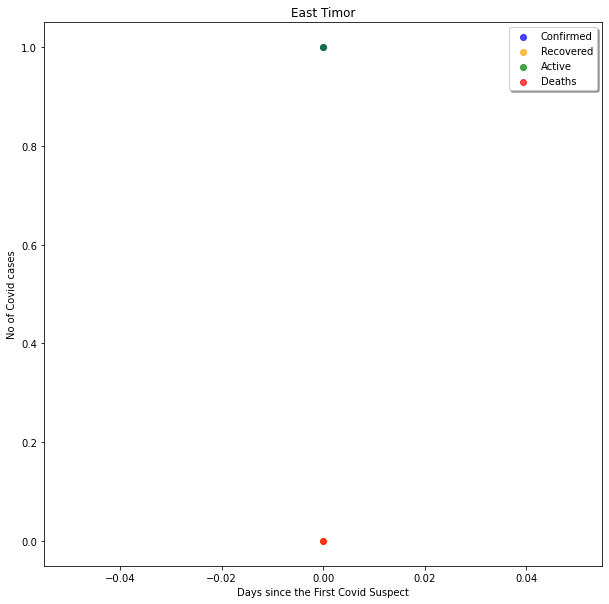

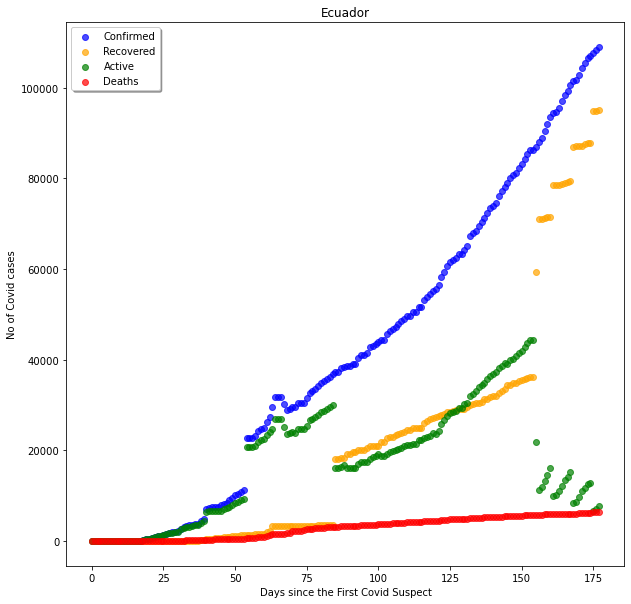

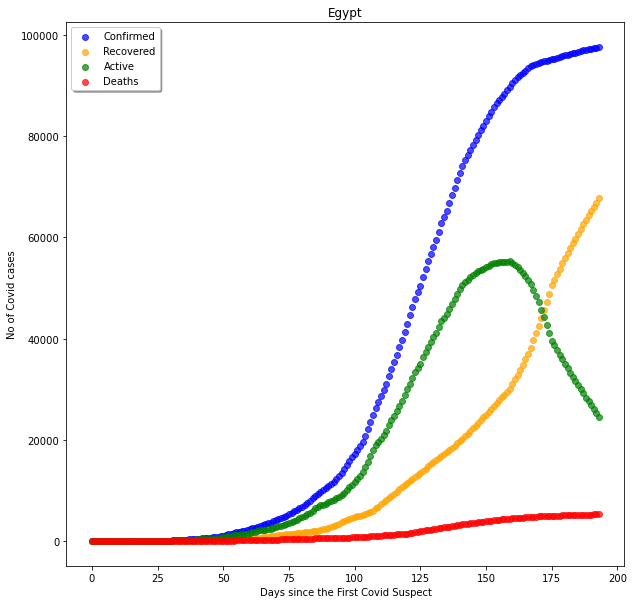

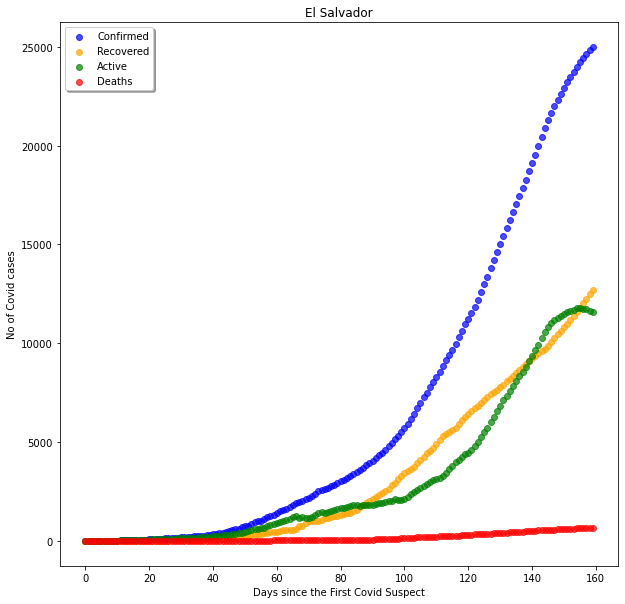

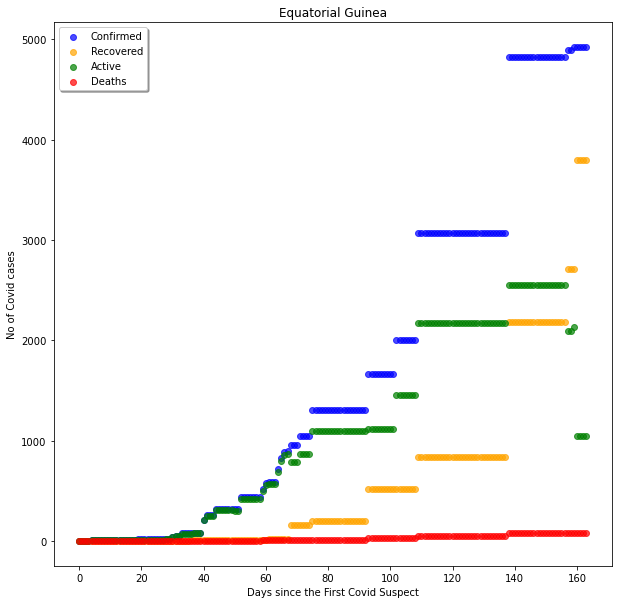

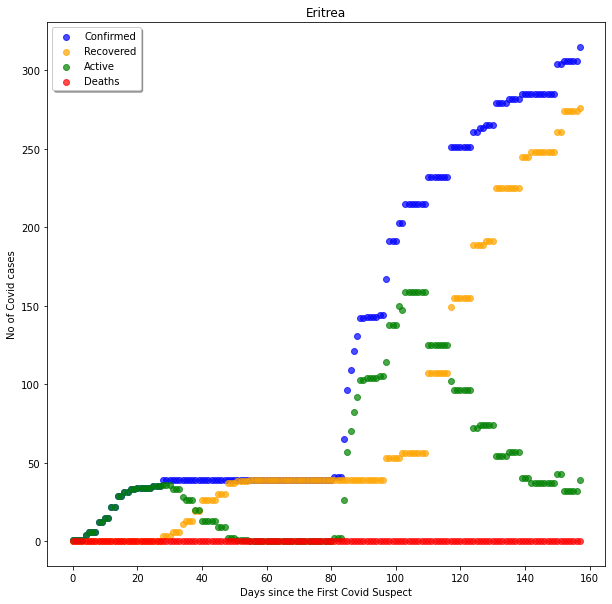

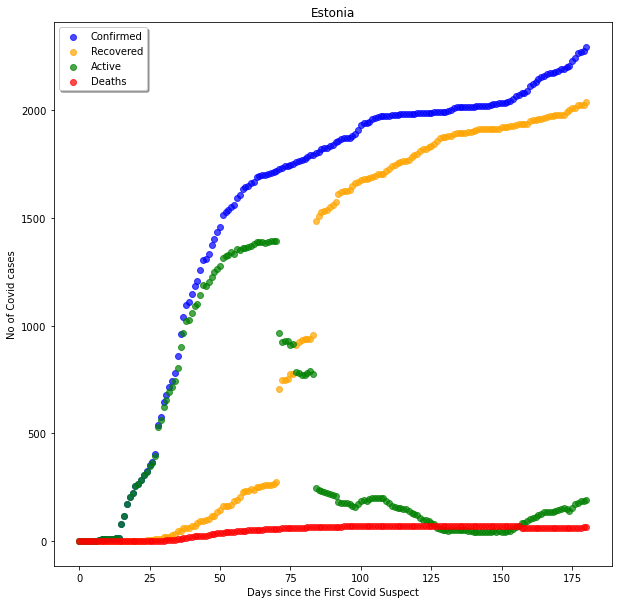

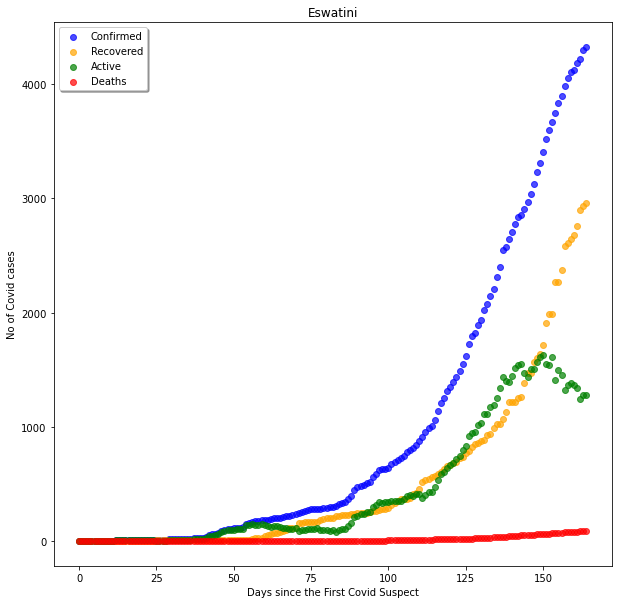

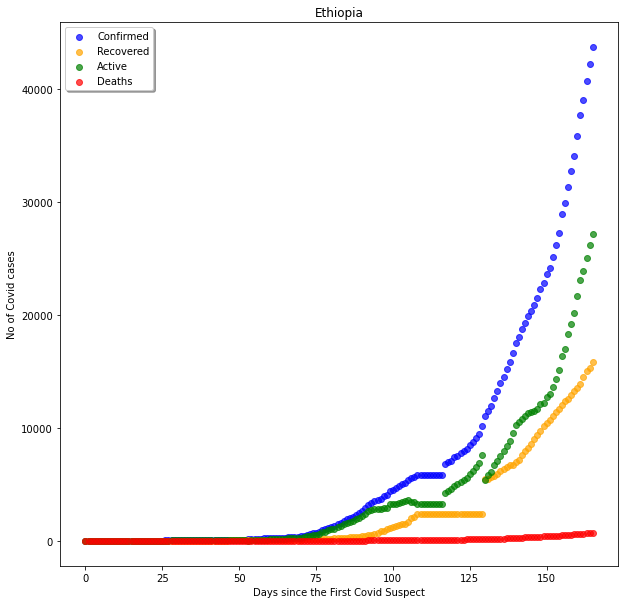

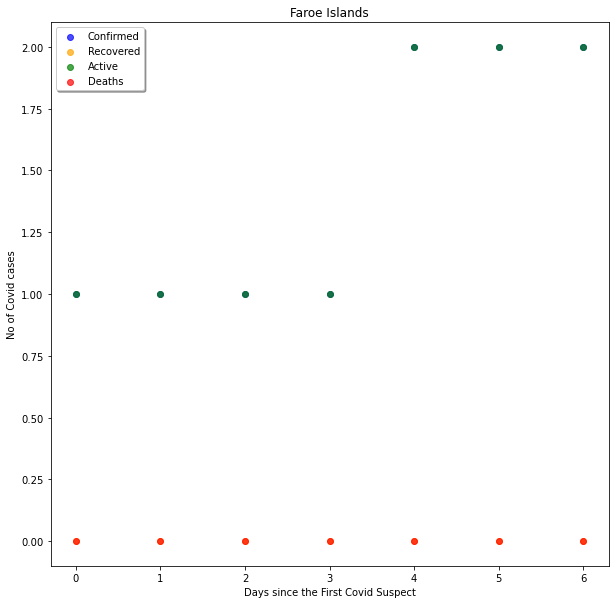

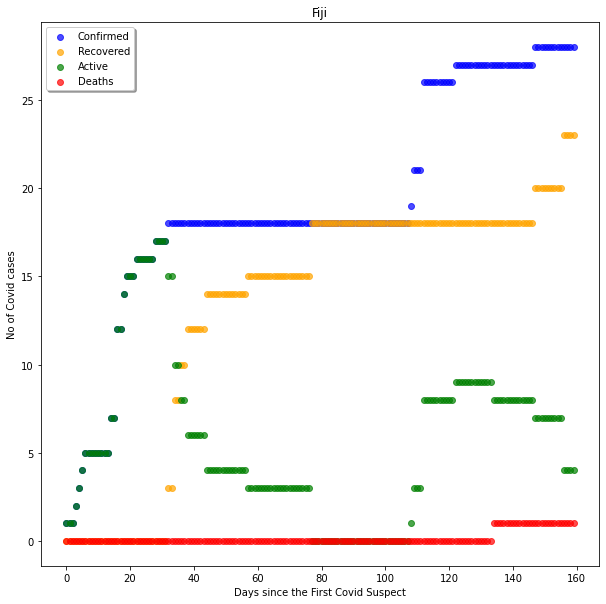

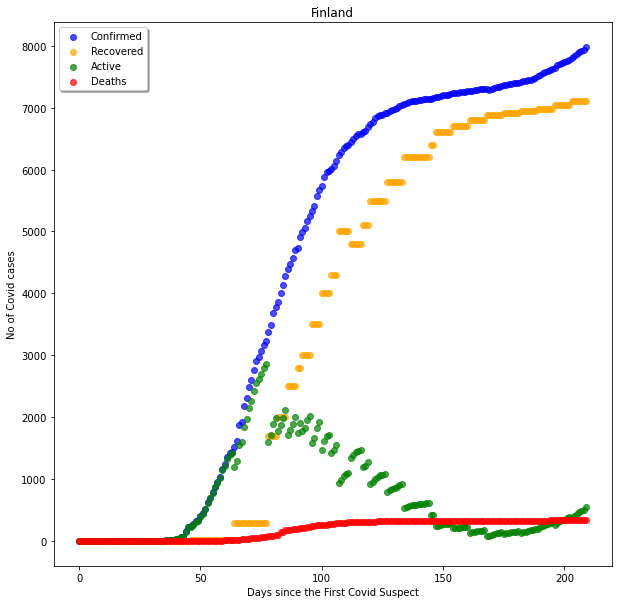

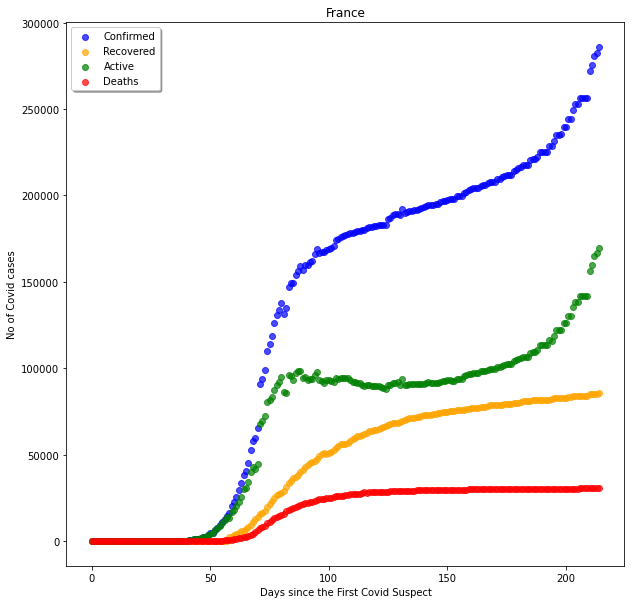

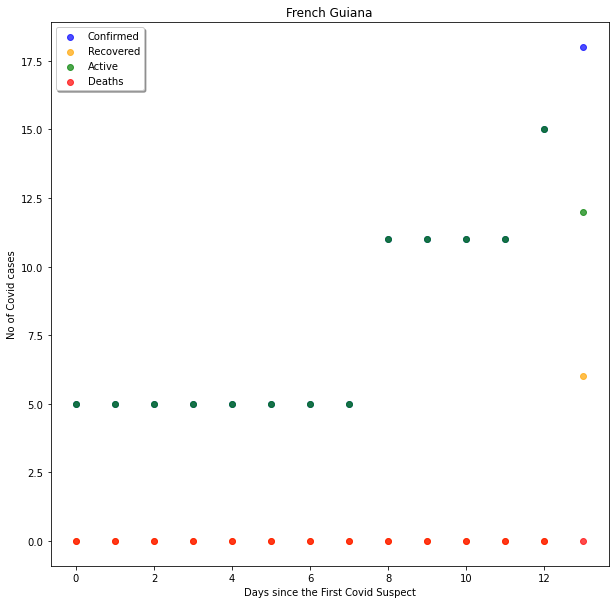

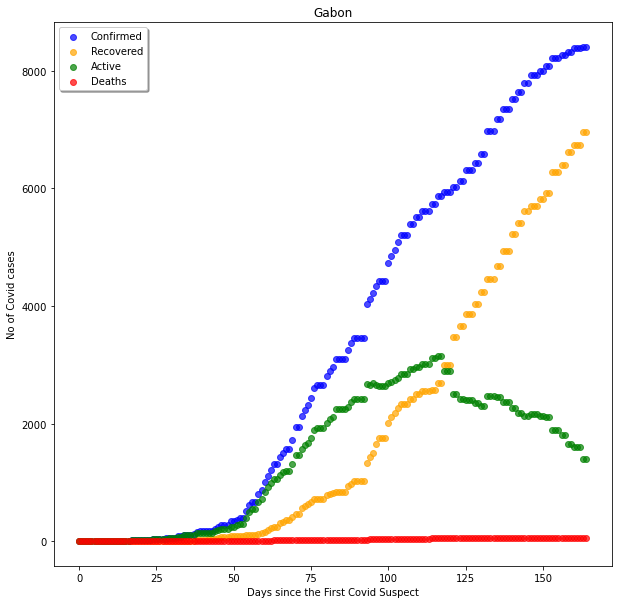

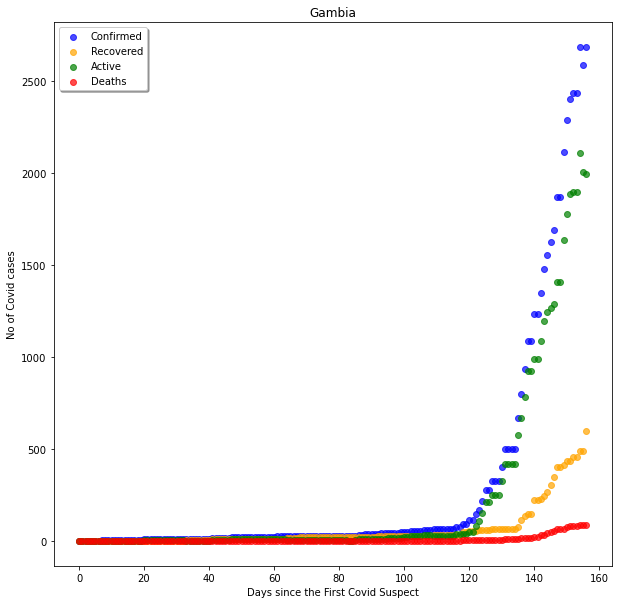

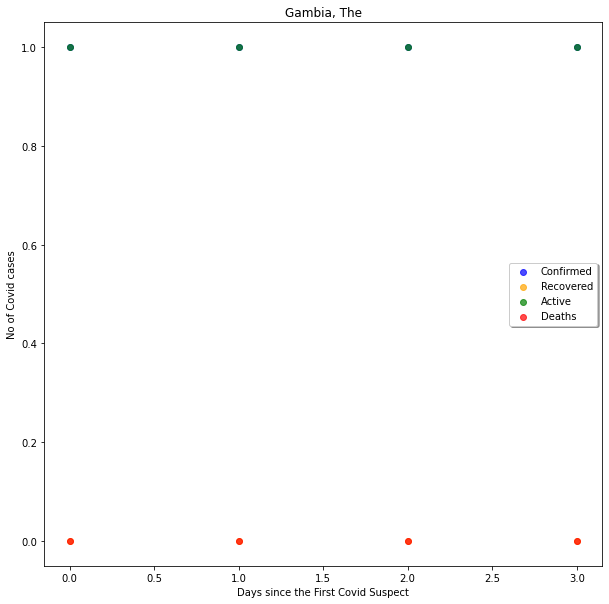

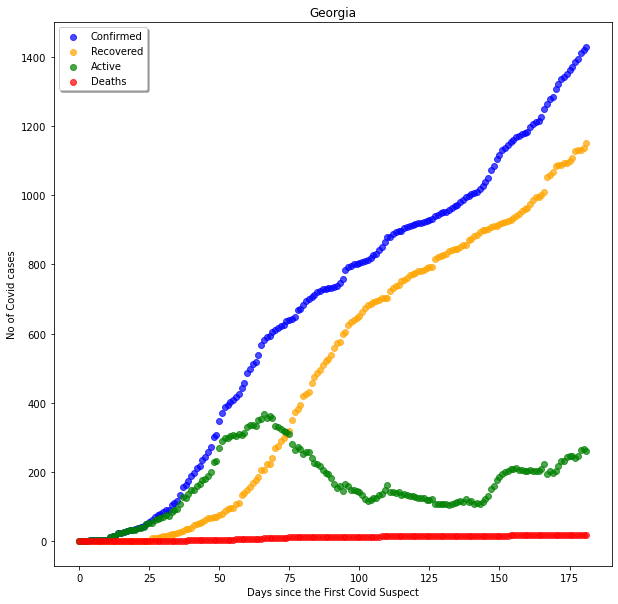

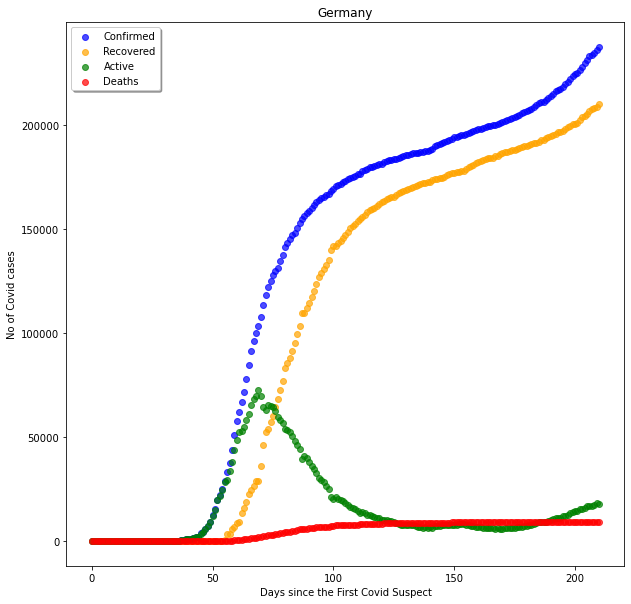

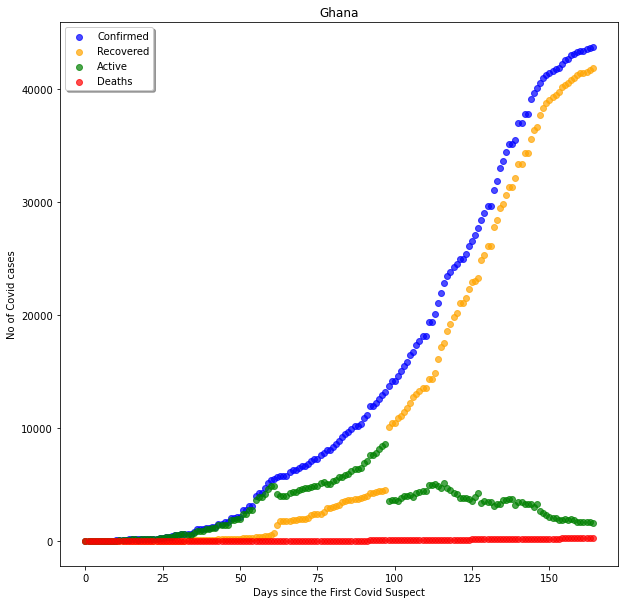

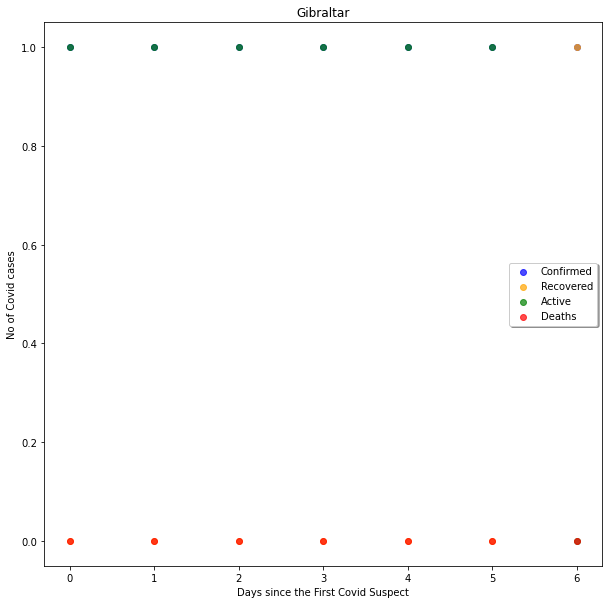

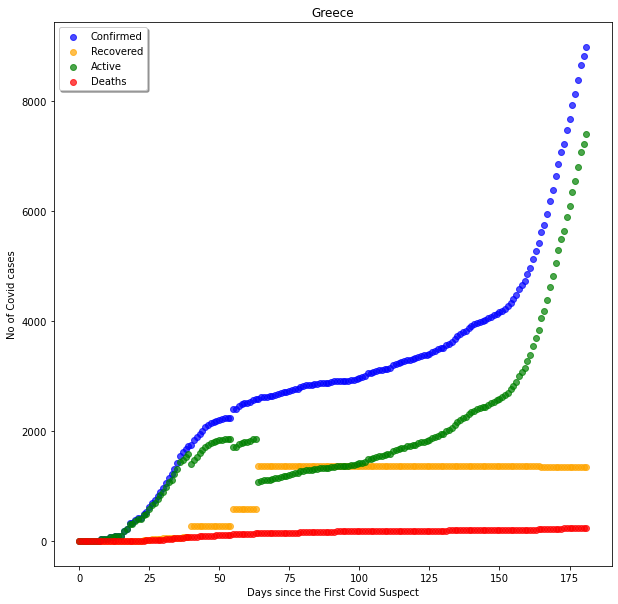

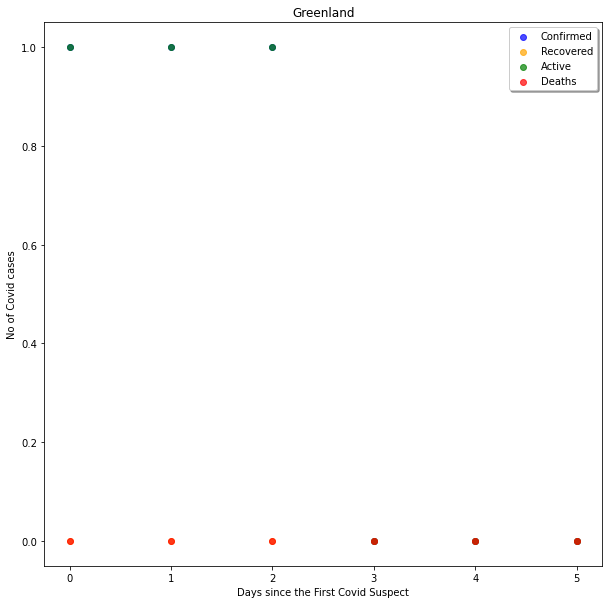

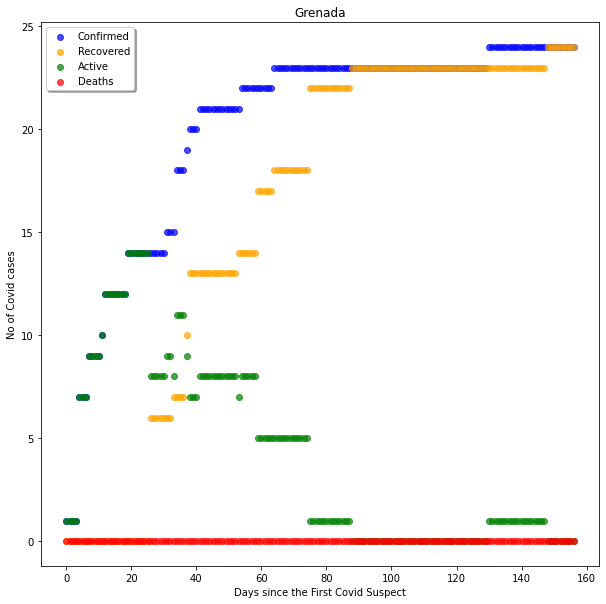

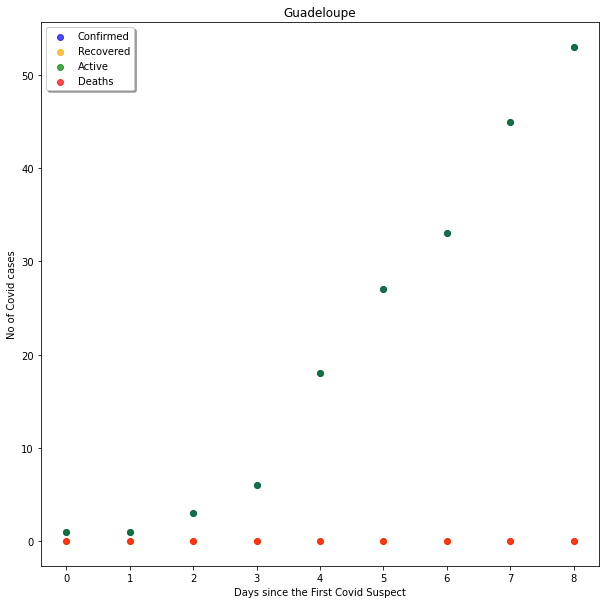

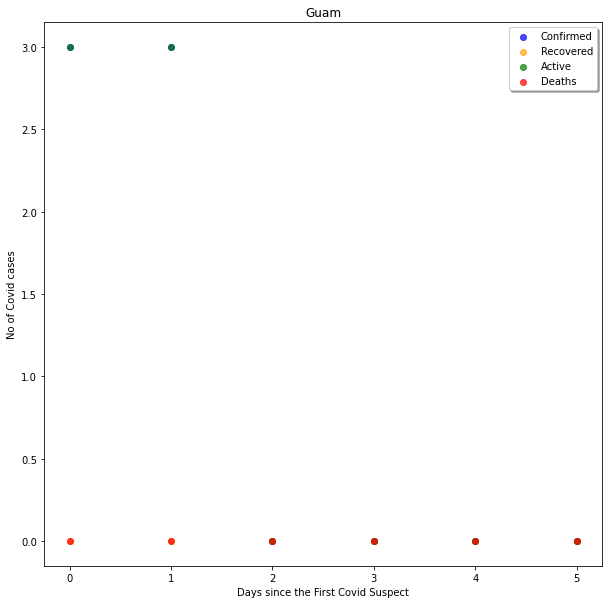

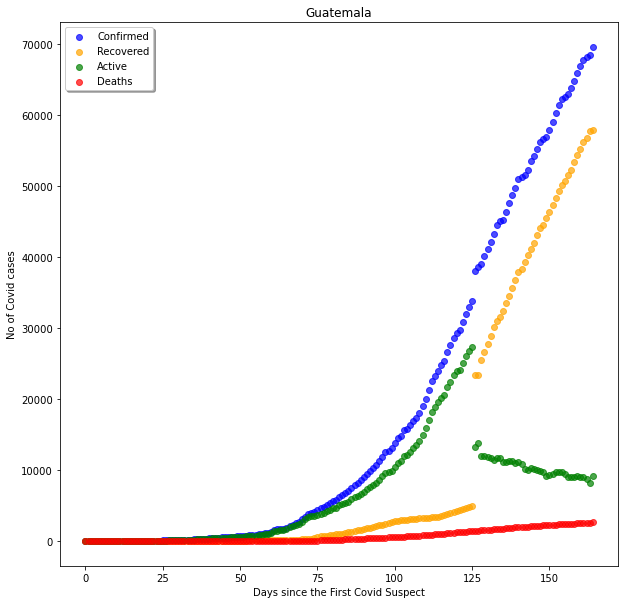

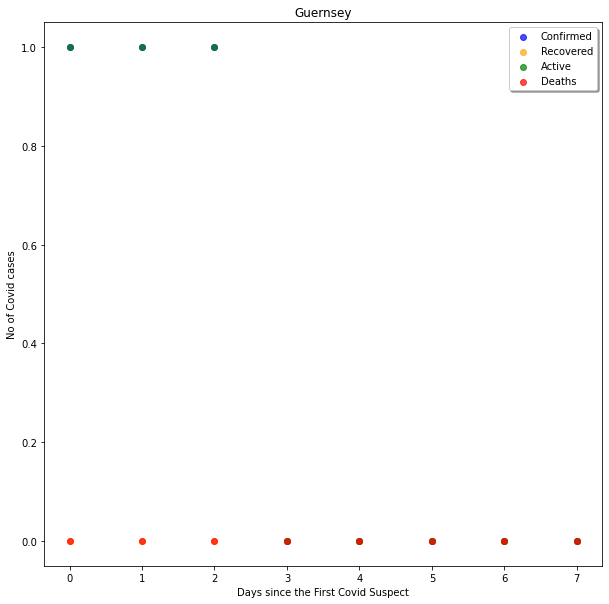

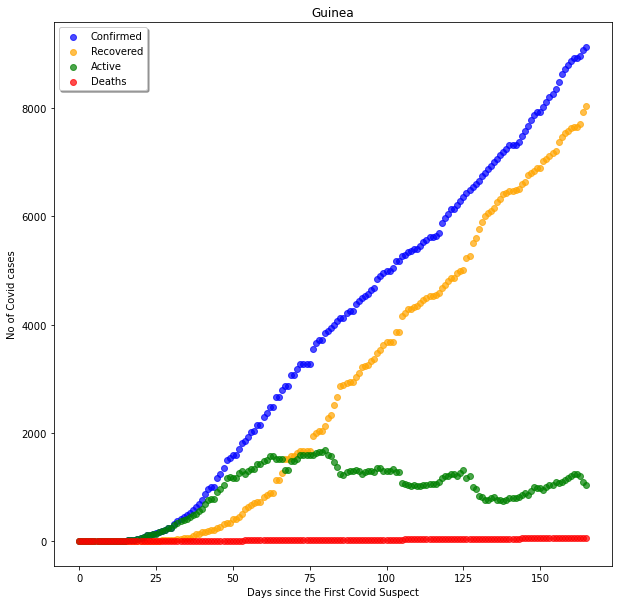

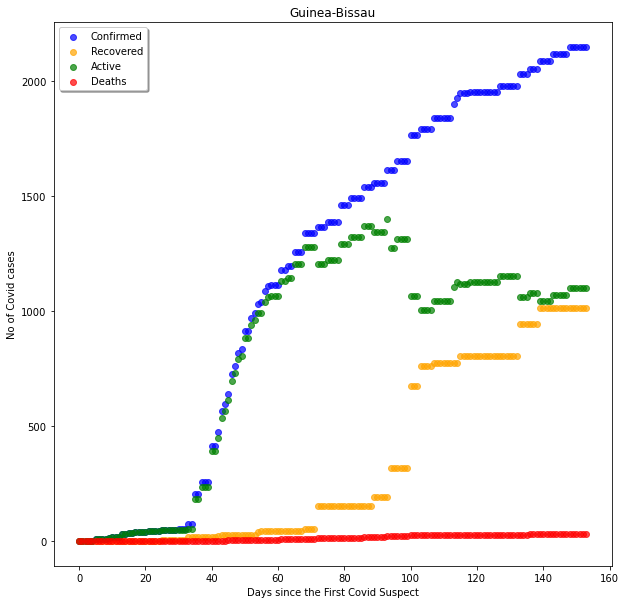

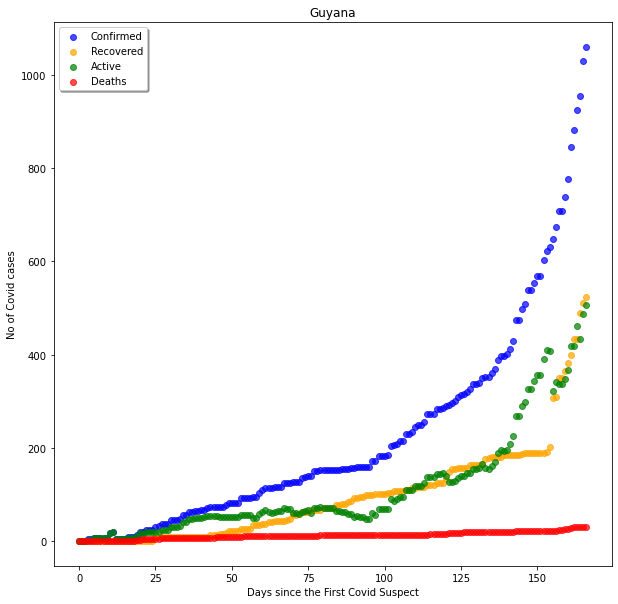

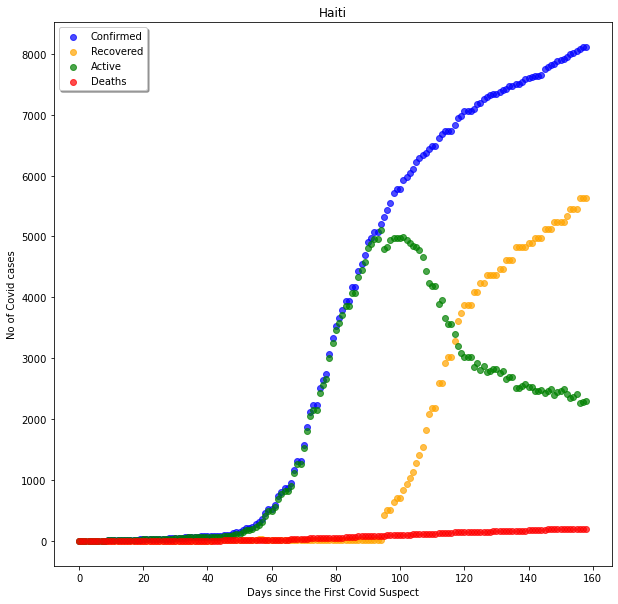

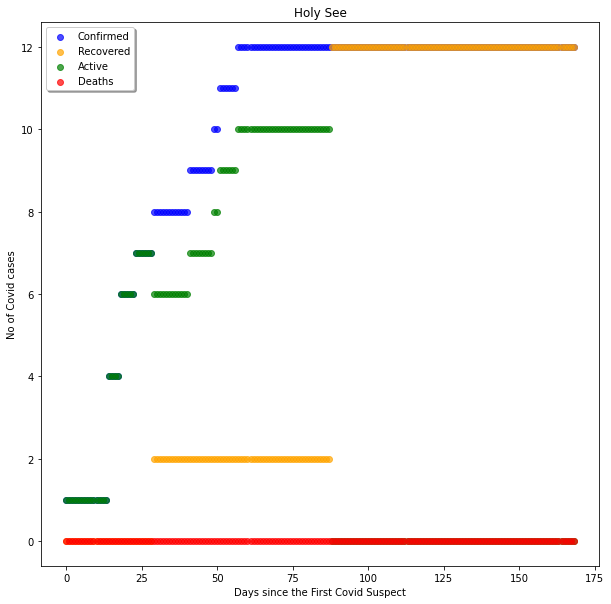

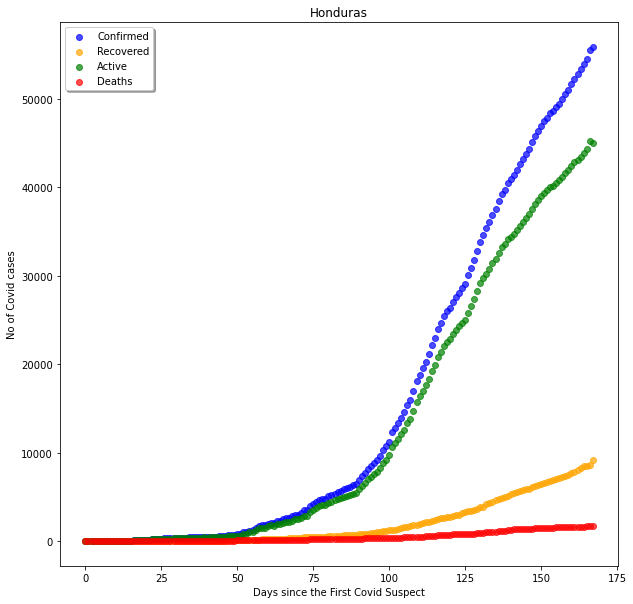

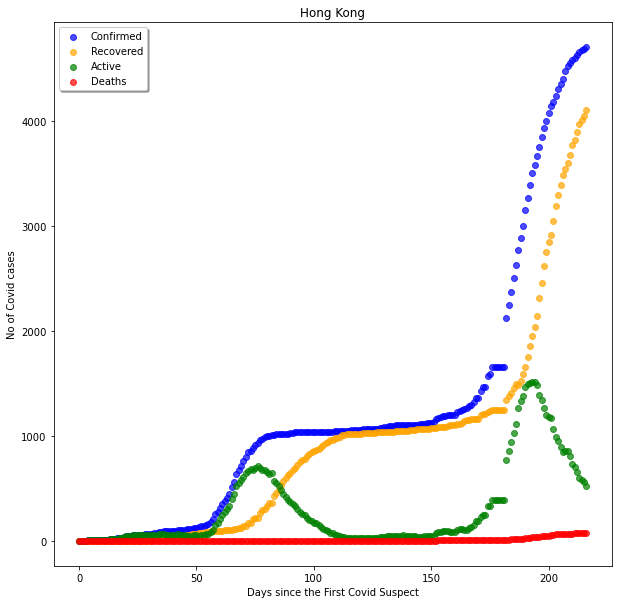

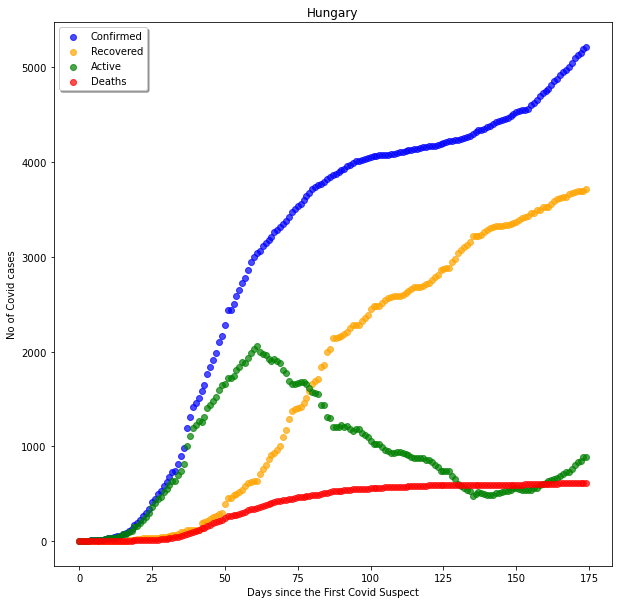

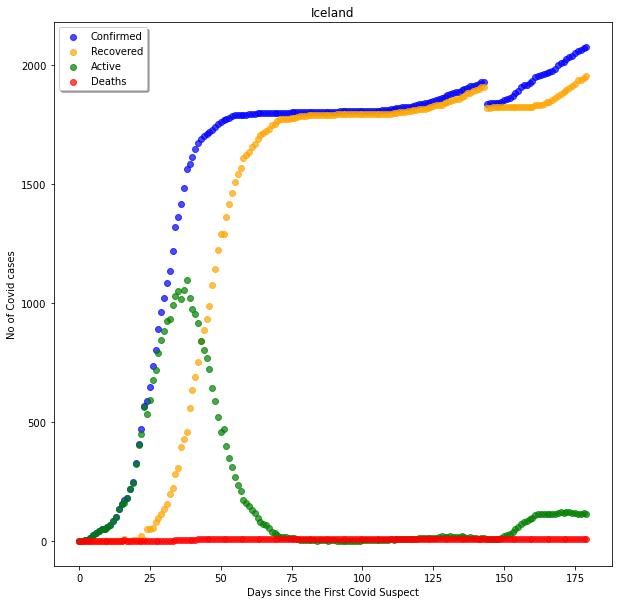

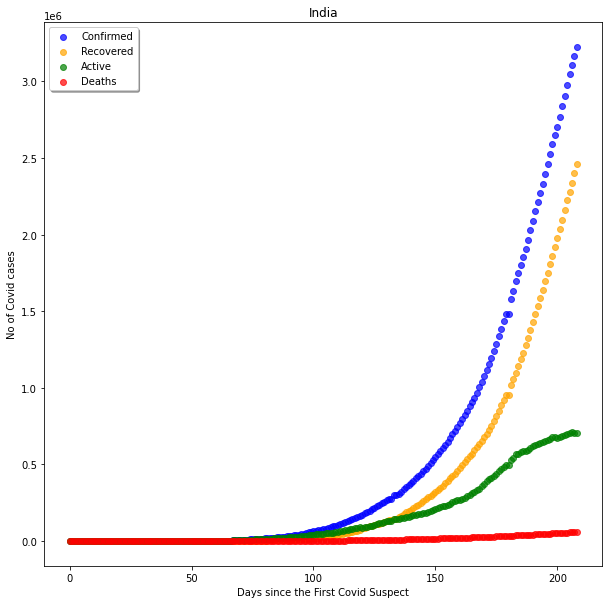

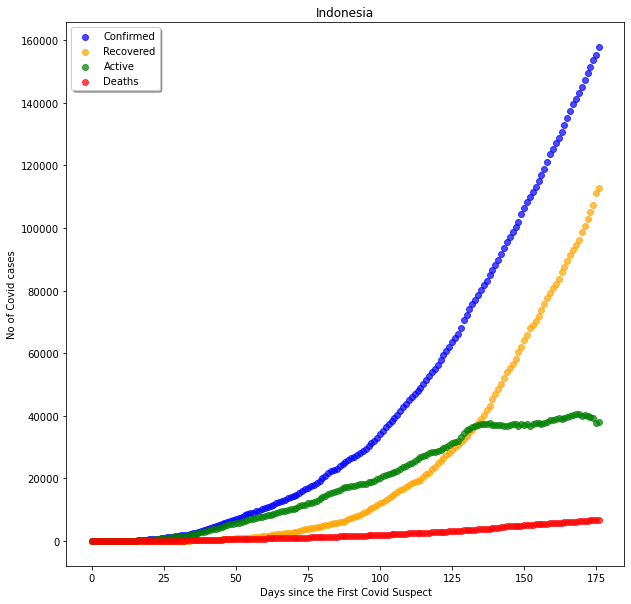

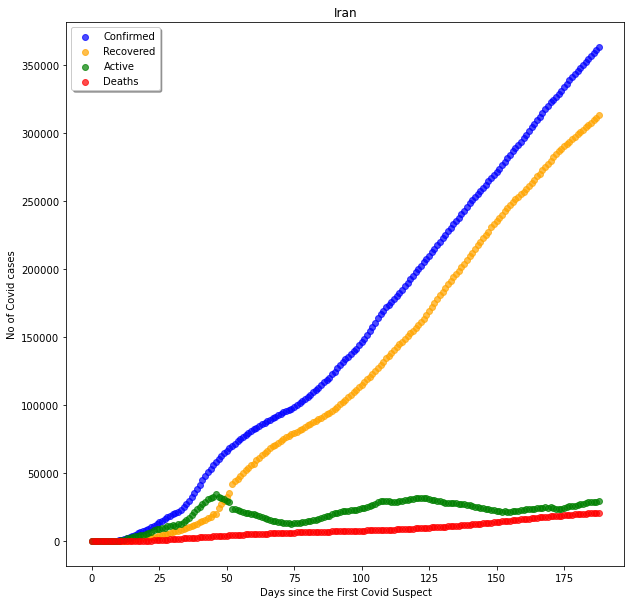

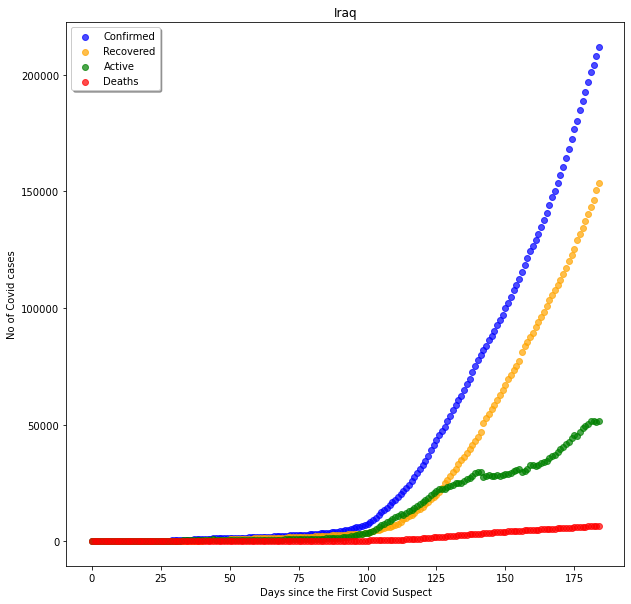

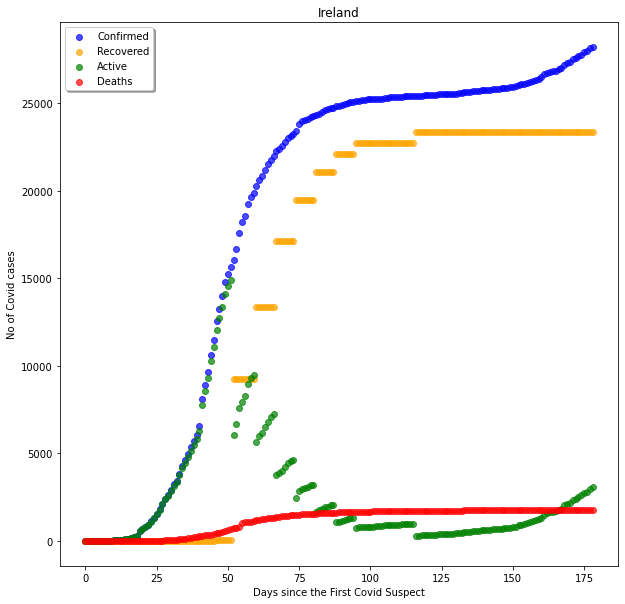

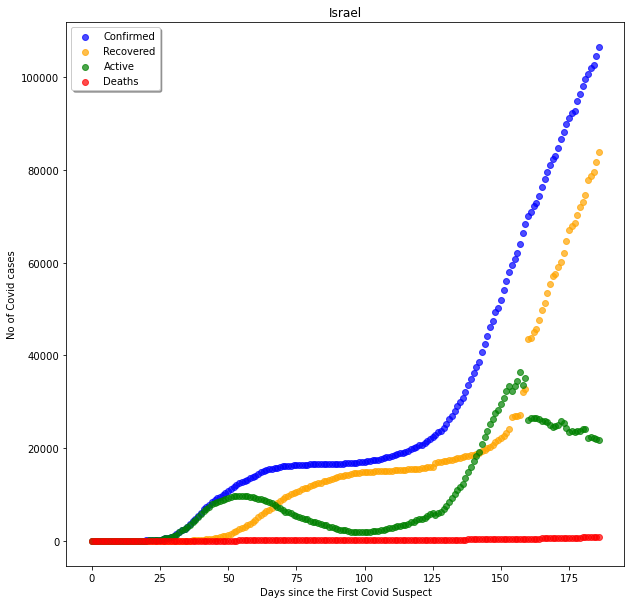

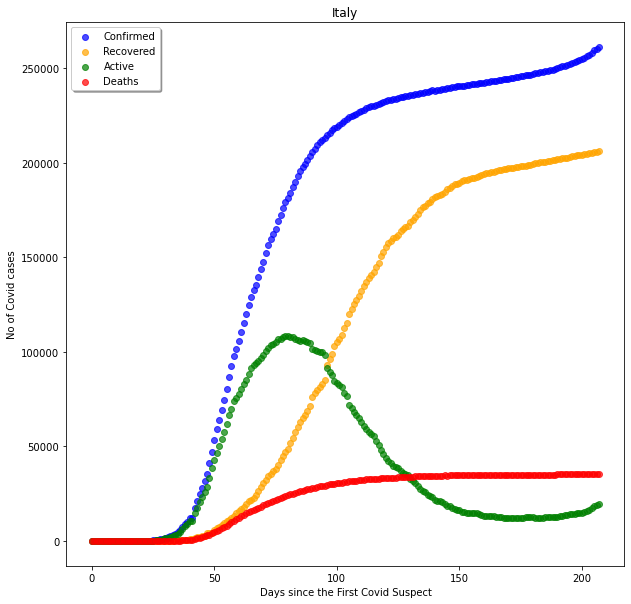

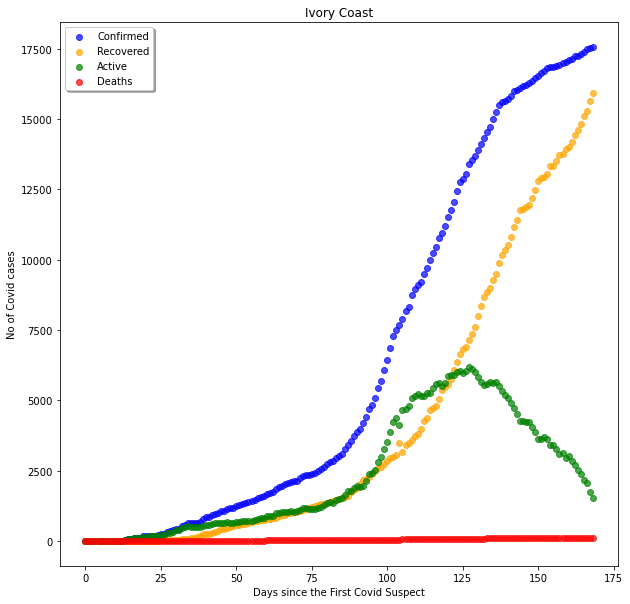

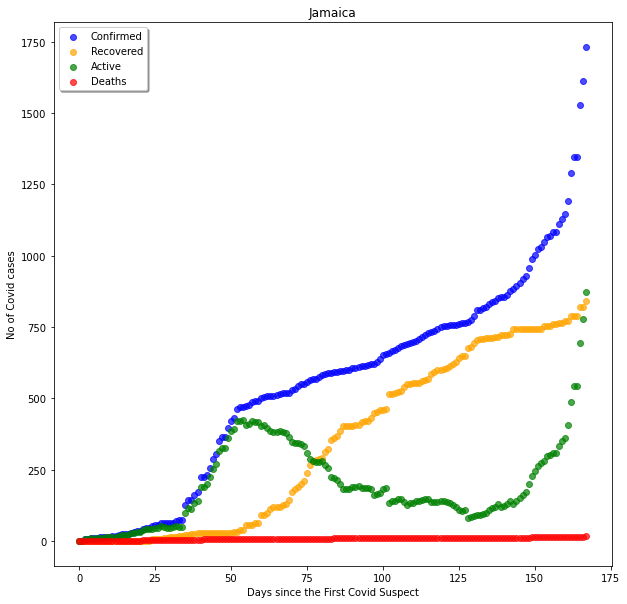

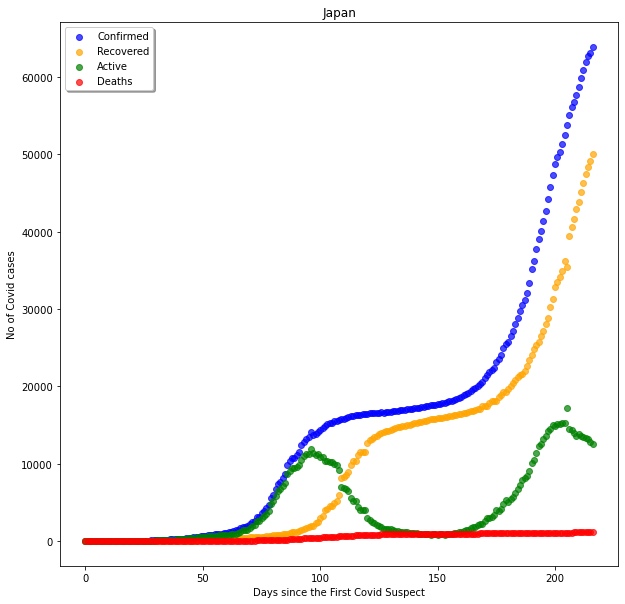

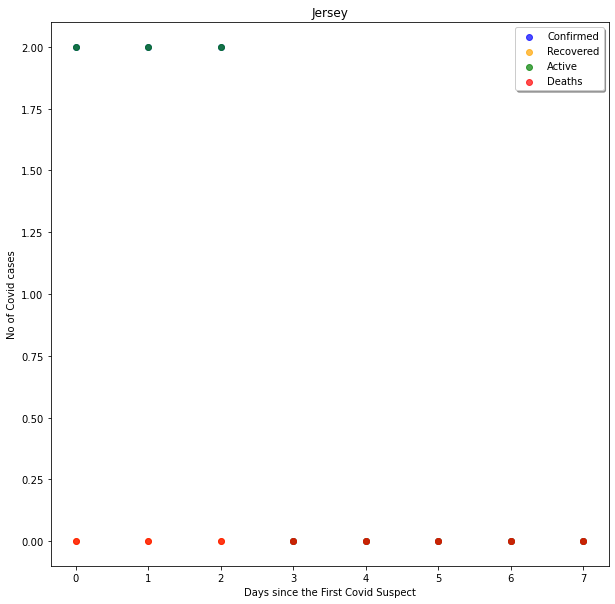

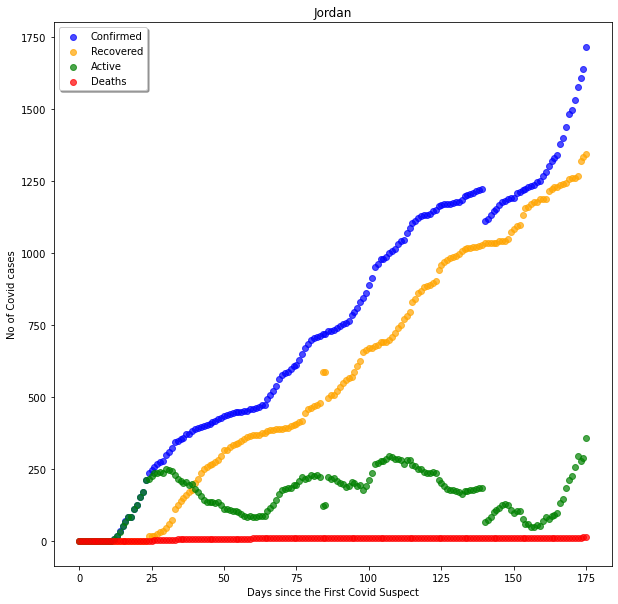

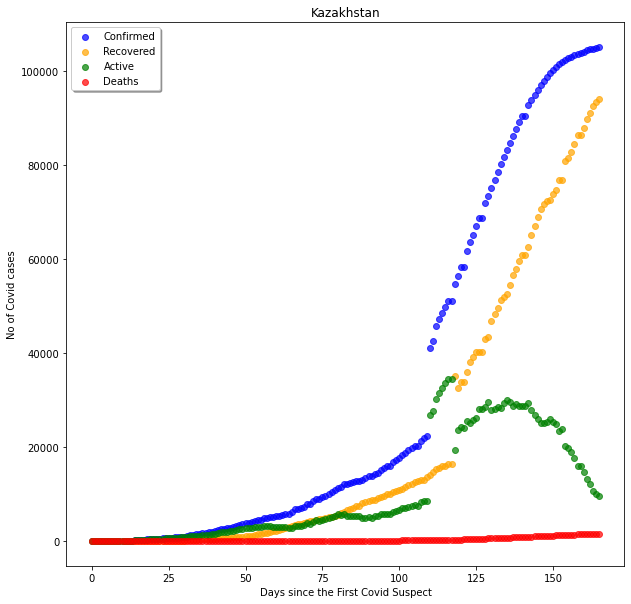

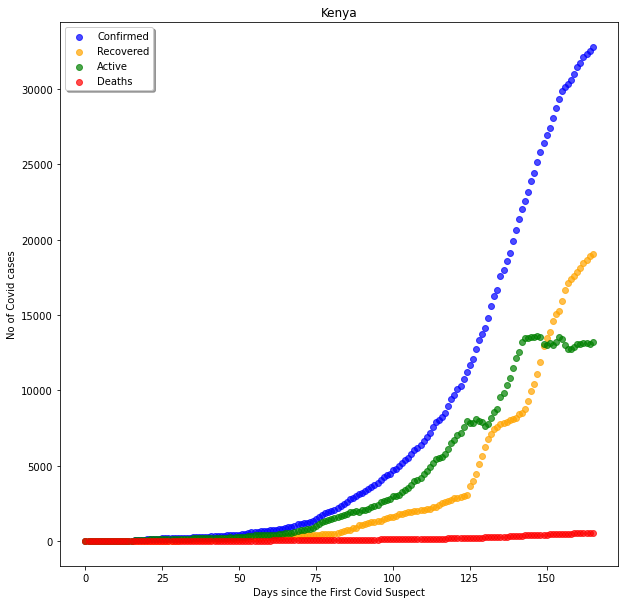

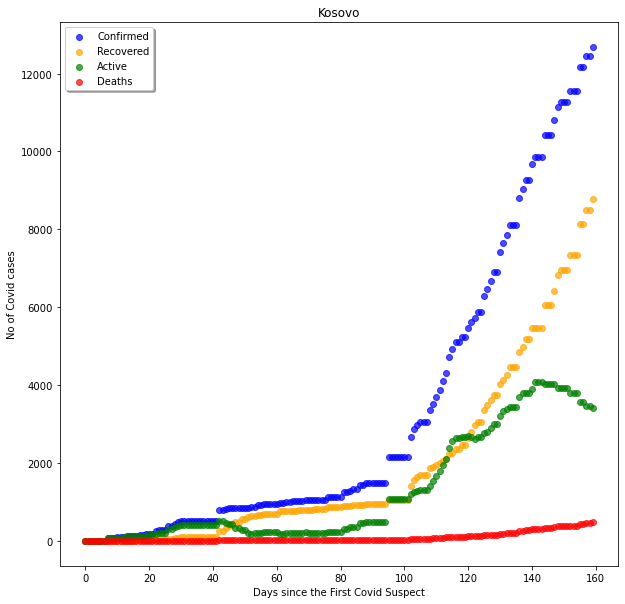

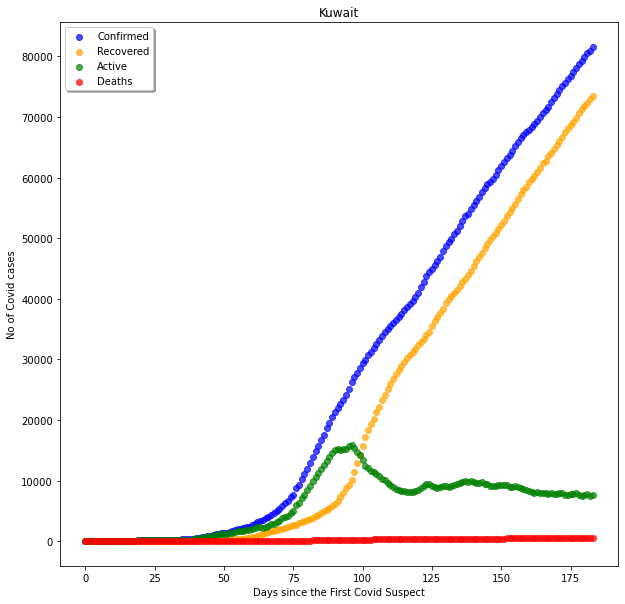

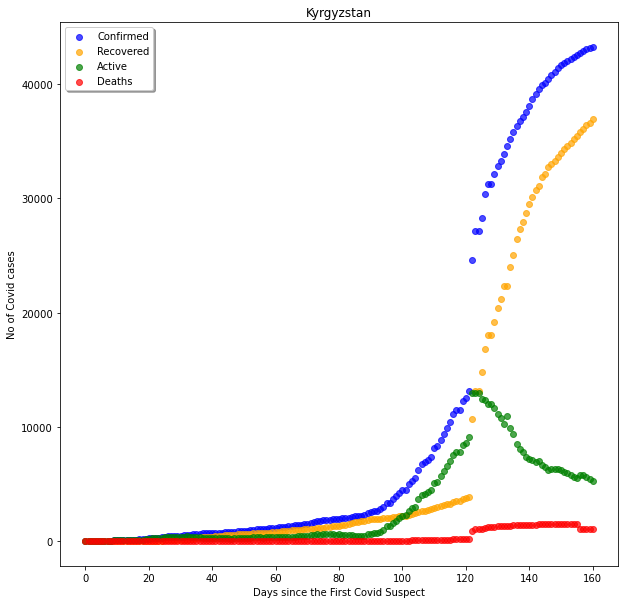

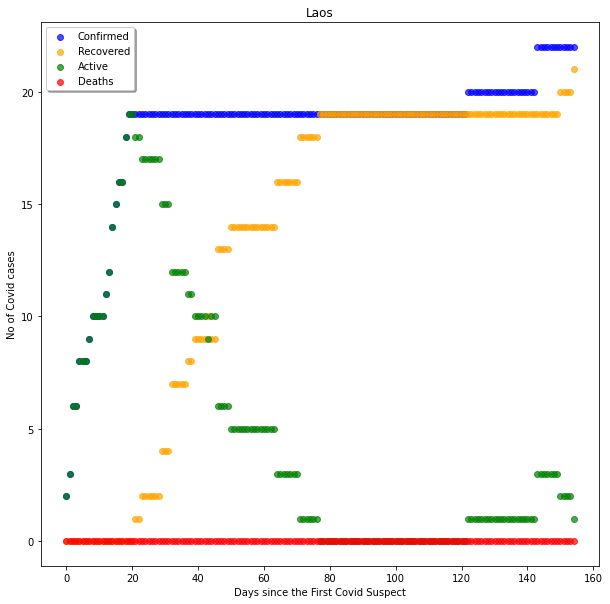

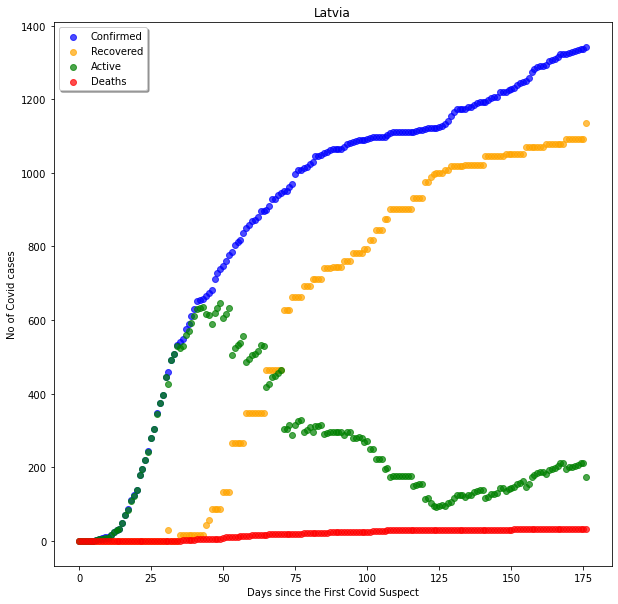

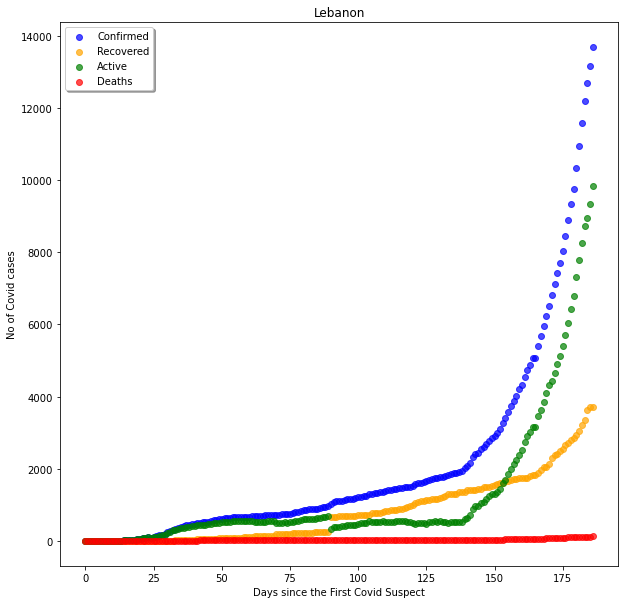

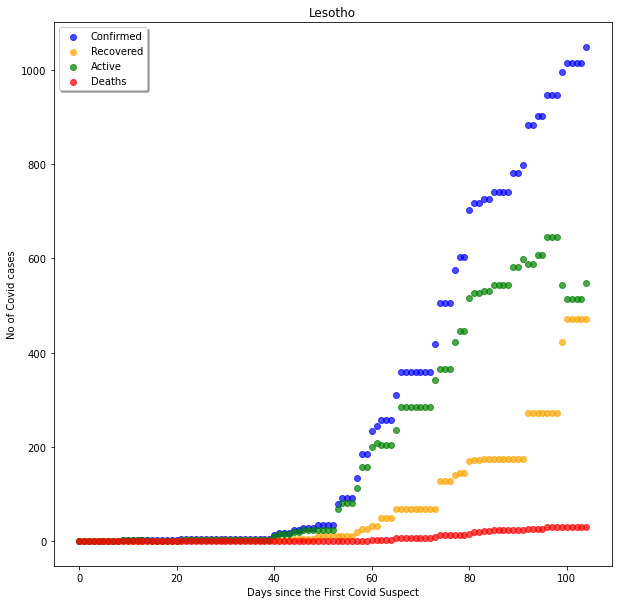

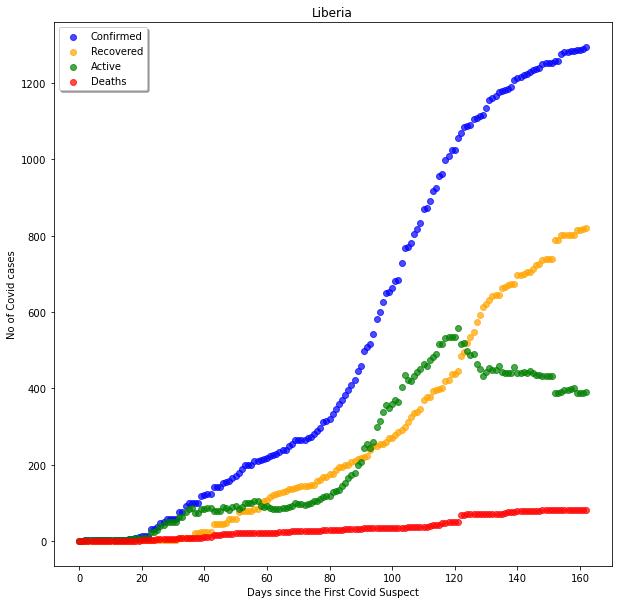

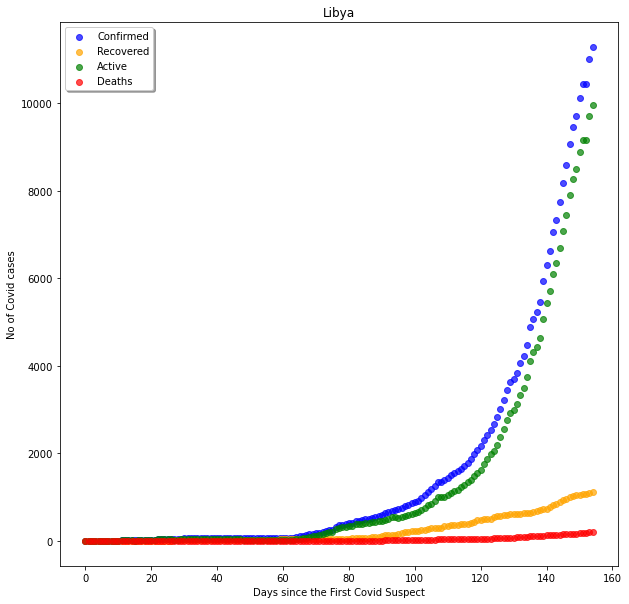

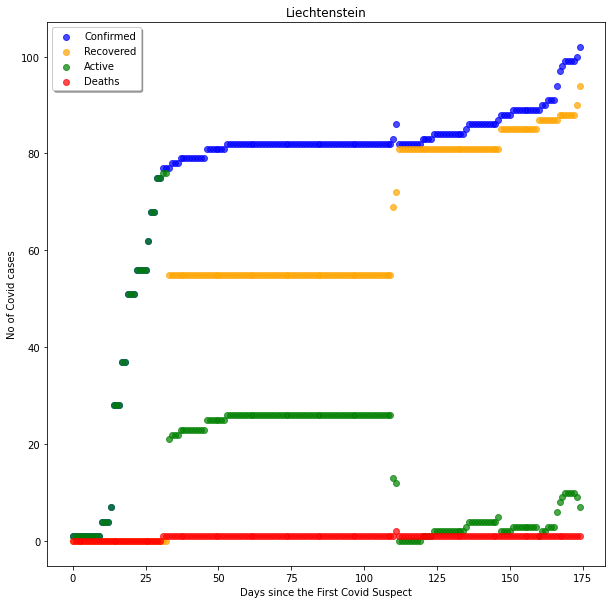

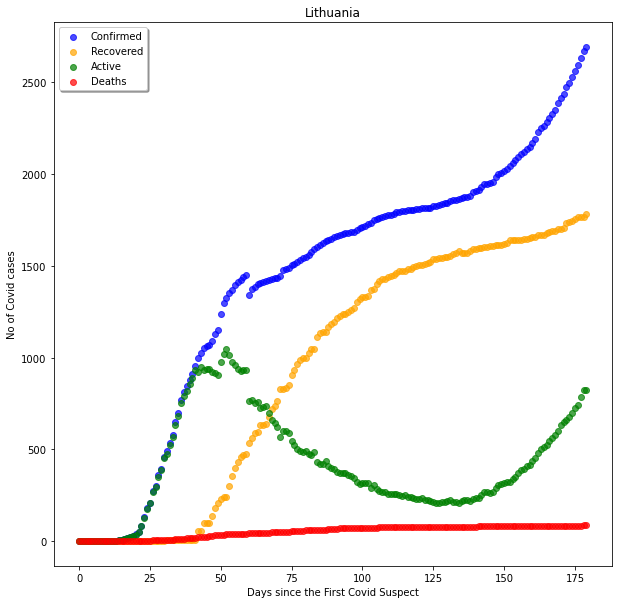

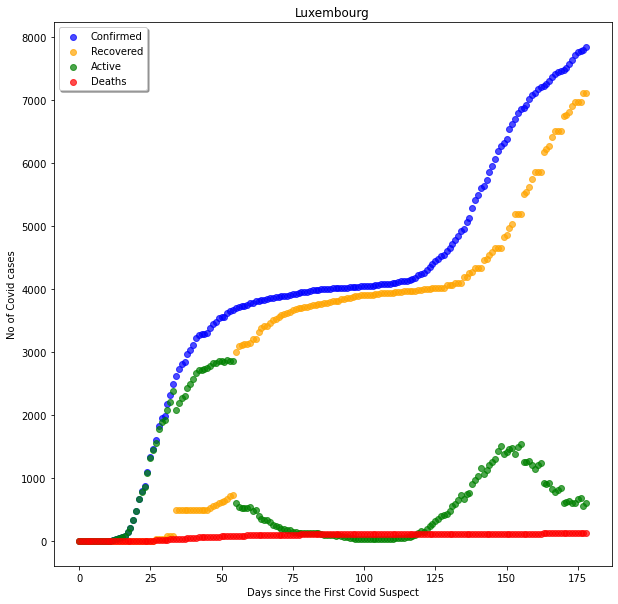

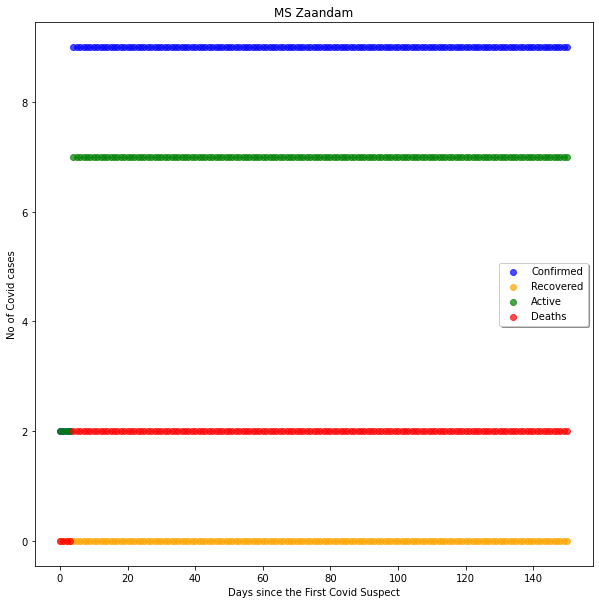

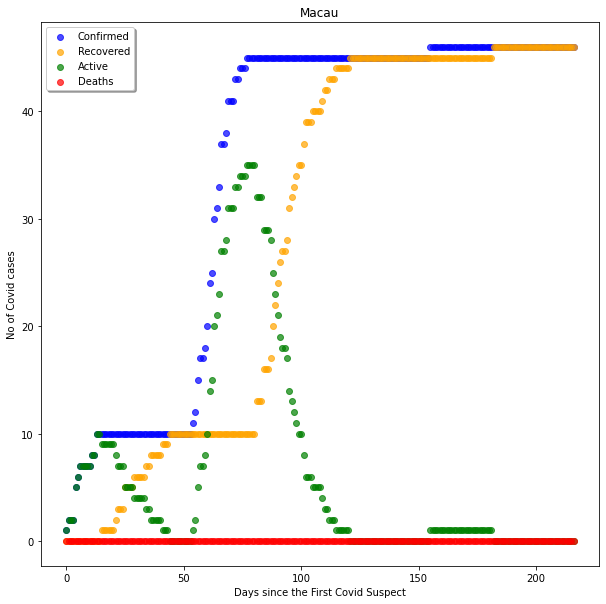

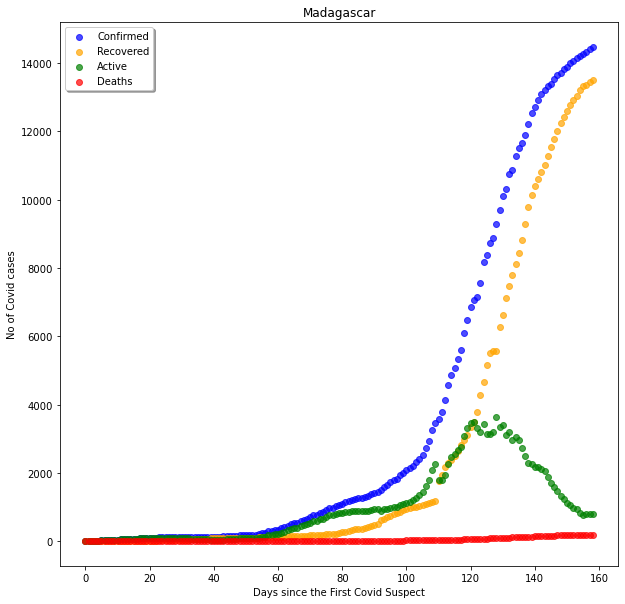

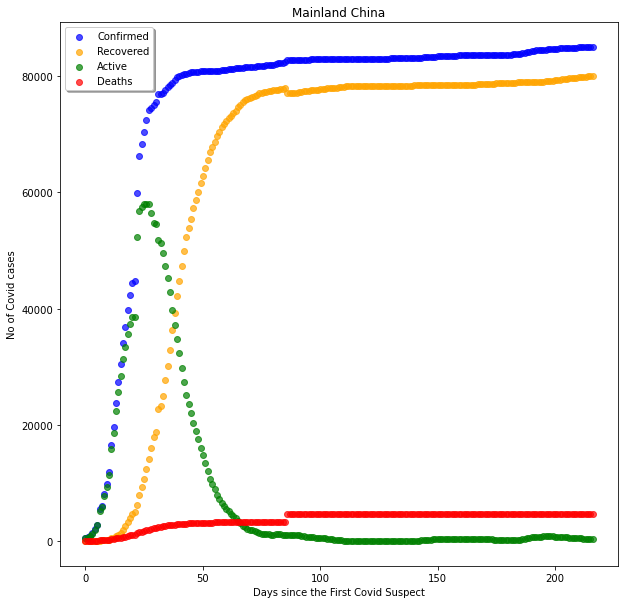

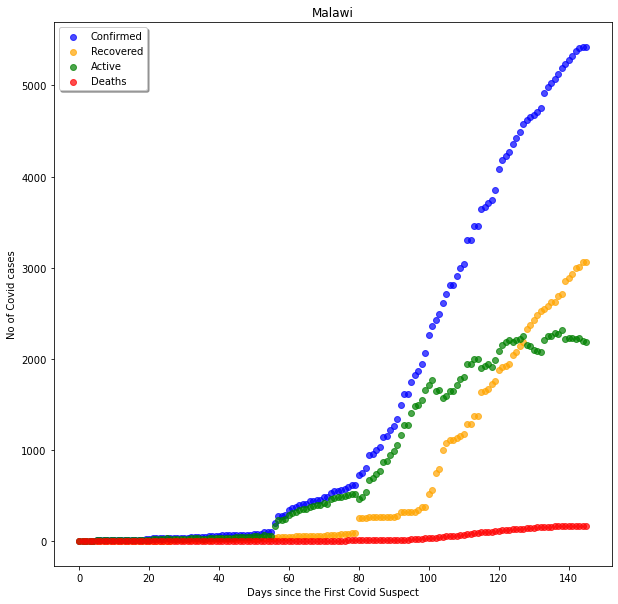

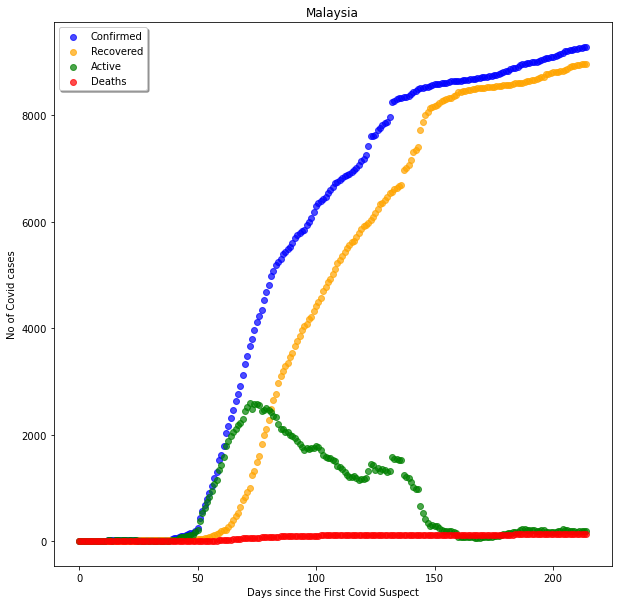

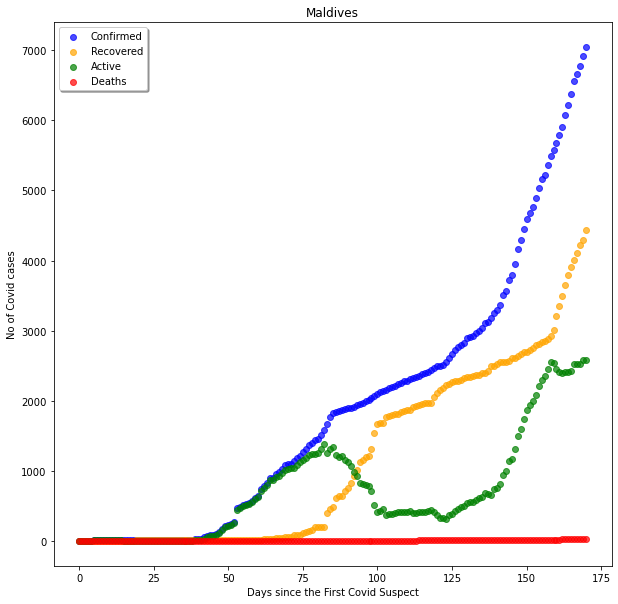

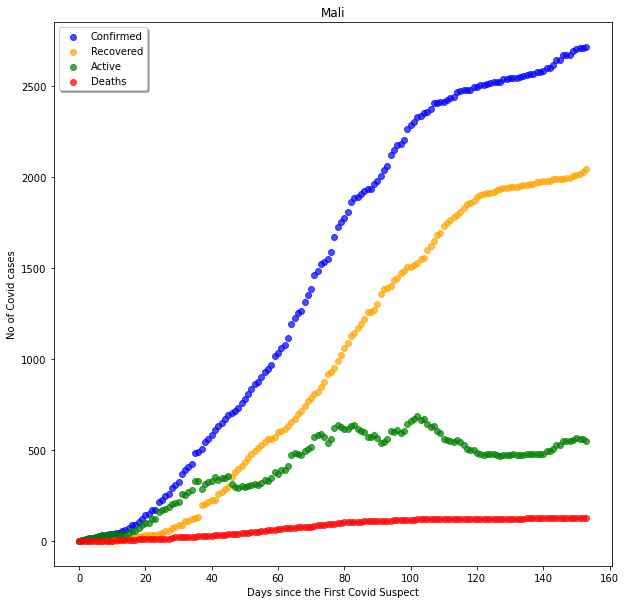

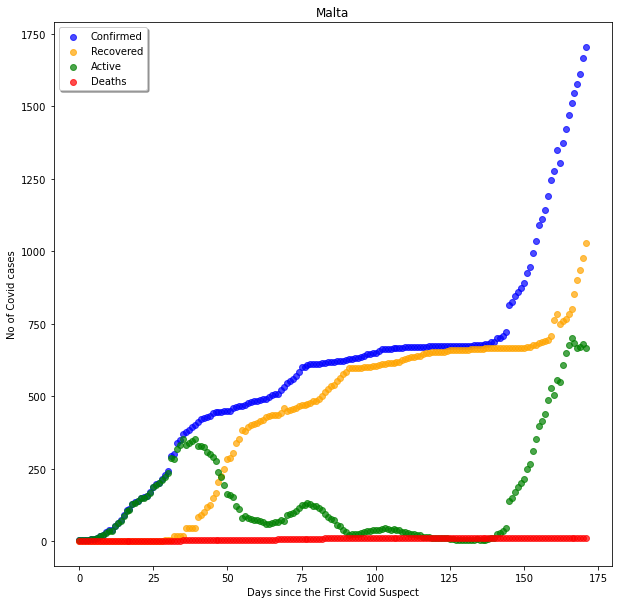

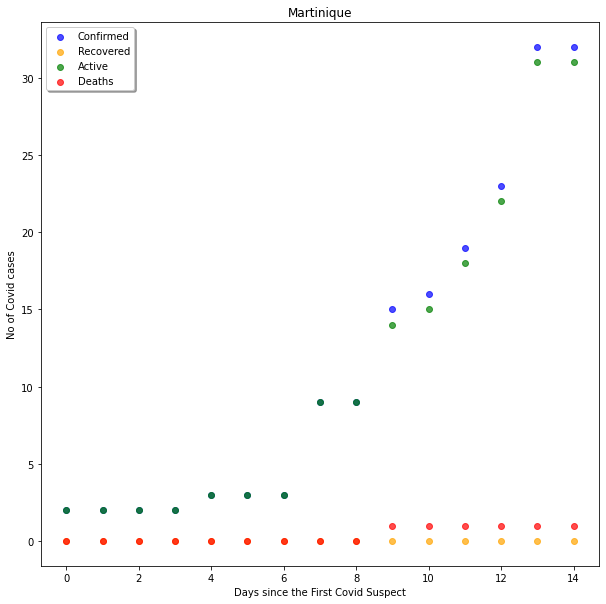

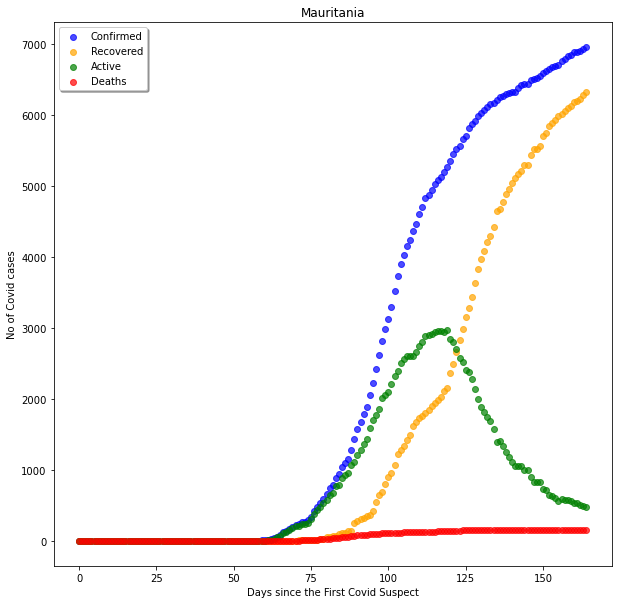

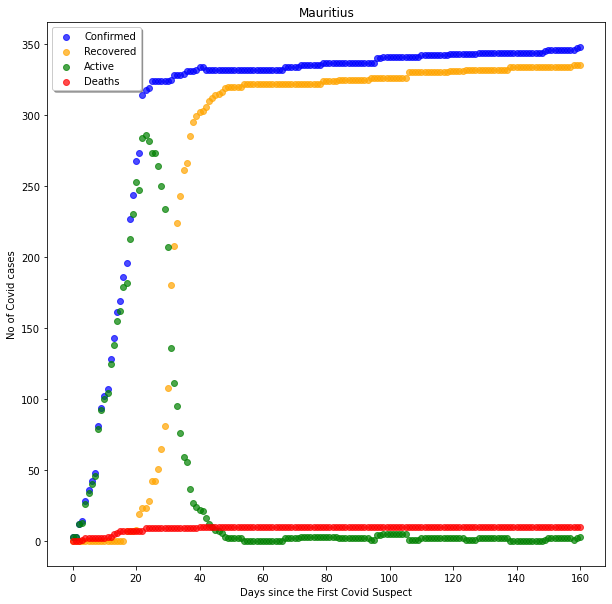

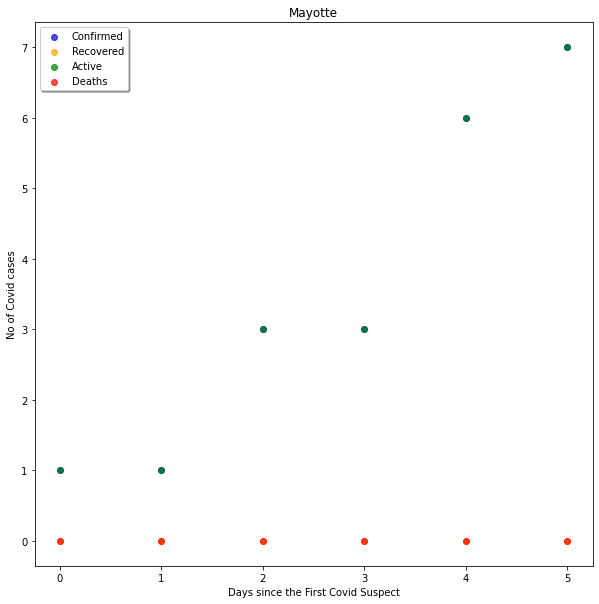

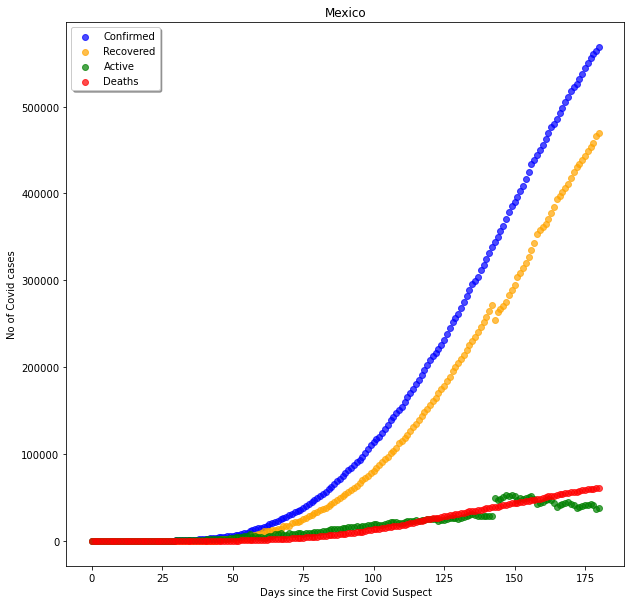

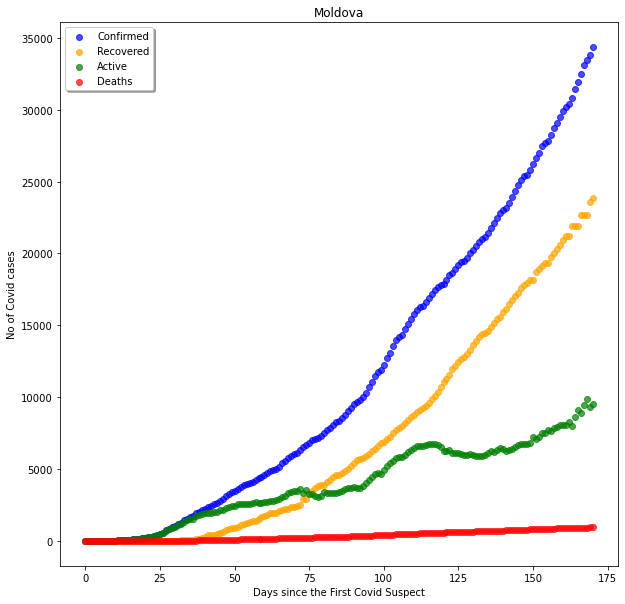

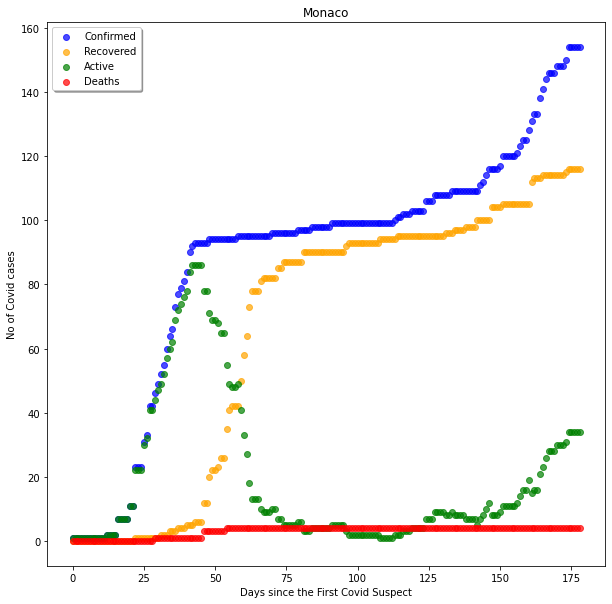

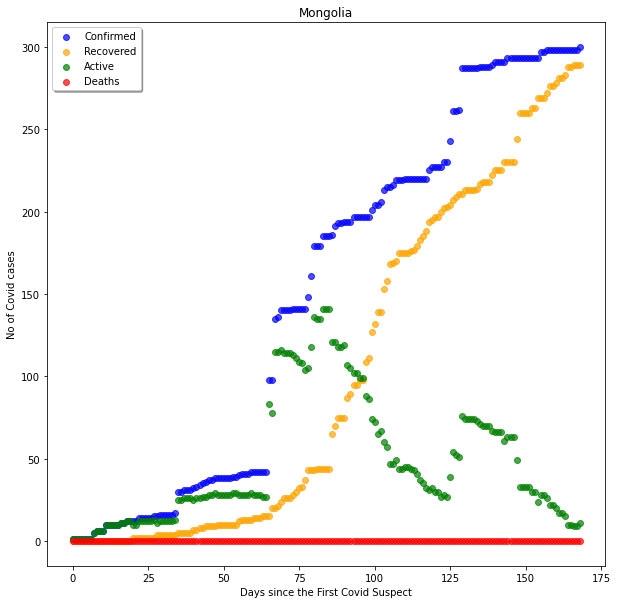

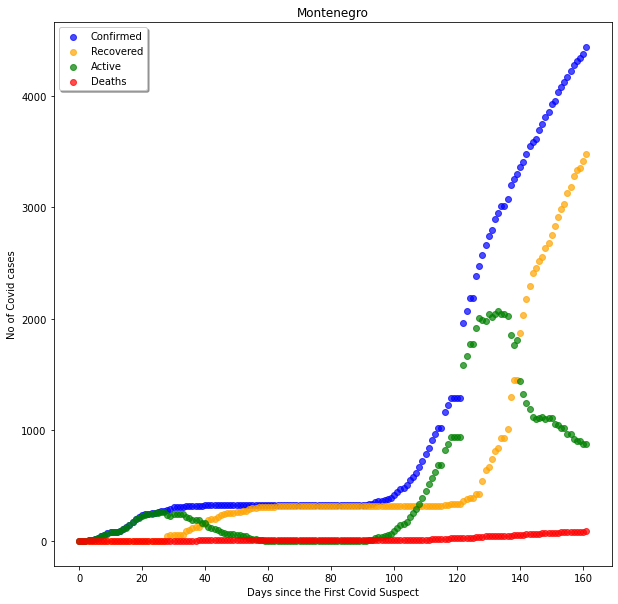

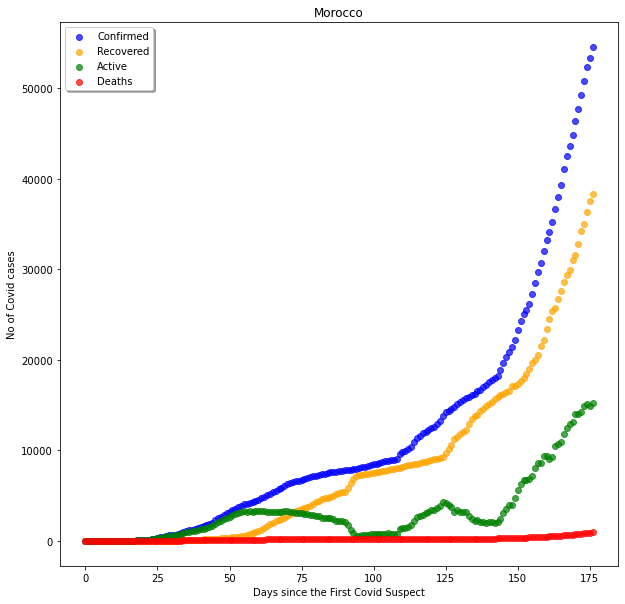

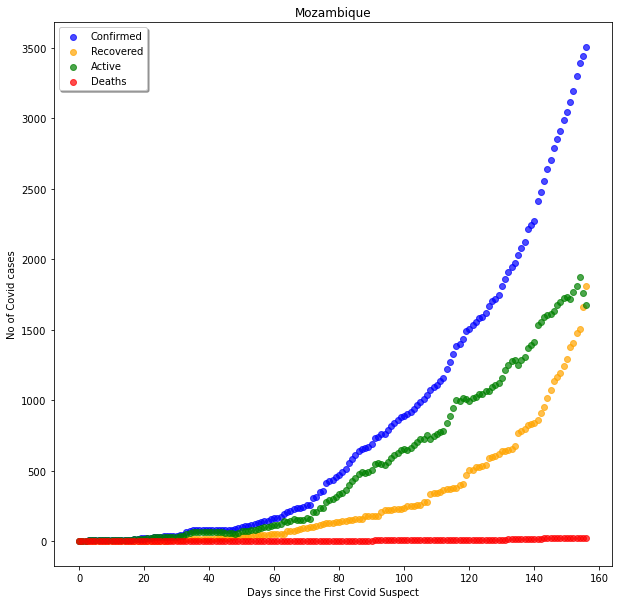

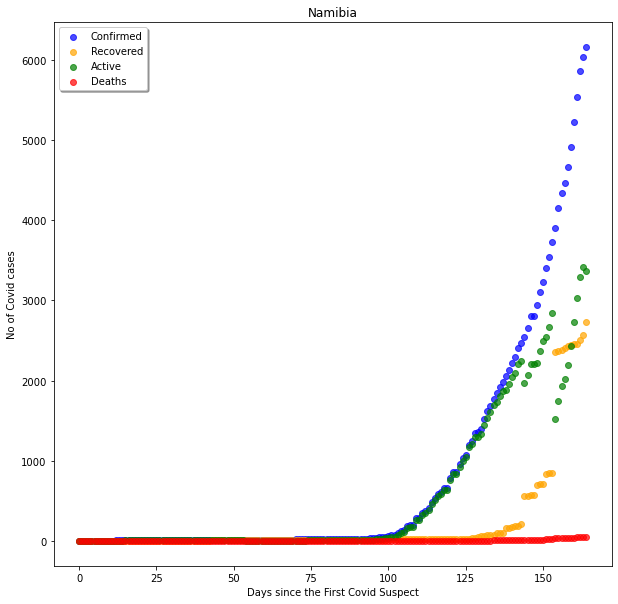

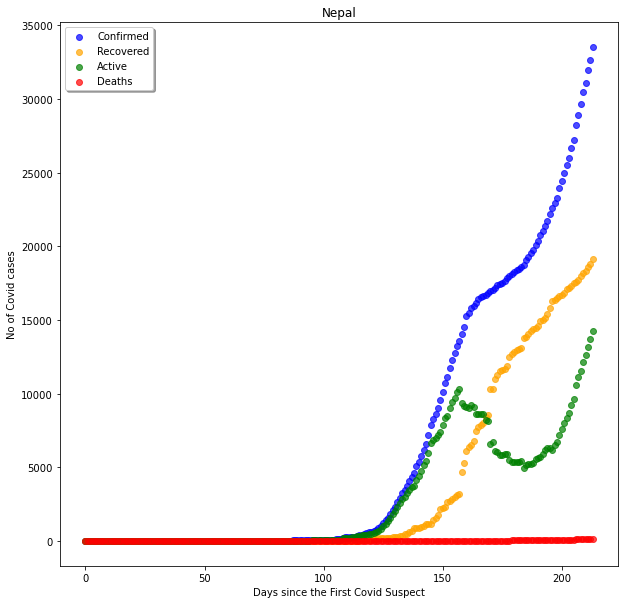

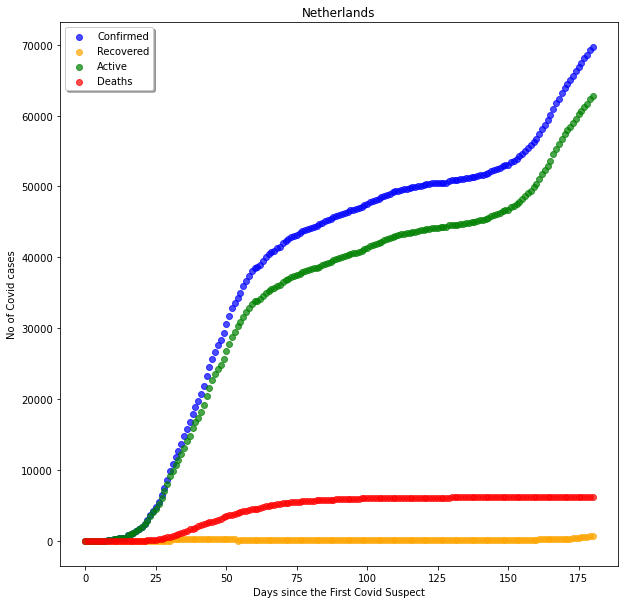

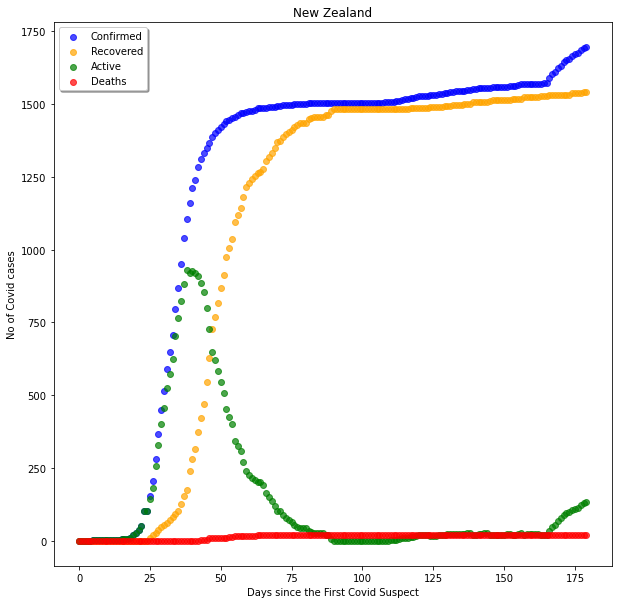

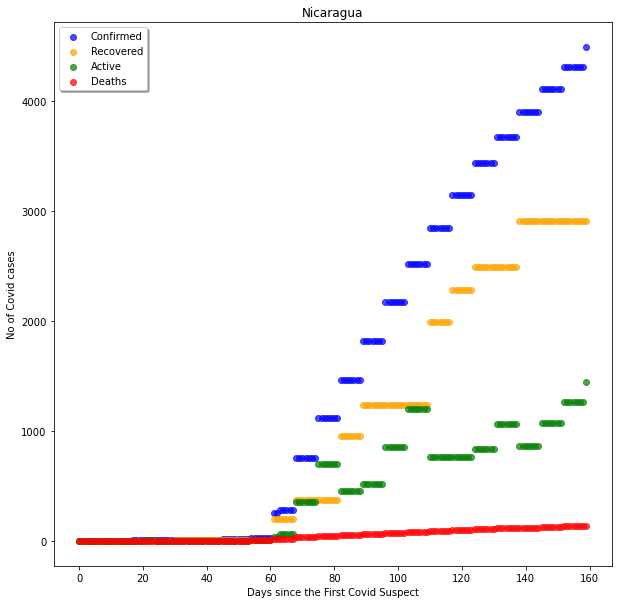

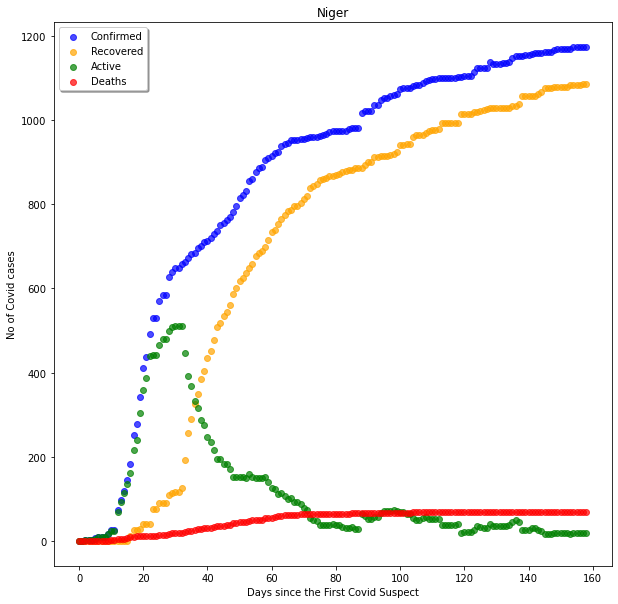

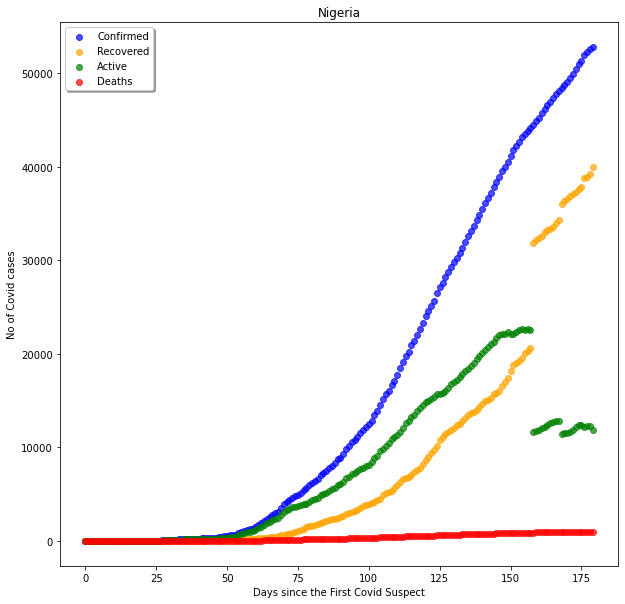

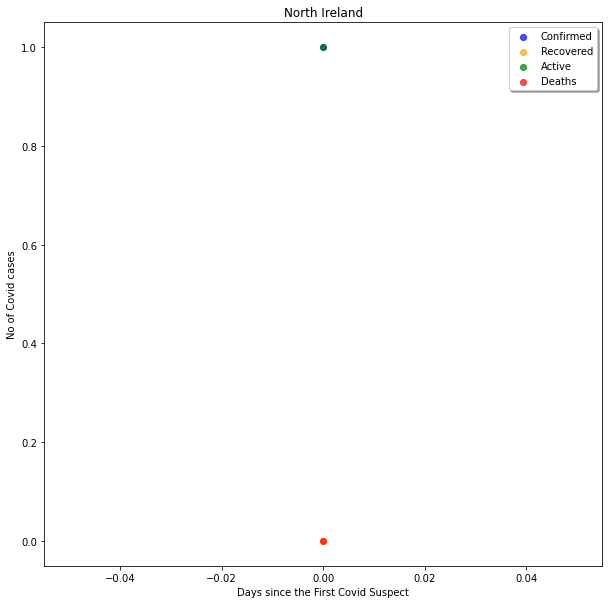

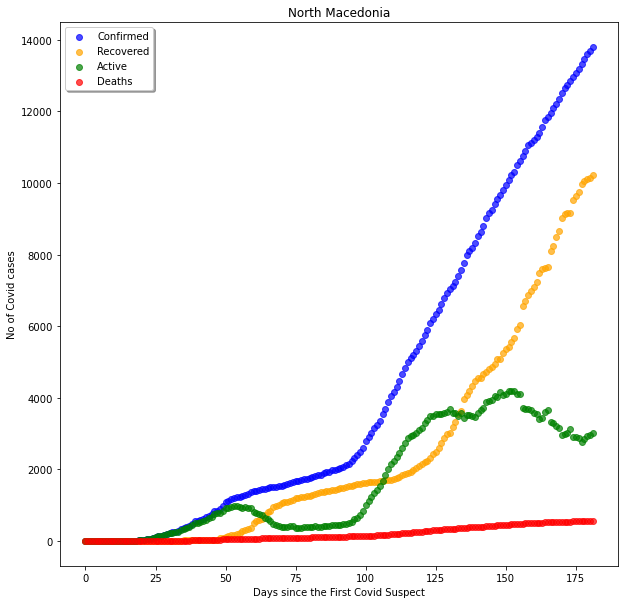

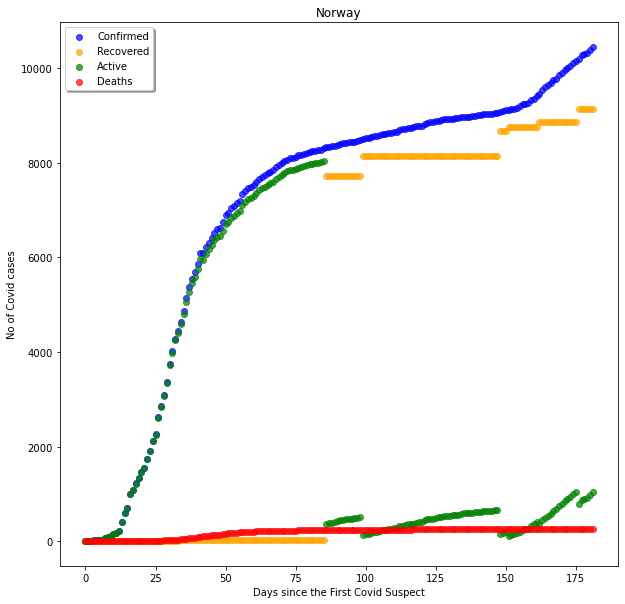

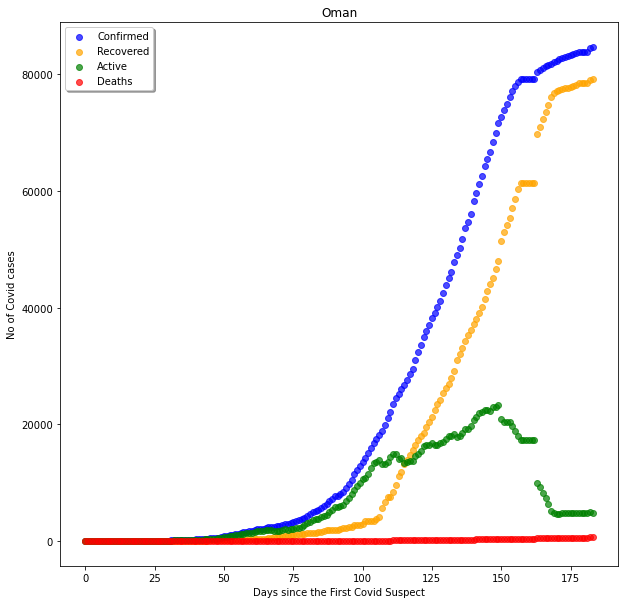

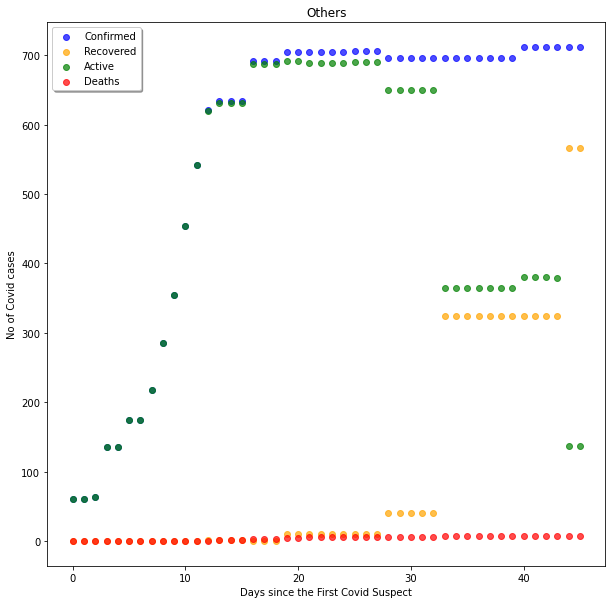

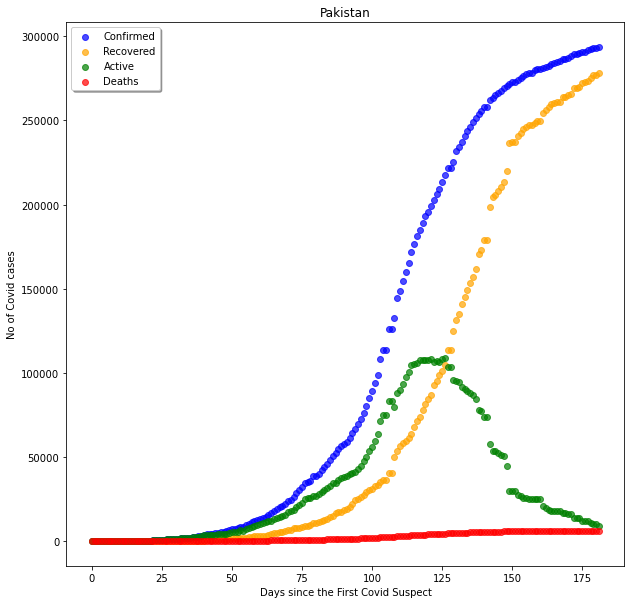

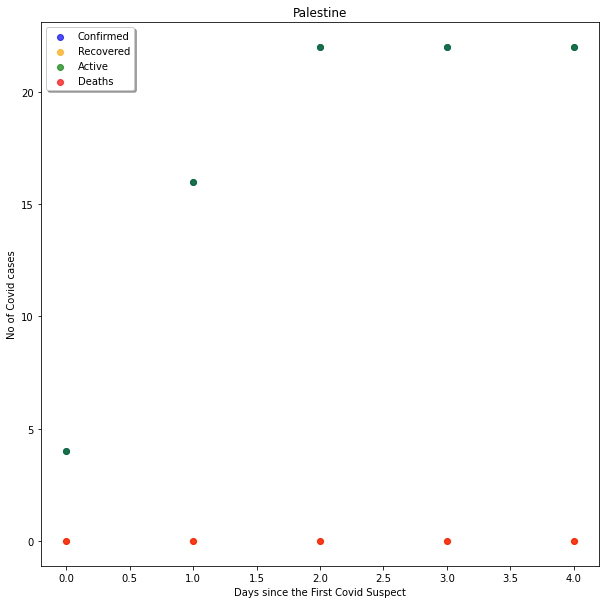

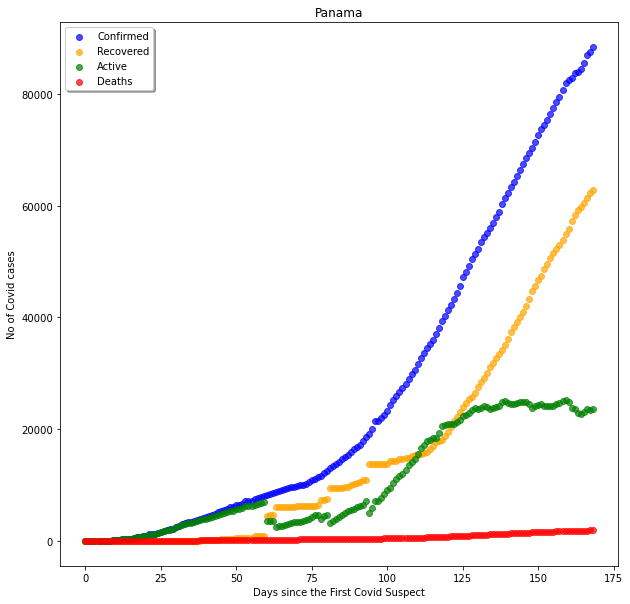

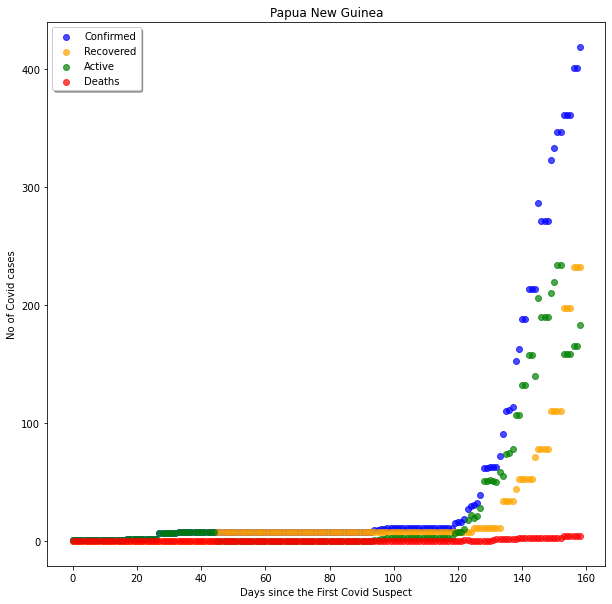

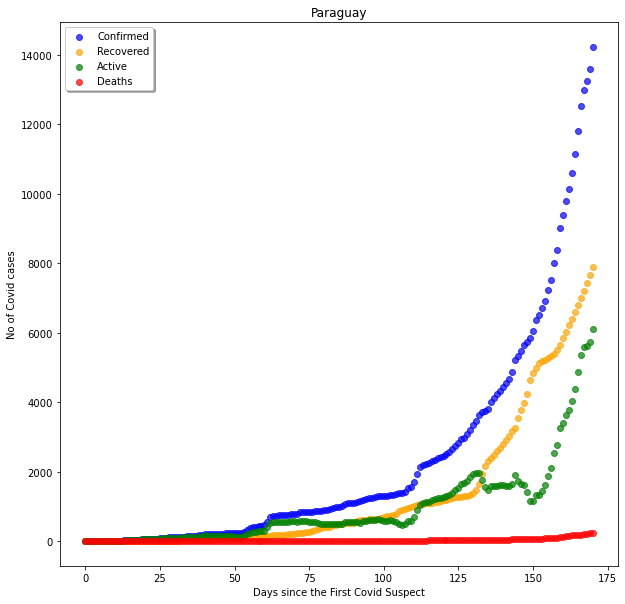

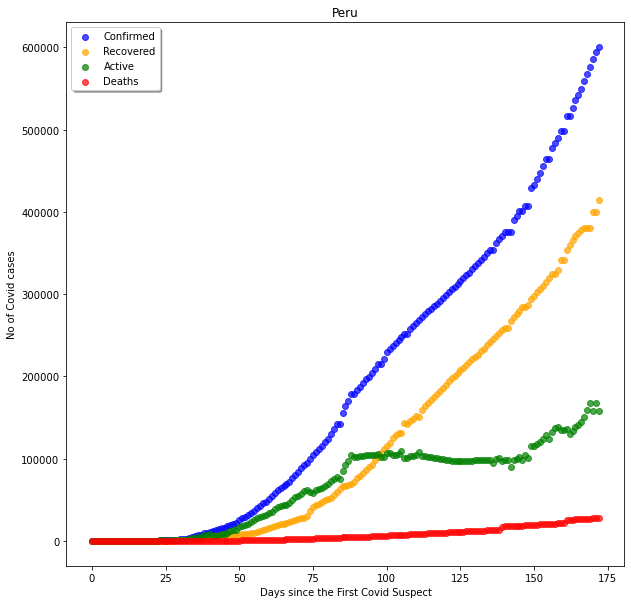

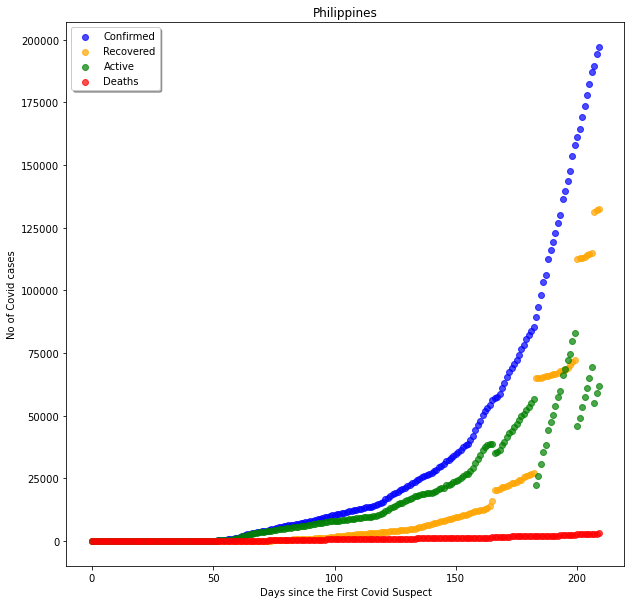

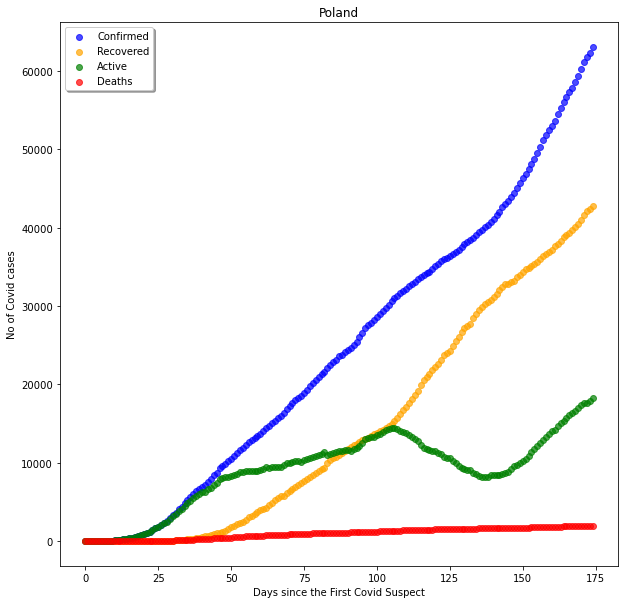

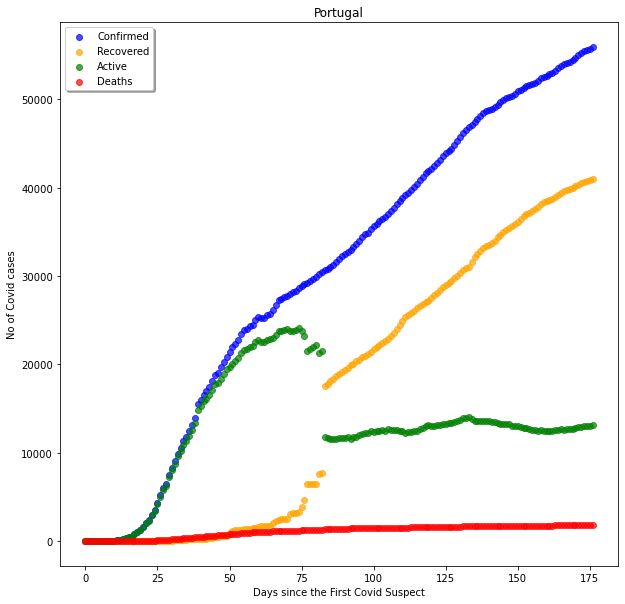

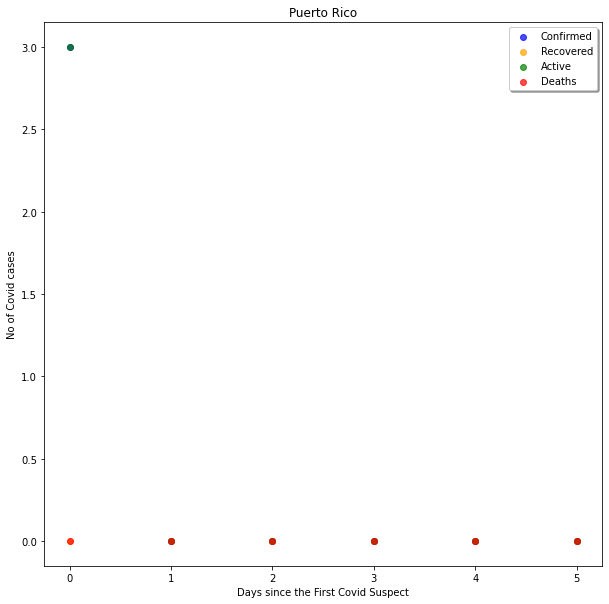

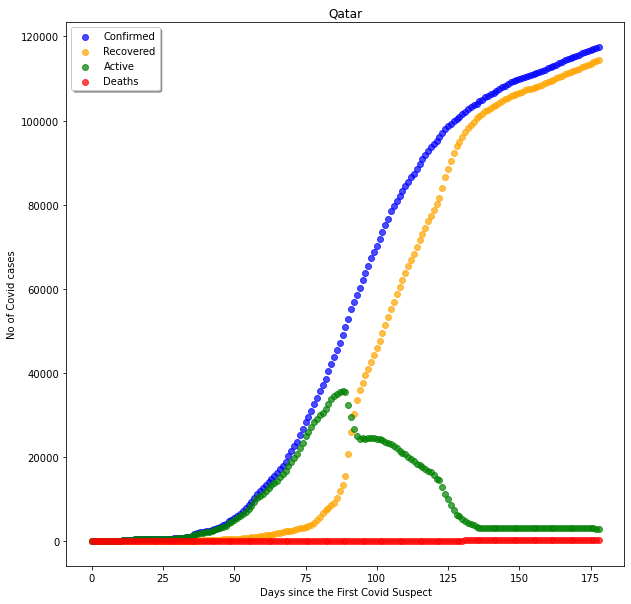

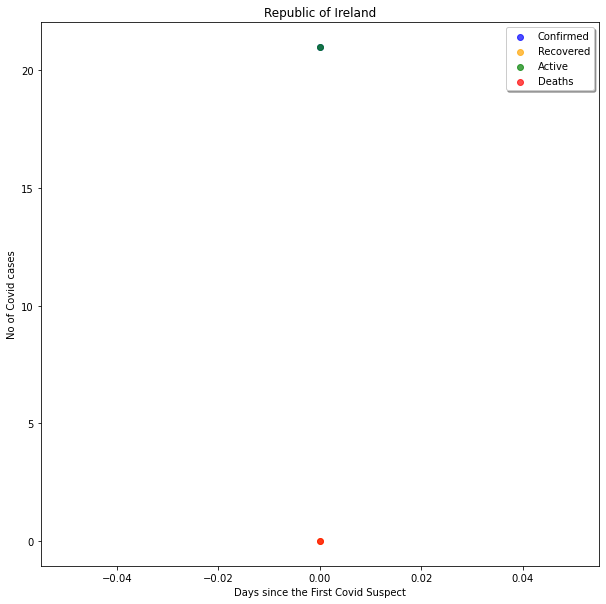

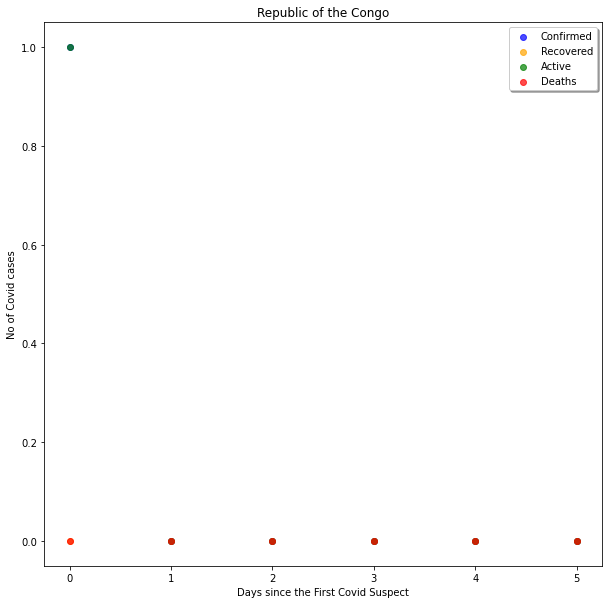

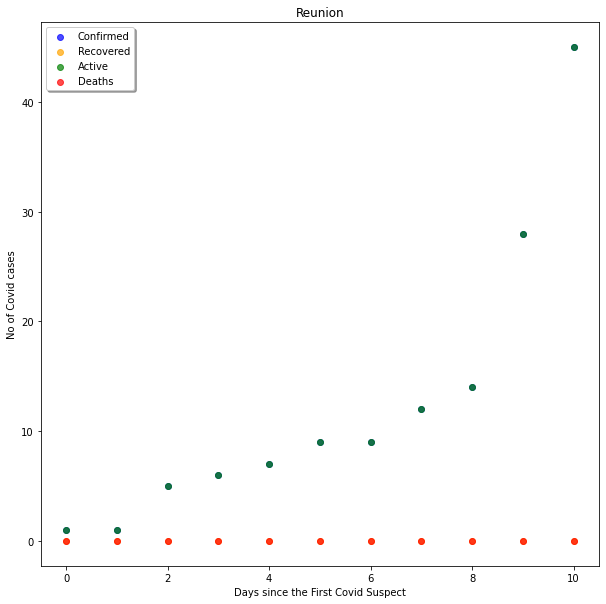

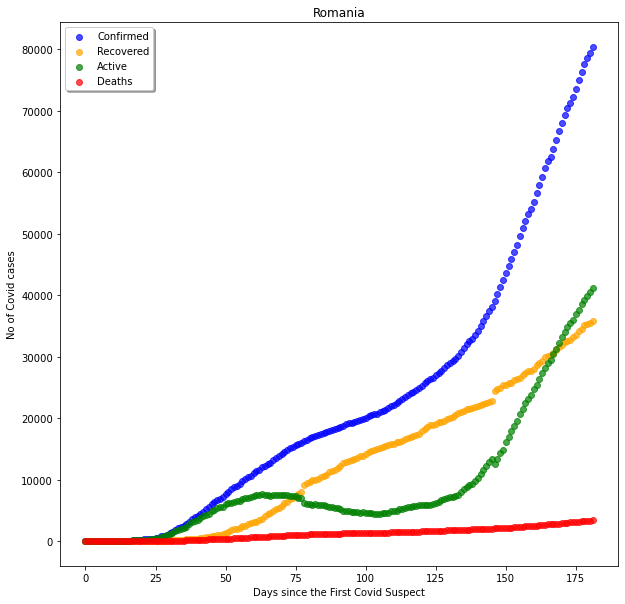

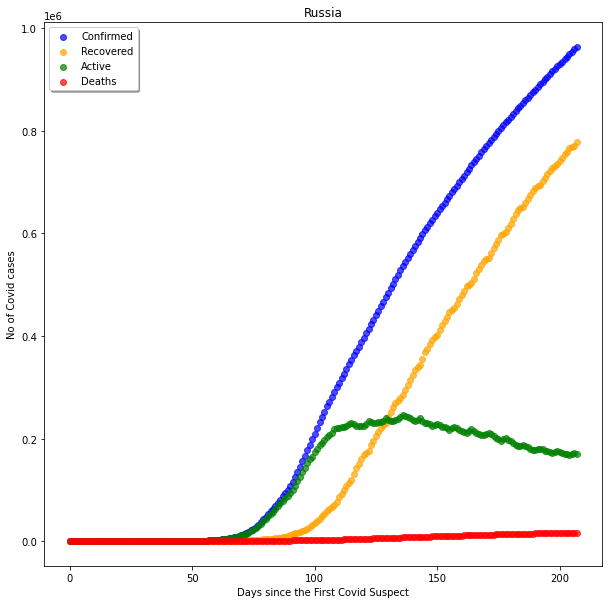

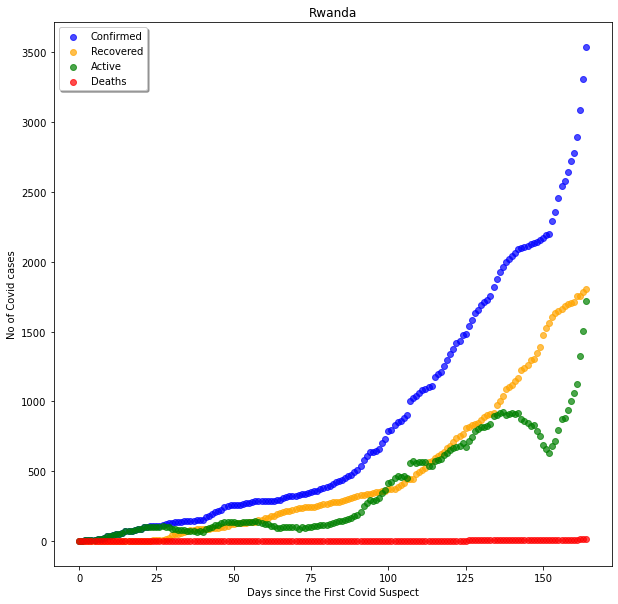

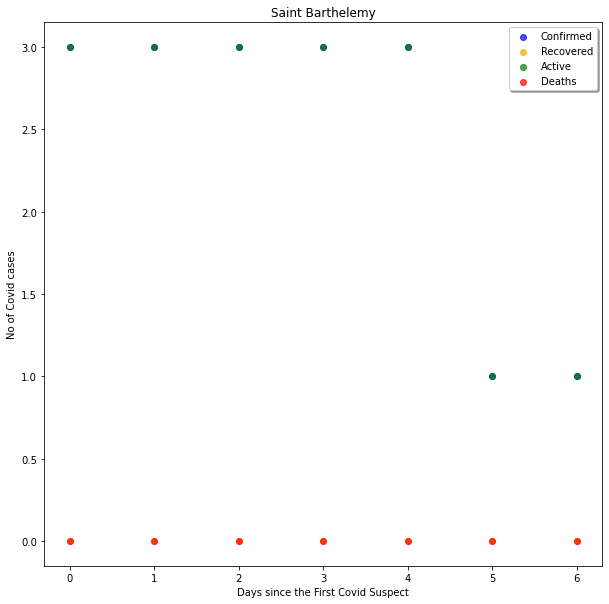

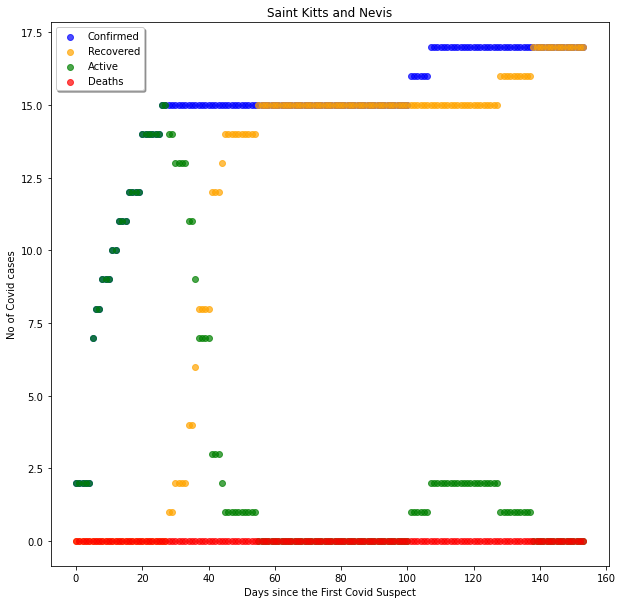

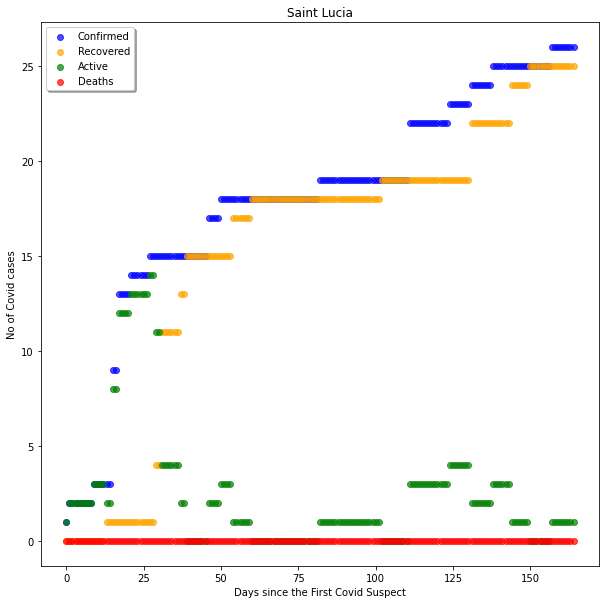

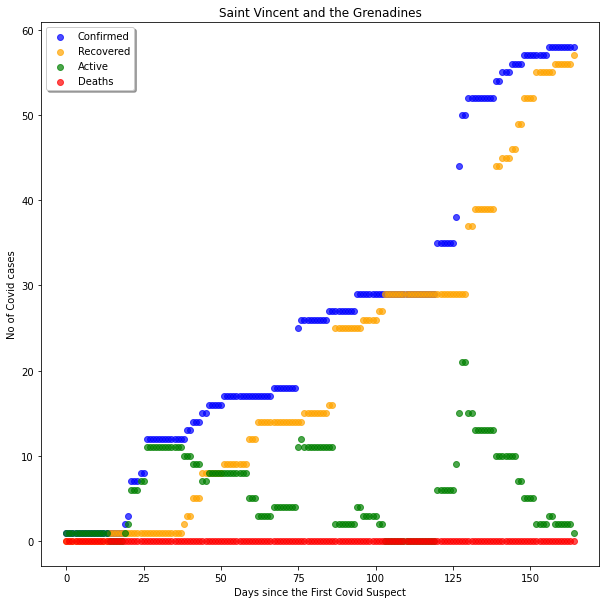

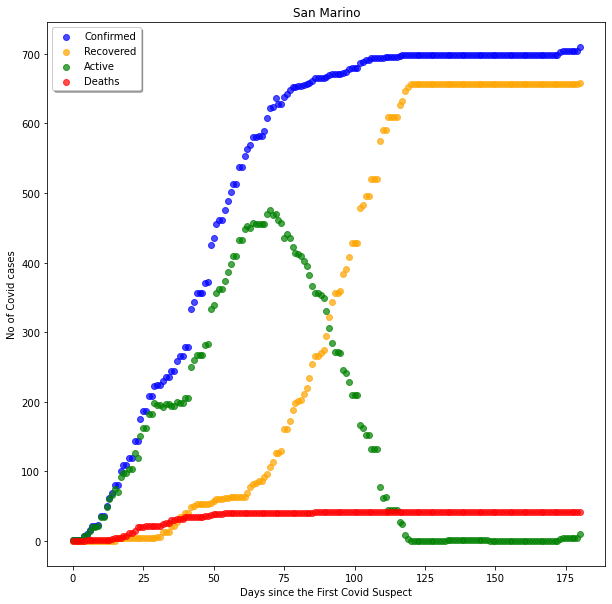

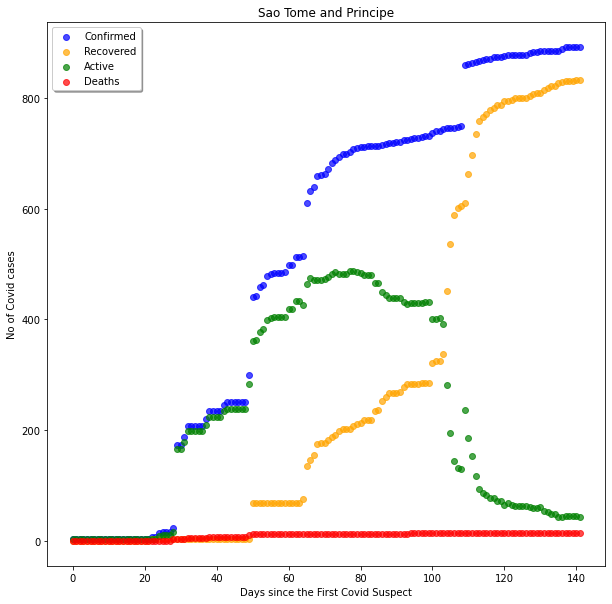

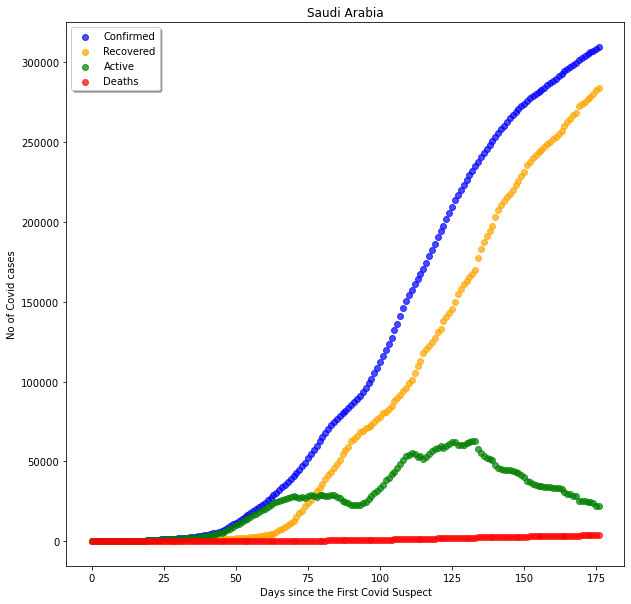

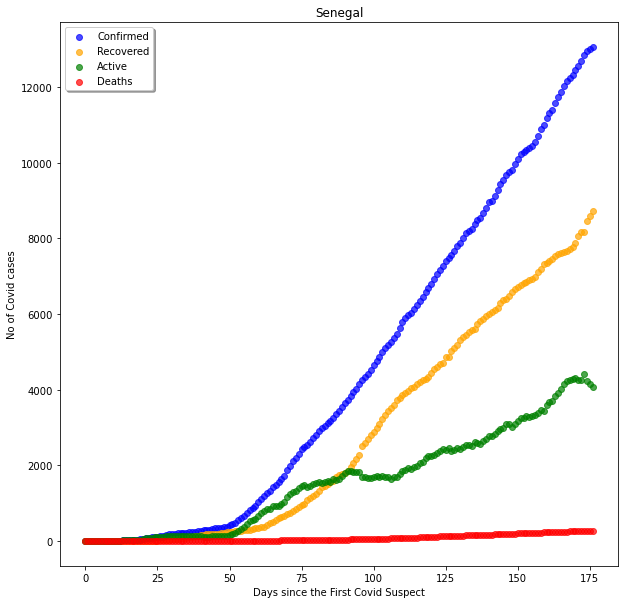

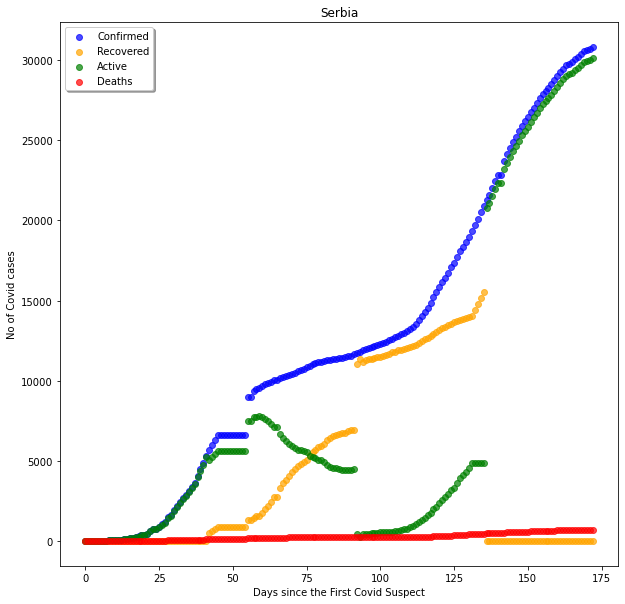

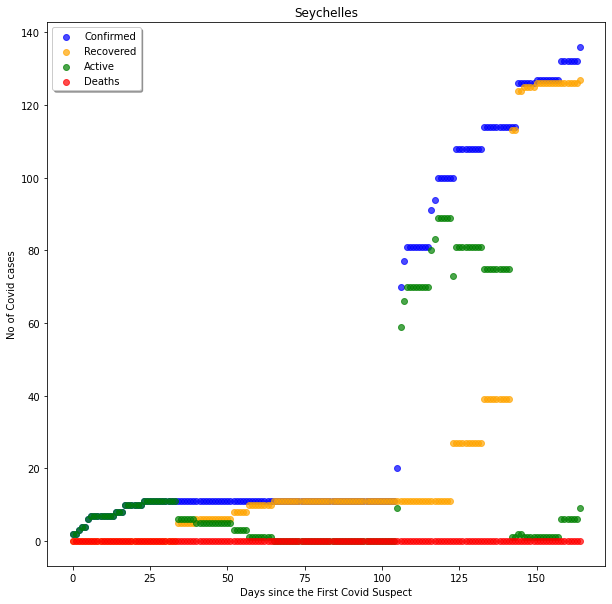

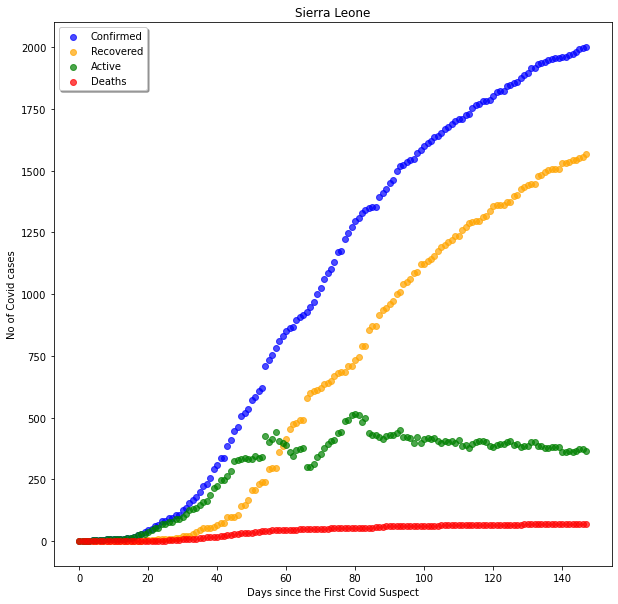

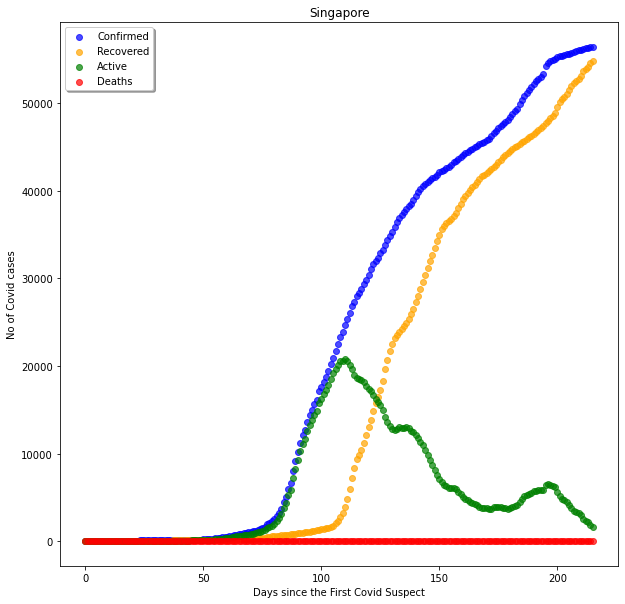

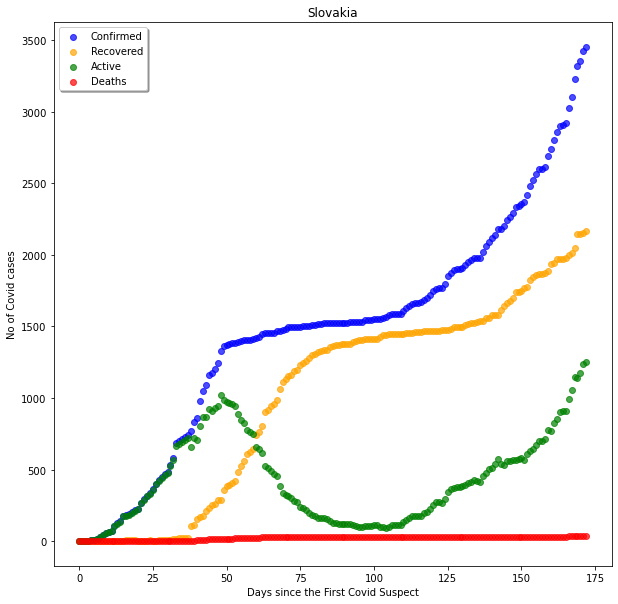

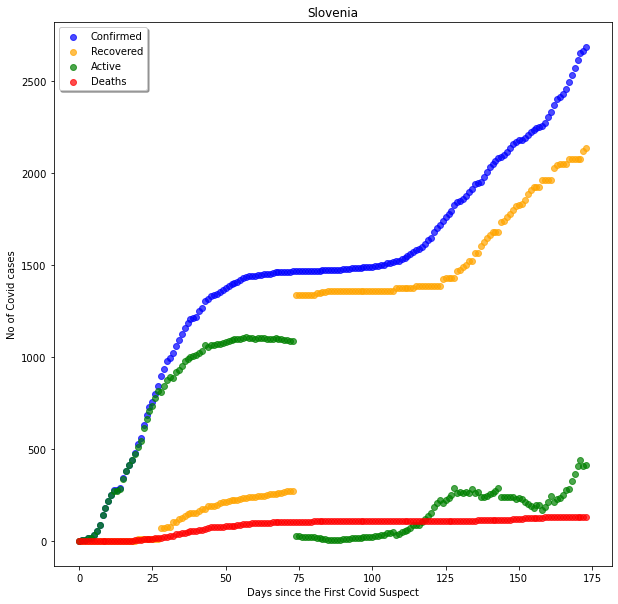

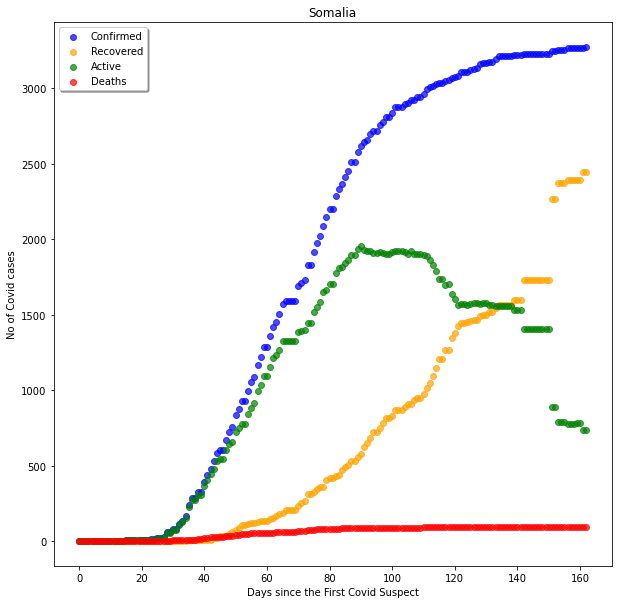

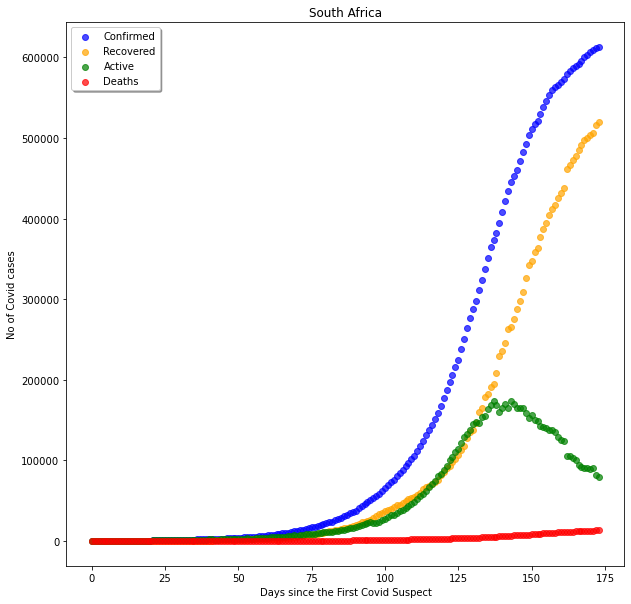

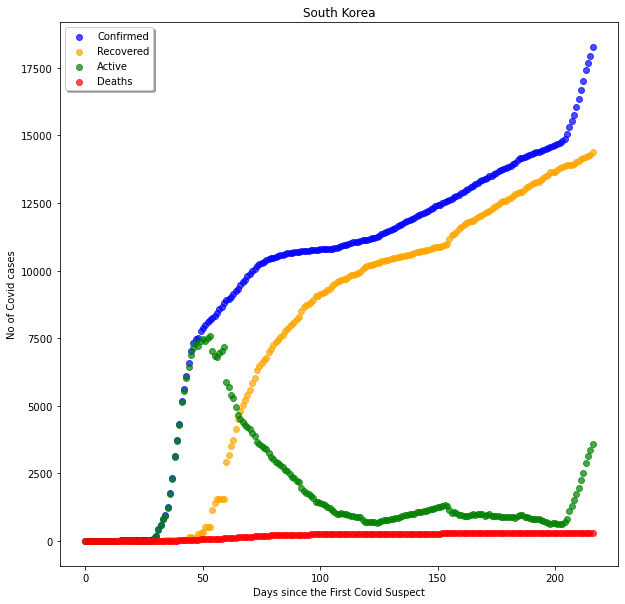

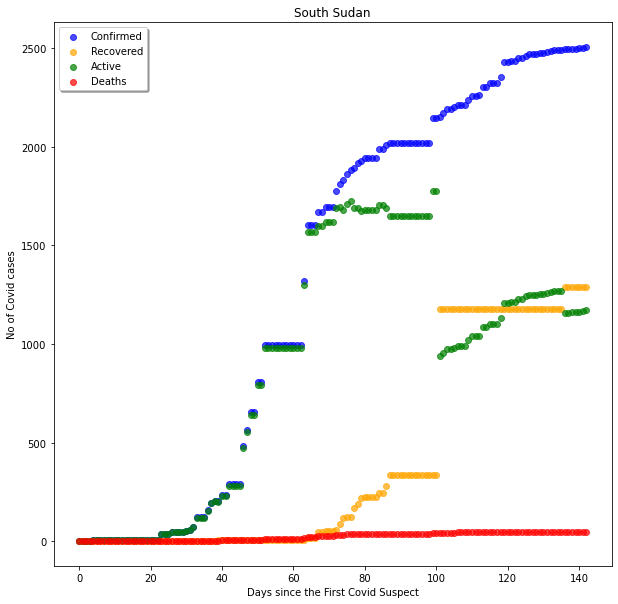

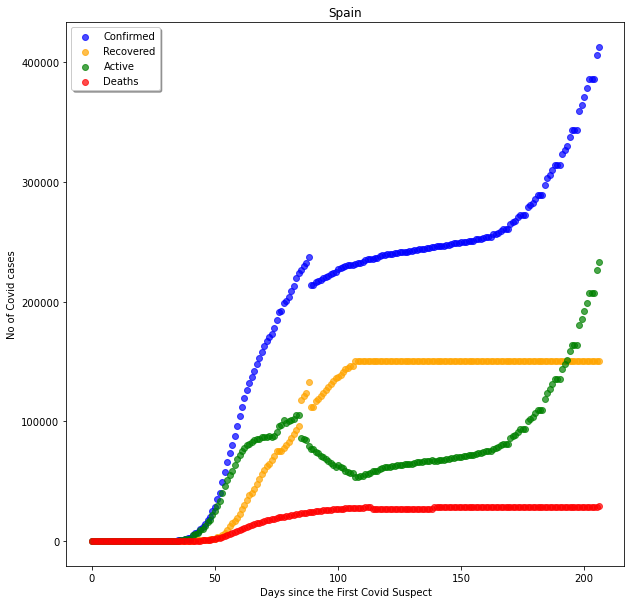

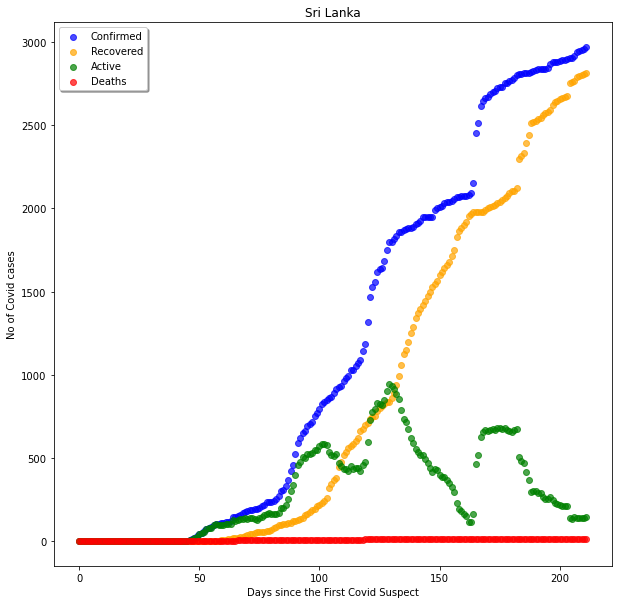

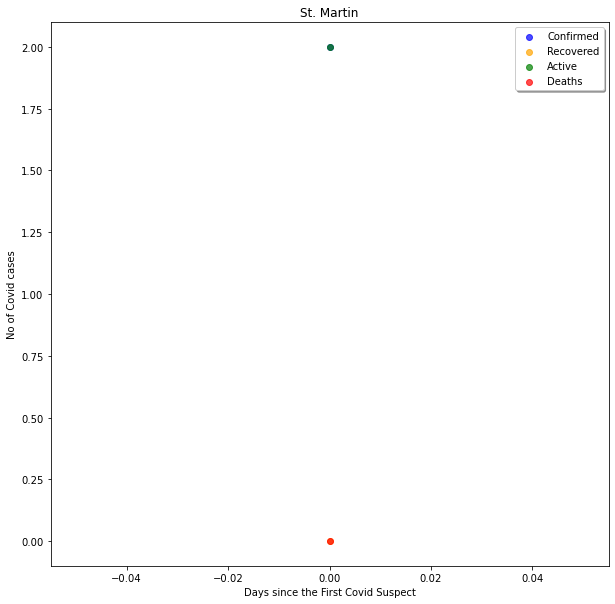

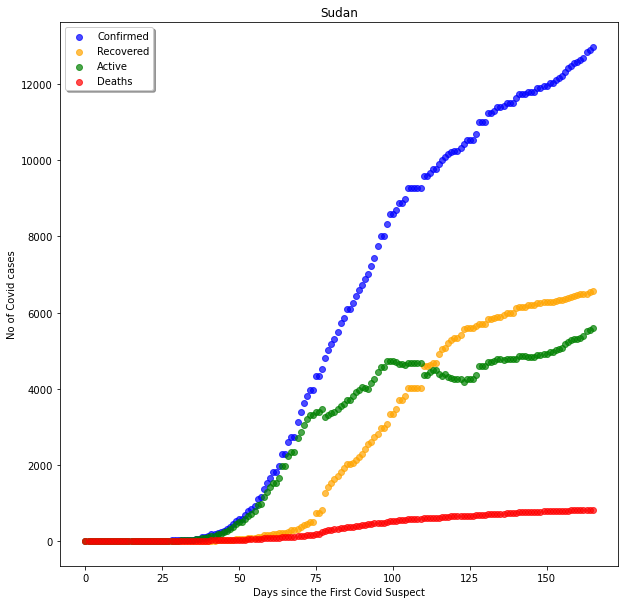

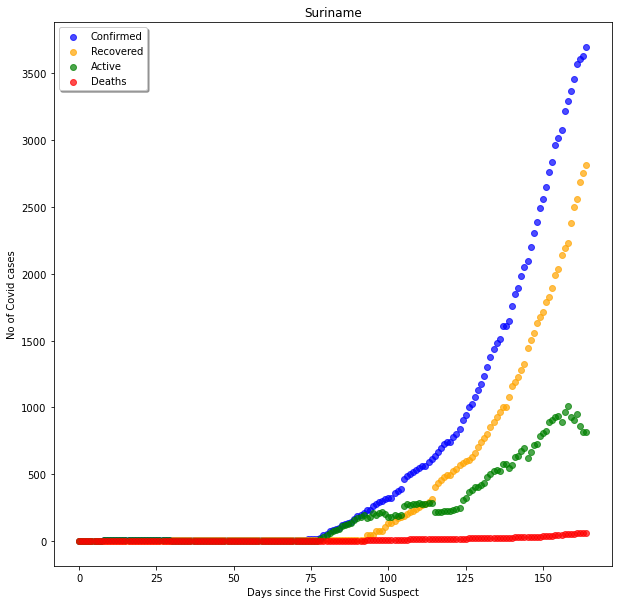

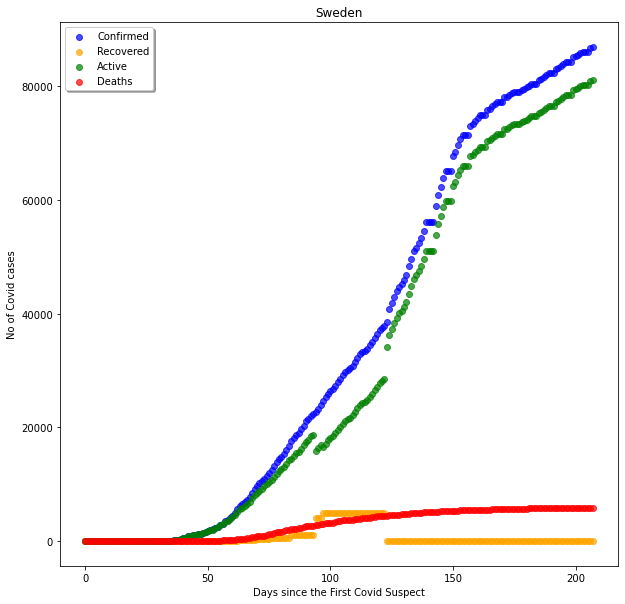

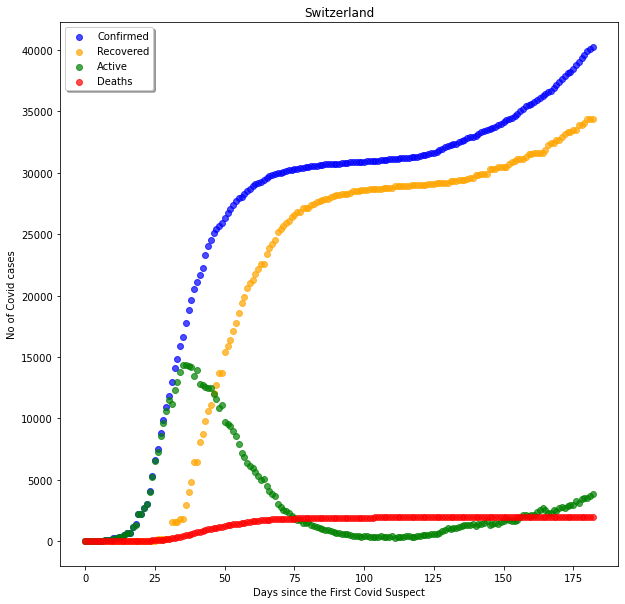

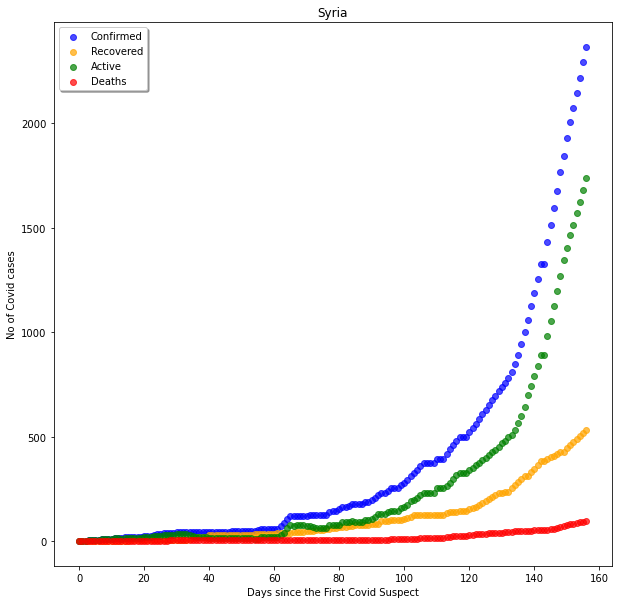

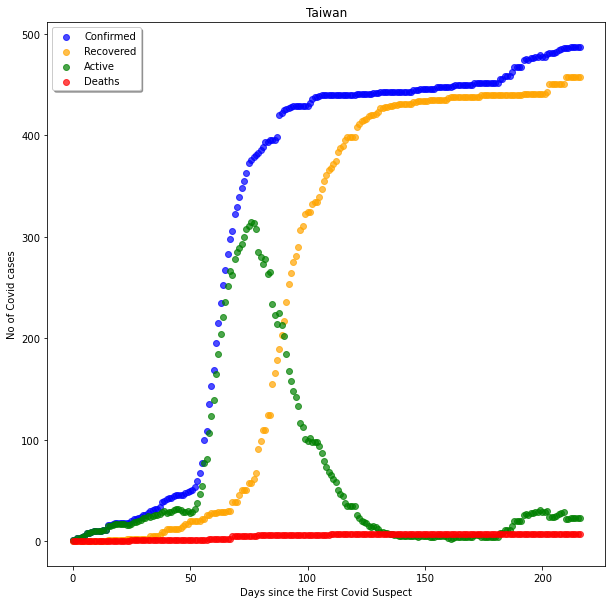

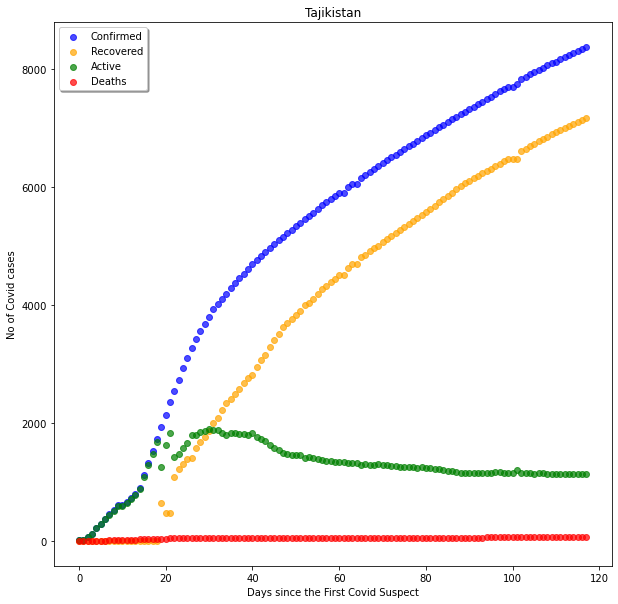

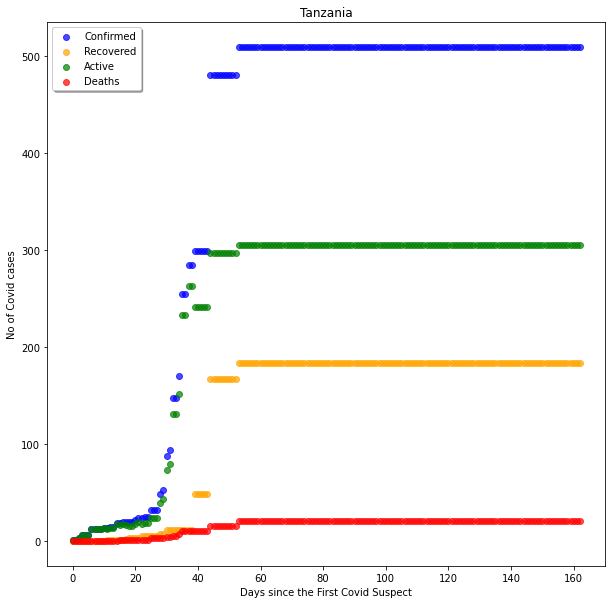

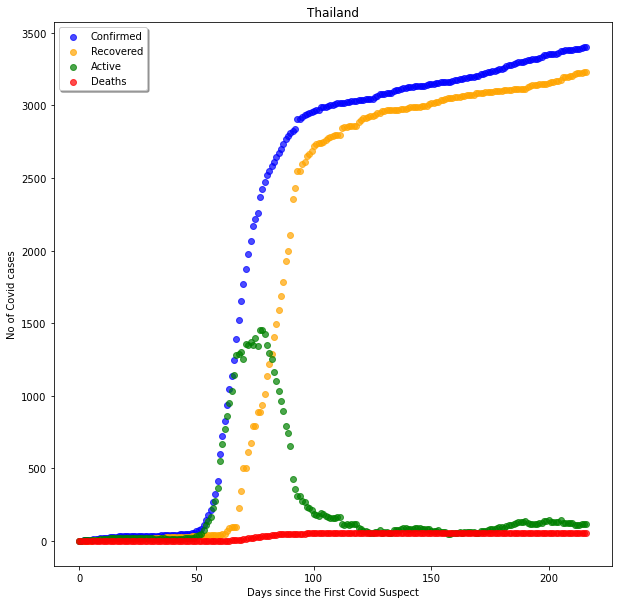

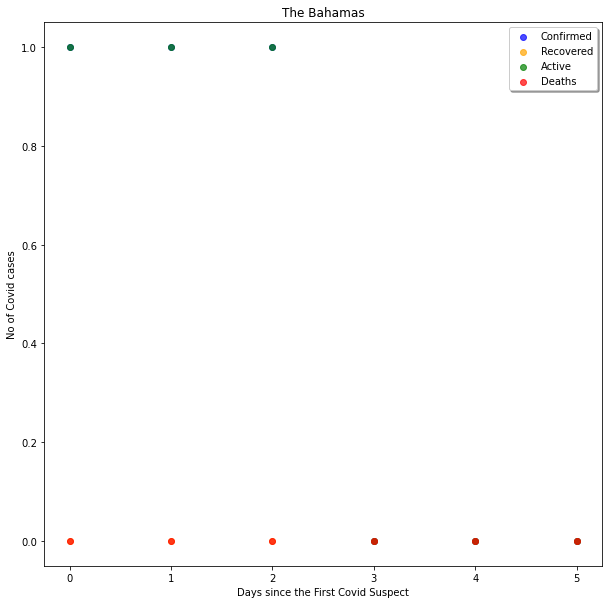

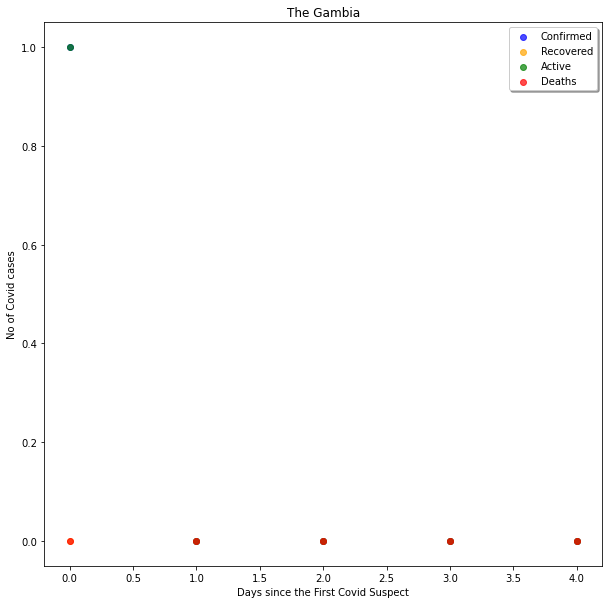

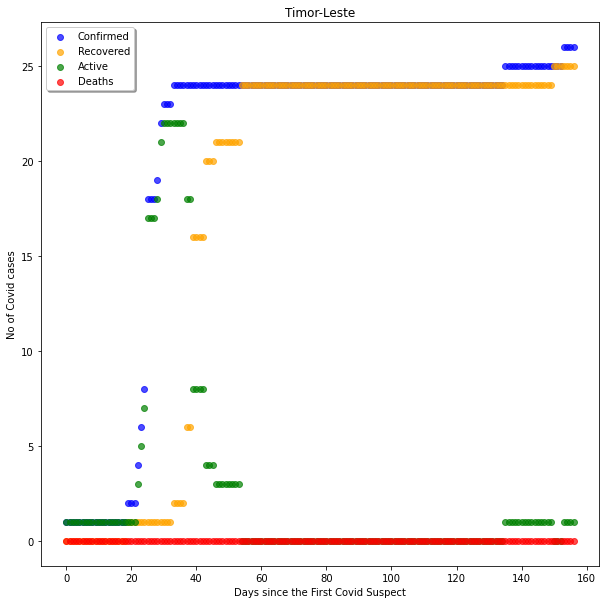

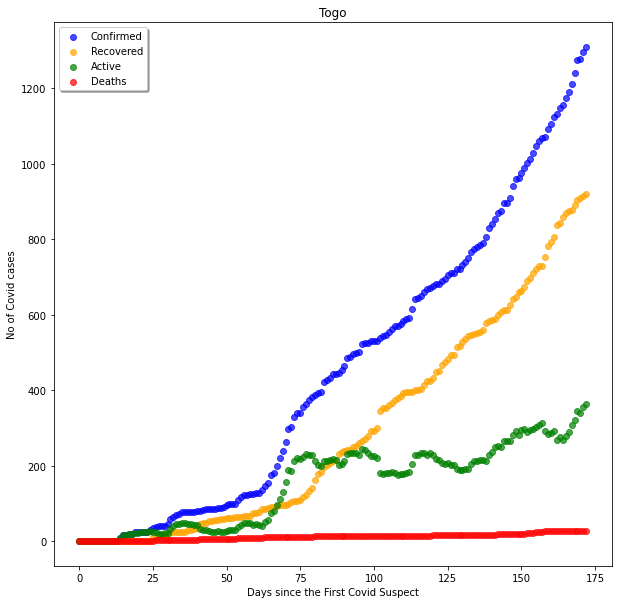

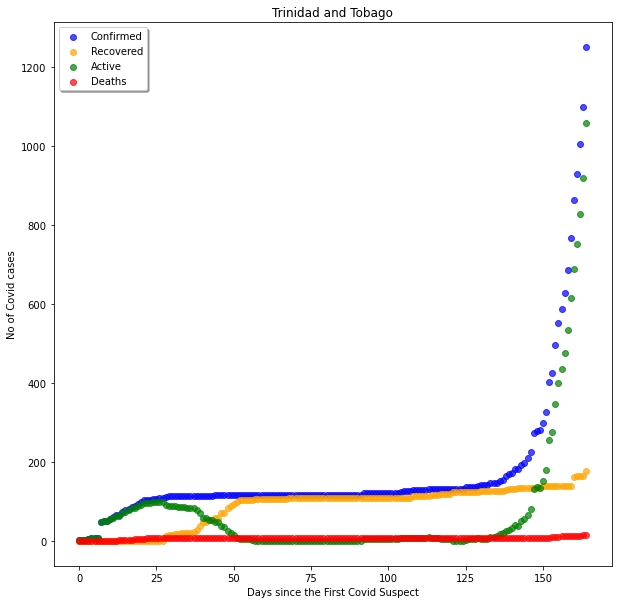

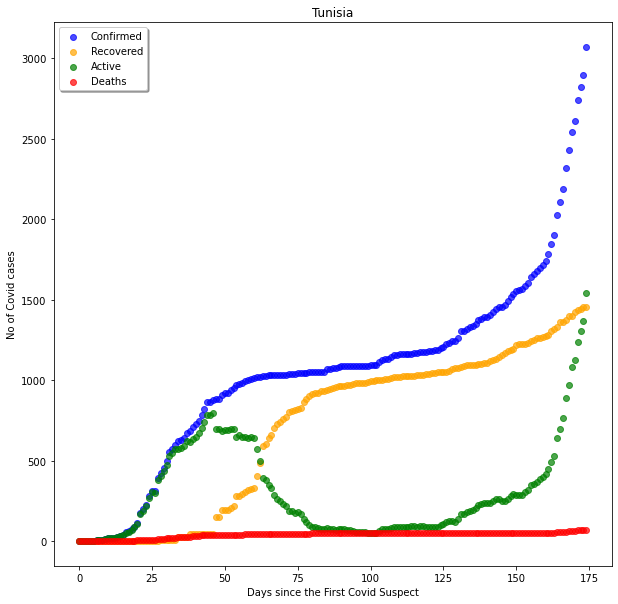

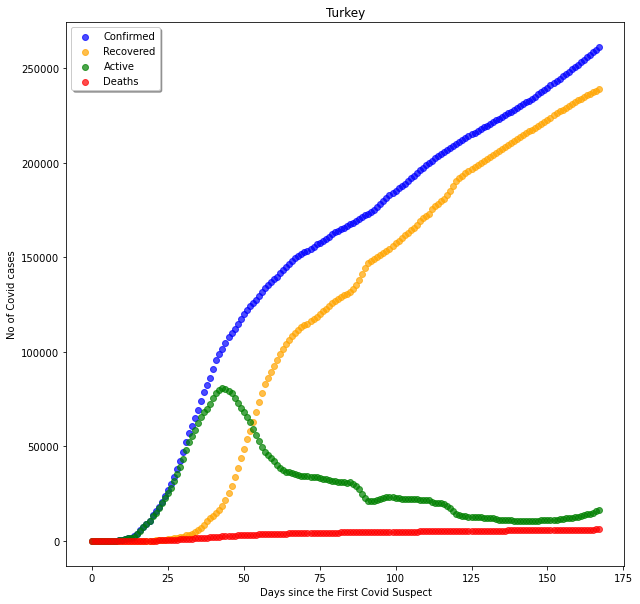

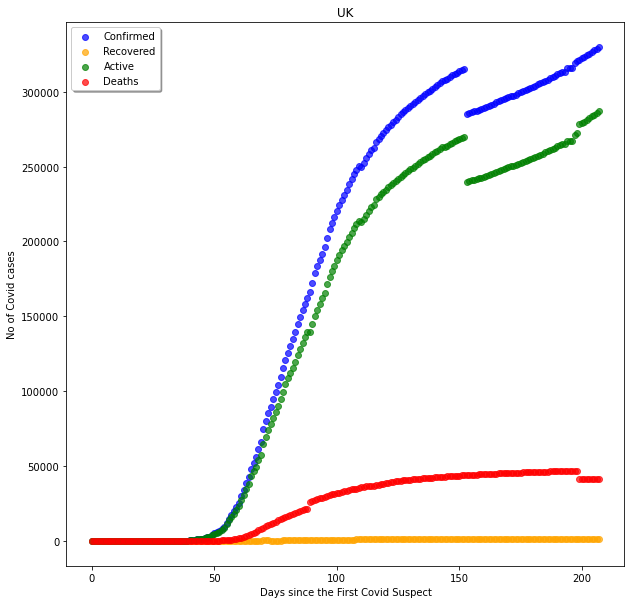

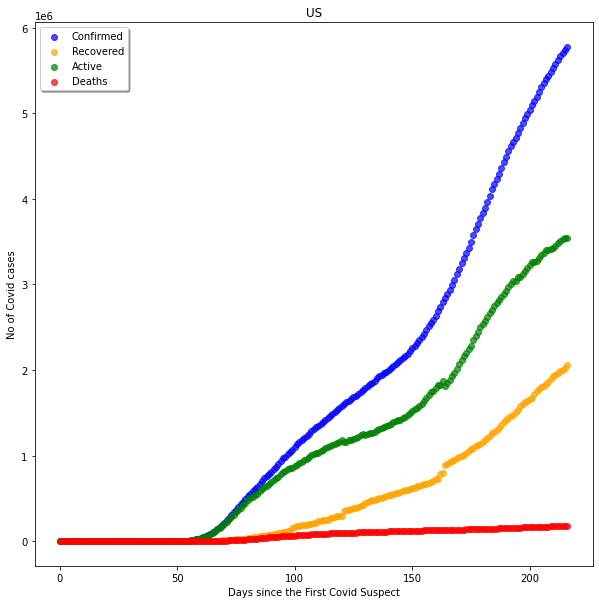

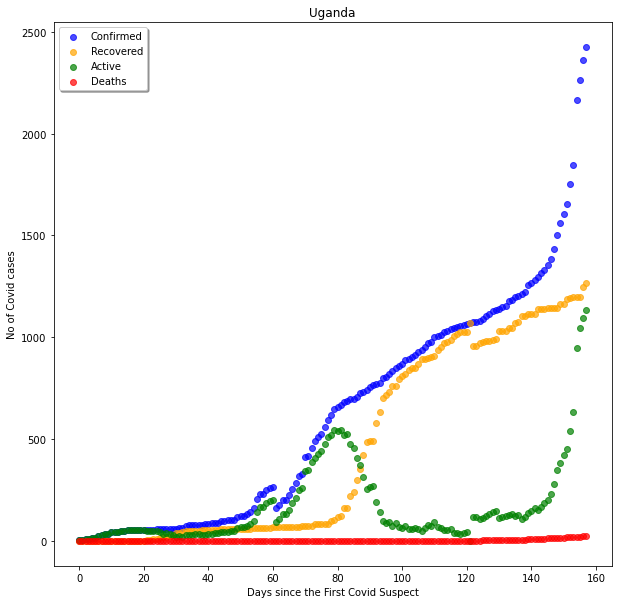

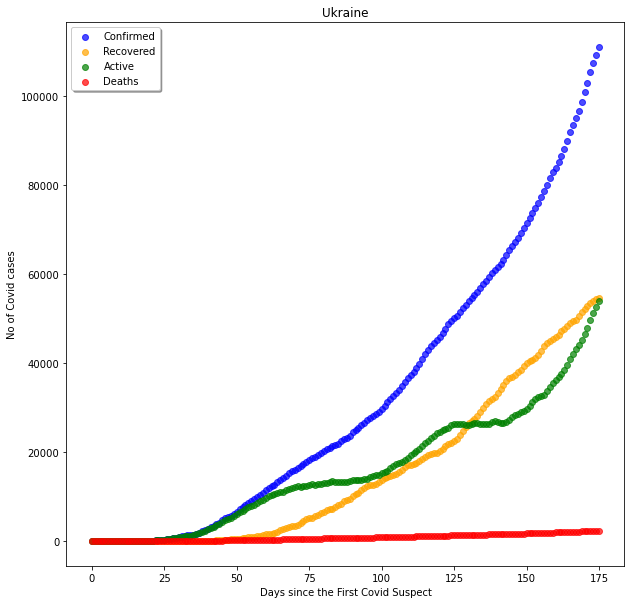

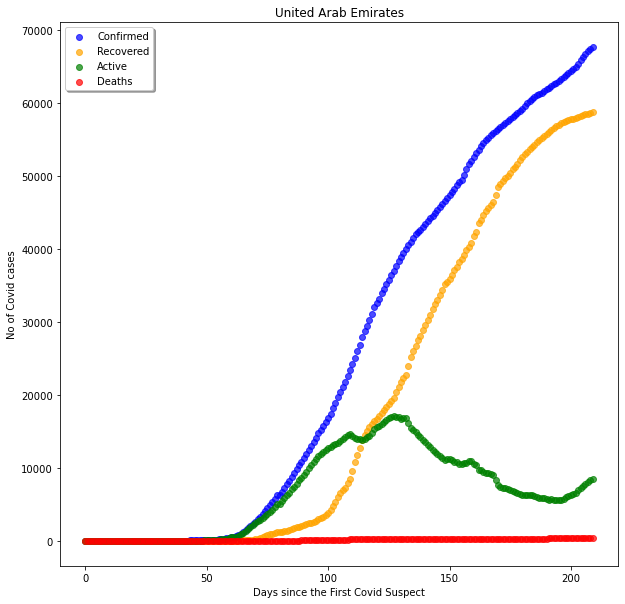

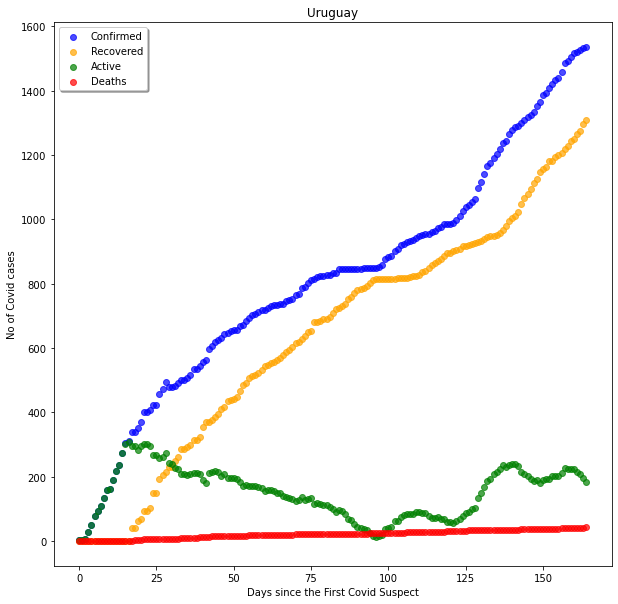

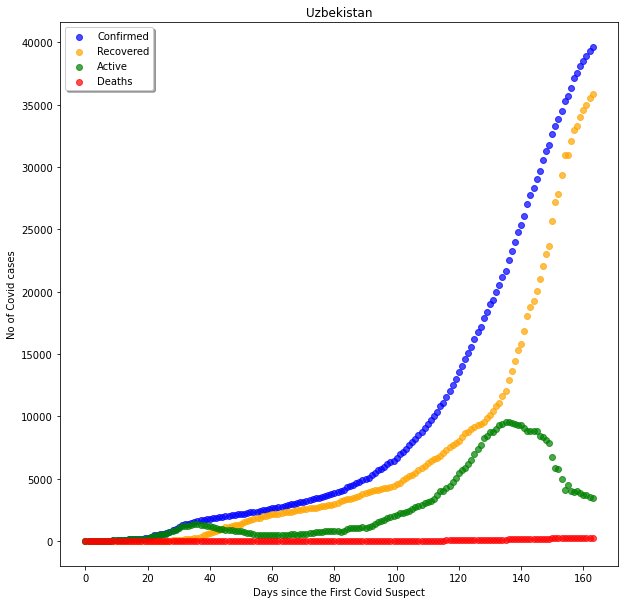

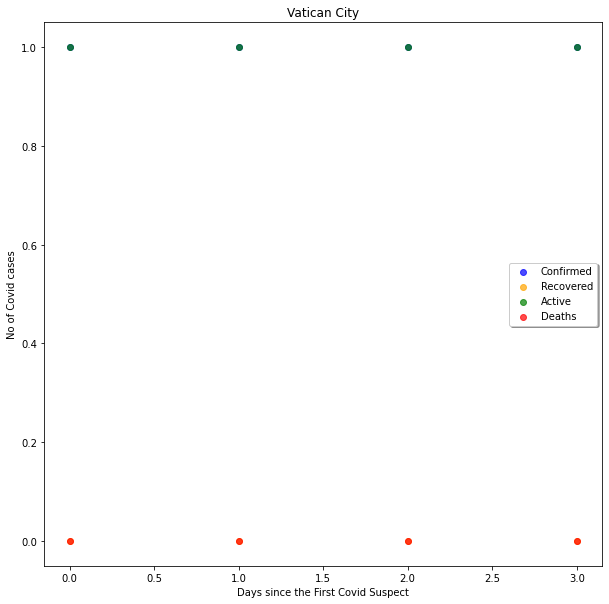

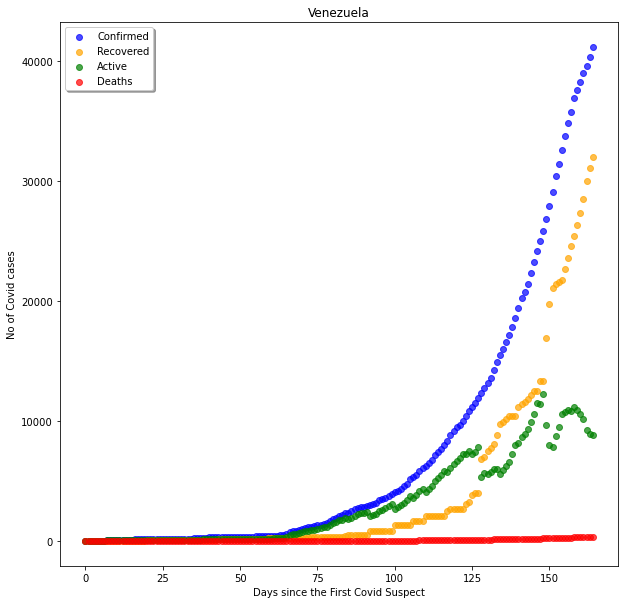

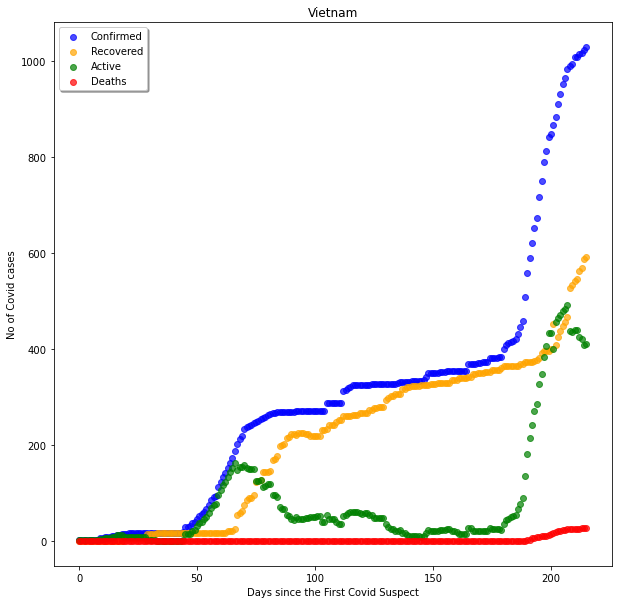

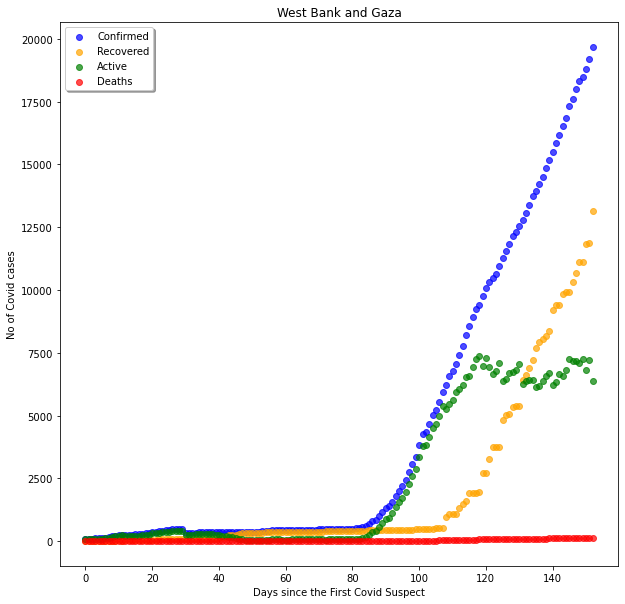

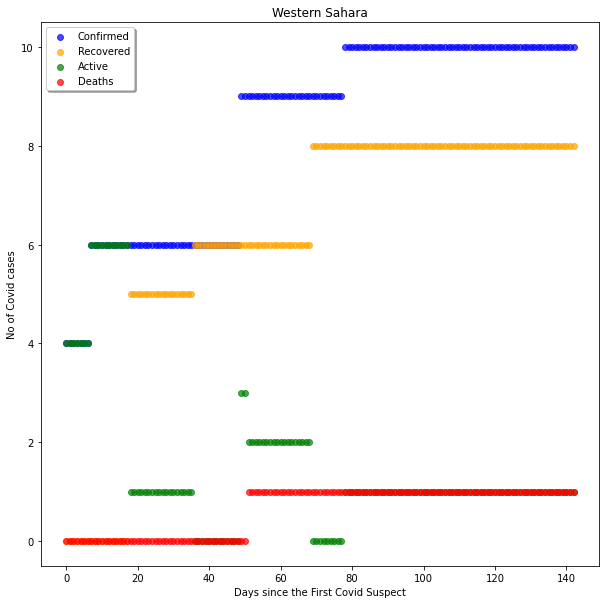

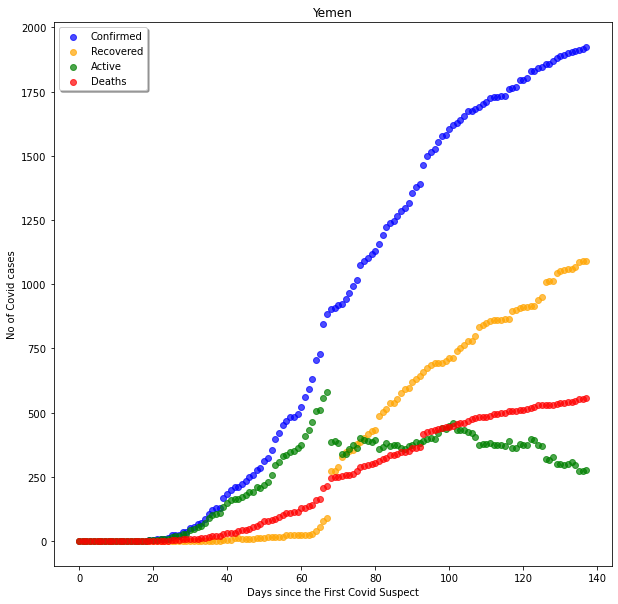

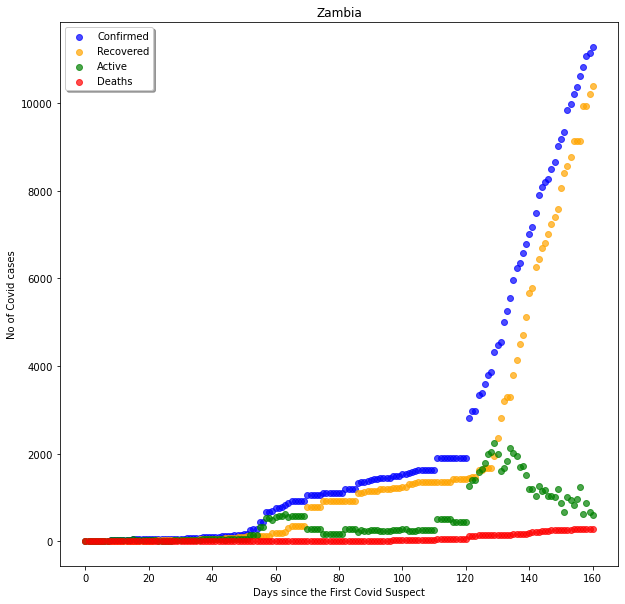

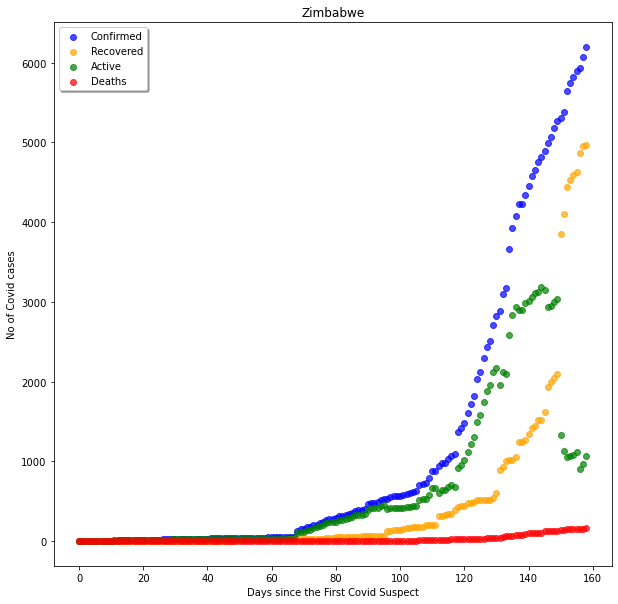

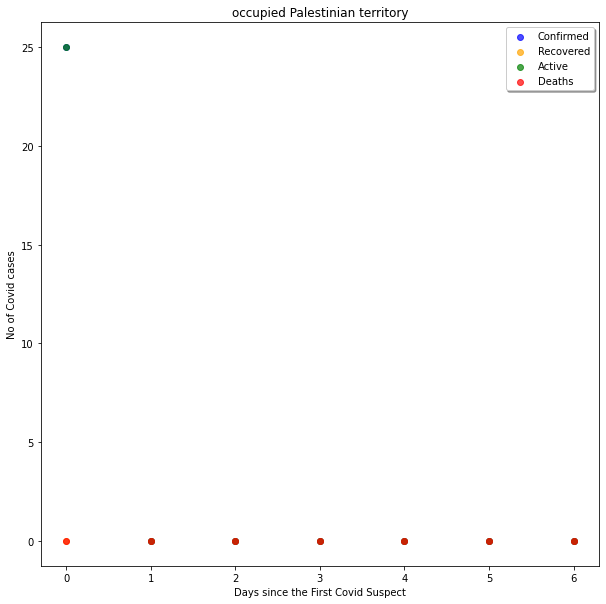

In [329]:
for idx in range(0,len(Countries)):
    plt.figure(figsize=(10,10))
    C2=df1[df1['Country']==Countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C2)),C2['Confirmed'],color='blue',label='Confirmed',alpha=0.7)
    plt.scatter(np.arange(0,len(C2)),C2['Recovered'],color='orange',label='Recovered',alpha=0.7)
    plt.scatter(np.arange(0,len(C2)),C2['Active'],color='green',label='Active',alpha=0.7)
    plt.scatter(np.arange(0,len(C2)),C2['Deaths'],color='red',label='Deaths',alpha=0.7)
    plt.xlabel('Days since the First Covid Suspect')
    plt.ylabel('No of Covid cases')
    plt.title(Countries[idx])
    plt.legend(shadow=True)
    plt.show()